##### Import our dependencies

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
# additional dependencies
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

##### import the input dataset

In [3]:
#  Import and read the charity_data.csv.

application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(["EIN"], axis =1)

##### Determine the number of unique values in each column

In [5]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [6]:
# review Status value counts
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [7]:
# review special considerations value count
application_df["SPECIAL_CONSIDERATIONS"].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [8]:
#drop the columns "STATUS" and "SPECIAL_CONSIDERATIONS"
application_df = application_df.drop(["SPECIAL_CONSIDERATIONS","STATUS"],1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


C:\Users\Helanga\AppData\Local\Temp/ipykernel_24928/2766828072.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(["SPECIAL_CONSIDERATIONS","STATUS"],1)


In [9]:
# Look at APPLICATION_TYPE value counts for binning
application_counts=application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

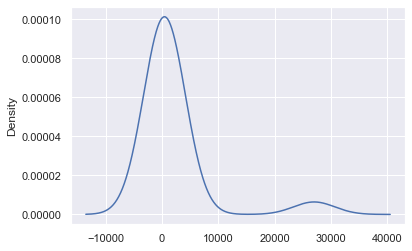

In [10]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ...? less than 500
replace_appliaction = list(application_counts[application_counts<500].index)

# Replace in dataframe
for app in replace_appliaction:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning
class_counts =application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [13]:
# Determine which values to replace if counts are less than 1000..?
replace_class = list(class_counts[class_counts<1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
application_df.nunique()

NAME                19568
APPLICATION_TYPE        9
AFFILIATION             6
CLASSIFICATION          6
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [15]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


#### bin Names

In [16]:
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

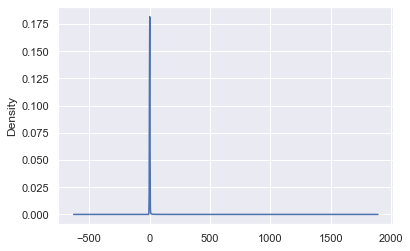

In [17]:
# Visualize the value counts of name
name_counts.plot.density()

In [18]:
#USe the bining technique to put those with 5 or less in a small bucket
# Determine which values to replace if counts are less than 5..?
replace_application = list(name_counts[name_counts<= 5 ].index)

# Replace in dataframe
for app in replace_application:
    application_df['NAME'] = application_df['NAME'].replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [19]:
application_df.dtypes

NAME                object
APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [20]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [21]:
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

##### Create a OneHotEncoder instance

In [22]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Helanga\AppData\Local\Temp/ipykernel_24928/3710565482.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(application_cat,1)


,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
application_df.shape

(34299, 396)

In [63]:
# Split our preprocessed data into our features and target arrays
# X is our feature matrix
X_df =application_df.drop(["IS_SUCCESSFUL"],1)

X = X_df.values

y = application_df["IS_SUCCESSFUL"].values


# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=78)

C:\Users\Helanga\AppData\Local\Temp/ipykernel_24928/3897733309.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df =application_df.drop(["IS_SUCCESSFUL"],1)


In [64]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
#testing
len(X_train[0])

395

In [66]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features*3
hidden_nodes_layer2 = number_input_features*2
hidden_nodes_layer3 = number_input_features*1
hidden_nodes_layer4 = 20

nn = tf.keras.models.Sequential()
# note from module 19.2.5 Rule of thumb:A good rule of thumb for a basic neural network
#is to have two to three times the amount of neurons in the hidden layer
# as the number of inputs

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features,activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="sigmoid"))

# forth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4,activation="sigmoid"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1185)              469260    
                                                                 
 dense_6 (Dense)             (None, 790)               936940    
                                                                 
 dense_7 (Dense)             (None, 395)               312445    
                                                                 
 dense_8 (Dense)             (None, 20)                7920      
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,726,586
Trainable params: 1,726,586
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#Define the checkpoints path and file names
os.makedirs("Checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

##### Implement checkpint

In [68]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
check_point_path ="checkpoints/weights.{epoch:02d}.hdf5"

In [69]:
# Compile the model
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [70]:
#Create a callback that save the model's weight every epoch(set 5)

cp_callback = ModelCheckpoint(
    filepath=check_point_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

##### Train the model

In [71]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 5:40 - loss: 0.7813 - accuracy: 0.5312
Epoch 1: saving model to checkpoints\weights.01.hdf5
  9/804 [..............................] - ETA: 14s - loss: 0.7014 - accuracy: 0.5382
Epoch 1: saving model to checkpoints\weights.01.hdf5
 11/804 [..............................] - ETA: 15s - loss: 0.6963 - accuracy: 0.5682
Epoch 1: saving model to checkpoints\weights.01.hdf5
 19/804 [..............................] - ETA: 14s - loss: 0.6746 - accuracy: 0.5905
Epoch 1: saving model to checkpoints\weights.01.hdf5
 22/804 [..............................] - ETA: 14s - loss: 0.6685 - accuracy: 0.6051
Epoch 1: saving model to checkpoints\weights.01.hdf5
 29/804 [>.............................] - ETA: 14s - loss: 0.6577 - accuracy: 0.6185
Epoch 1: saving model to checkpoints\weights.01.hdf5
 31/804 [>.............................] - ETA: 14s - loss: 0.6542 - accuracy: 0.6240
Epoch 1: saving model to checkpoints\weights.01.hdf5
 39/804 [>....

295/804 [==========>...................] - ETA: 9s - loss: 0.4939 - accuracy: 0.7645
Epoch 1: saving model to checkpoints\weights.01.hdf5
300/804 [==========>...................] - ETA: 9s - loss: 0.4923 - accuracy: 0.7659
Epoch 1: saving model to checkpoints\weights.01.hdf5
305/804 [==========>...................] - ETA: 9s - loss: 0.4917 - accuracy: 0.7662
Epoch 1: saving model to checkpoints\weights.01.hdf5
310/804 [==========>...................] - ETA: 9s - loss: 0.4917 - accuracy: 0.7667
Epoch 1: saving model to checkpoints\weights.01.hdf5
315/804 [==========>...................] - ETA: 8s - loss: 0.4904 - accuracy: 0.7680
Epoch 1: saving model to checkpoints\weights.01.hdf5
324/804 [===========>..................] - ETA: 8s - loss: 0.4893 - accuracy: 0.7681
Epoch 1: saving model to checkpoints\weights.01.hdf5
326/804 [===========>..................] - ETA: 8s - loss: 0.4889 - accuracy: 0.7681
Epoch 1: saving model to checkpoints\weights.01.hdf5
334/804 [===========>.............

 83/804 [==>...........................] - ETA: 12s - loss: 0.4387 - accuracy: 0.7933
Epoch 2: saving model to checkpoints\weights.02.hdf5
 86/804 [==>...........................] - ETA: 12s - loss: 0.4389 - accuracy: 0.7936
Epoch 2: saving model to checkpoints\weights.02.hdf5
 91/804 [==>...........................] - ETA: 12s - loss: 0.4402 - accuracy: 0.7922
Epoch 2: saving model to checkpoints\weights.02.hdf5
 96/804 [==>...........................] - ETA: 11s - loss: 0.4399 - accuracy: 0.7956
Epoch 2: saving model to checkpoints\weights.02.hdf5
101/804 [==>...........................] - ETA: 11s - loss: 0.4424 - accuracy: 0.7942
Epoch 2: saving model to checkpoints\weights.02.hdf5
106/804 [==>...........................] - ETA: 11s - loss: 0.4432 - accuracy: 0.7945
Epoch 2: saving model to checkpoints\weights.02.hdf5
111/804 [===>..........................] - ETA: 11s - loss: 0.4398 - accuracy: 0.7962
Epoch 2: saving model to checkpoints\weights.02.hdf5
116/804 [===>..............

671/804 [========================>.....] - ETA: 2s - loss: 0.4384 - accuracy: 0.7943
Epoch 2: saving model to checkpoints\weights.02.hdf5
676/804 [========================>.....] - ETA: 2s - loss: 0.4388 - accuracy: 0.7941
Epoch 2: saving model to checkpoints\weights.02.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.4384 - accuracy: 0.7944
Epoch 2: saving model to checkpoints\weights.02.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.4386 - accuracy: 0.7941
Epoch 2: saving model to checkpoints\weights.02.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.4383 - accuracy: 0.7942
Epoch 2: saving model to checkpoints\weights.02.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.4387 - accuracy: 0.7940
Epoch 2: saving model to checkpoints\weights.02.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.4382 - accuracy: 0.7943
Epoch 2: saving model to checkpoints\weights.02.hdf5
706/804 [=========================

452/804 [===============>..............] - ETA: 5s - loss: 0.4283 - accuracy: 0.7970
Epoch 3: saving model to checkpoints\weights.03.hdf5
457/804 [================>.............] - ETA: 5s - loss: 0.4280 - accuracy: 0.7974
Epoch 3: saving model to checkpoints\weights.03.hdf5
462/804 [================>.............] - ETA: 5s - loss: 0.4275 - accuracy: 0.7977
Epoch 3: saving model to checkpoints\weights.03.hdf5
467/804 [================>.............] - ETA: 5s - loss: 0.4272 - accuracy: 0.7980
Epoch 3: saving model to checkpoints\weights.03.hdf5
472/804 [================>.............] - ETA: 5s - loss: 0.4271 - accuracy: 0.7985
Epoch 3: saving model to checkpoints\weights.03.hdf5
477/804 [================>.............] - ETA: 4s - loss: 0.4269 - accuracy: 0.7986
Epoch 3: saving model to checkpoints\weights.03.hdf5
482/804 [================>.............] - ETA: 4s - loss: 0.4272 - accuracy: 0.7985
Epoch 3: saving model to checkpoints\weights.03.hdf5
487/804 [=================>.......

233/804 [=======>......................] - ETA: 9s - loss: 0.4382 - accuracy: 0.7910
Epoch 4: saving model to checkpoints\weights.04.hdf5
238/804 [=======>......................] - ETA: 9s - loss: 0.4363 - accuracy: 0.7919
Epoch 4: saving model to checkpoints\weights.04.hdf5
243/804 [========>.....................] - ETA: 9s - loss: 0.4350 - accuracy: 0.7923
Epoch 4: saving model to checkpoints\weights.04.hdf5
248/804 [========>.....................] - ETA: 9s - loss: 0.4351 - accuracy: 0.7917
Epoch 4: saving model to checkpoints\weights.04.hdf5
253/804 [========>.....................] - ETA: 8s - loss: 0.4350 - accuracy: 0.7913
Epoch 4: saving model to checkpoints\weights.04.hdf5
262/804 [========>.....................] - ETA: 8s - loss: 0.4336 - accuracy: 0.7933
Epoch 4: saving model to checkpoints\weights.04.hdf5
265/804 [========>.....................] - ETA: 8s - loss: 0.4340 - accuracy: 0.7929
Epoch 4: saving model to checkpoints\weights.04.hdf5
268/804 [=========>...............

 15/804 [..............................] - ETA: 17s - loss: 0.4277 - accuracy: 0.8021
Epoch 5: saving model to checkpoints\weights.05.hdf5
 23/804 [..............................] - ETA: 15s - loss: 0.4348 - accuracy: 0.7948
Epoch 5: saving model to checkpoints\weights.05.hdf5
 25/804 [..............................] - ETA: 16s - loss: 0.4324 - accuracy: 0.7962
Epoch 5: saving model to checkpoints\weights.05.hdf5
 33/804 [>.............................] - ETA: 14s - loss: 0.4429 - accuracy: 0.7898
Epoch 5: saving model to checkpoints\weights.05.hdf5
 35/804 [>.............................] - ETA: 15s - loss: 0.4407 - accuracy: 0.7902
Epoch 5: saving model to checkpoints\weights.05.hdf5
 43/804 [>.............................] - ETA: 14s - loss: 0.4373 - accuracy: 0.7922
Epoch 5: saving model to checkpoints\weights.05.hdf5
 45/804 [>.............................] - ETA: 14s - loss: 0.4338 - accuracy: 0.7931
Epoch 5: saving model to checkpoints\weights.05.hdf5
 49/804 [>.................

309/804 [==========>...................] - ETA: 9s - loss: 0.4291 - accuracy: 0.7948
Epoch 5: saving model to checkpoints\weights.05.hdf5
314/804 [==========>...................] - ETA: 9s - loss: 0.4301 - accuracy: 0.7942
Epoch 5: saving model to checkpoints\weights.05.hdf5
319/804 [==========>...................] - ETA: 8s - loss: 0.4299 - accuracy: 0.7948
Epoch 5: saving model to checkpoints\weights.05.hdf5
324/804 [===========>..................] - ETA: 8s - loss: 0.4303 - accuracy: 0.7943
Epoch 5: saving model to checkpoints\weights.05.hdf5
329/804 [===========>..................] - ETA: 8s - loss: 0.4299 - accuracy: 0.7950
Epoch 5: saving model to checkpoints\weights.05.hdf5
334/804 [===========>..................] - ETA: 8s - loss: 0.4311 - accuracy: 0.7943
Epoch 5: saving model to checkpoints\weights.05.hdf5
343/804 [===========>..................] - ETA: 8s - loss: 0.4309 - accuracy: 0.7945
Epoch 5: saving model to checkpoints\weights.05.hdf5
345/804 [===========>.............

 90/804 [==>...........................] - ETA: 12s - loss: 0.4213 - accuracy: 0.8021
Epoch 6: saving model to checkpoints\weights.06.hdf5
 95/804 [==>...........................] - ETA: 11s - loss: 0.4195 - accuracy: 0.8020
Epoch 6: saving model to checkpoints\weights.06.hdf5
100/804 [==>...........................] - ETA: 11s - loss: 0.4144 - accuracy: 0.8047
Epoch 6: saving model to checkpoints\weights.06.hdf5
105/804 [==>...........................] - ETA: 11s - loss: 0.4147 - accuracy: 0.8036
Epoch 6: saving model to checkpoints\weights.06.hdf5
110/804 [===>..........................] - ETA: 11s - loss: 0.4128 - accuracy: 0.8045
Epoch 6: saving model to checkpoints\weights.06.hdf5
115/804 [===>..........................] - ETA: 11s - loss: 0.4149 - accuracy: 0.8035
Epoch 6: saving model to checkpoints\weights.06.hdf5
120/804 [===>..........................] - ETA: 11s - loss: 0.4140 - accuracy: 0.8034
Epoch 6: saving model to checkpoints\weights.06.hdf5
125/804 [===>..............

682/804 [========================>.....] - ETA: 2s - loss: 0.4268 - accuracy: 0.7960
Epoch 6: saving model to checkpoints\weights.06.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.4266 - accuracy: 0.7961
Epoch 6: saving model to checkpoints\weights.06.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.4268 - accuracy: 0.7961
Epoch 6: saving model to checkpoints\weights.06.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.4269 - accuracy: 0.7959
Epoch 6: saving model to checkpoints\weights.06.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4264 - accuracy: 0.7963
Epoch 6: saving model to checkpoints\weights.06.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.4264 - accuracy: 0.7966
Epoch 6: saving model to checkpoints\weights.06.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4262 - accuracy: 0.7967
Epoch 6: saving model to checkpoints\weights.06.hdf5
715/804 [=========================

171/804 [=====>........................] - ETA: 9s - loss: 0.4223 - accuracy: 0.7968
Epoch 7: saving model to checkpoints\weights.07.hdf5
176/804 [=====>........................] - ETA: 9s - loss: 0.4234 - accuracy: 0.7960
Epoch 7: saving model to checkpoints\weights.07.hdf5
181/804 [=====>........................] - ETA: 9s - loss: 0.4225 - accuracy: 0.7964
Epoch 7: saving model to checkpoints\weights.07.hdf5
190/804 [======>.......................] - ETA: 9s - loss: 0.4210 - accuracy: 0.7972
Epoch 7: saving model to checkpoints\weights.07.hdf5
193/804 [======>.......................] - ETA: 9s - loss: 0.4218 - accuracy: 0.7970
Epoch 7: saving model to checkpoints\weights.07.hdf5
196/804 [======>.......................] - ETA: 9s - loss: 0.4235 - accuracy: 0.7962
Epoch 7: saving model to checkpoints\weights.07.hdf5
201/804 [======>.......................] - ETA: 9s - loss: 0.4250 - accuracy: 0.7959
Epoch 7: saving model to checkpoints\weights.07.hdf5
206/804 [======>..................

761/804 [===========================>..] - ETA: 0s - loss: 0.4237 - accuracy: 0.7976
Epoch 7: saving model to checkpoints\weights.07.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4235 - accuracy: 0.7979
Epoch 7: saving model to checkpoints\weights.07.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.4231 - accuracy: 0.7982
Epoch 7: saving model to checkpoints\weights.07.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.4229 - accuracy: 0.7984
Epoch 7: saving model to checkpoints\weights.07.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.4234 - accuracy: 0.7978
Epoch 7: saving model to checkpoints\weights.07.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4234 - accuracy: 0.7978
Epoch 7: saving model to checkpoints\weights.07.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4232 - accuracy: 0.7981
Epoch 7: saving model to checkpoints\weights.07.hdf5
796/804 [=========================

542/804 [===================>..........] - ETA: 5s - loss: 0.4210 - accuracy: 0.7988
Epoch 8: saving model to checkpoints\weights.08.hdf5
547/804 [===================>..........] - ETA: 4s - loss: 0.4214 - accuracy: 0.7988
Epoch 8: saving model to checkpoints\weights.08.hdf5
552/804 [===================>..........] - ETA: 4s - loss: 0.4213 - accuracy: 0.7990
Epoch 8: saving model to checkpoints\weights.08.hdf5
557/804 [===================>..........] - ETA: 4s - loss: 0.4211 - accuracy: 0.7993
Epoch 8: saving model to checkpoints\weights.08.hdf5
562/804 [===================>..........] - ETA: 4s - loss: 0.4215 - accuracy: 0.7990
Epoch 8: saving model to checkpoints\weights.08.hdf5
567/804 [====================>.........] - ETA: 4s - loss: 0.4216 - accuracy: 0.7988
Epoch 8: saving model to checkpoints\weights.08.hdf5
572/804 [====================>.........] - ETA: 4s - loss: 0.4213 - accuracy: 0.7987
Epoch 8: saving model to checkpoints\weights.08.hdf5
577/804 [====================>....

323/804 [===========>..................] - ETA: 8s - loss: 0.4201 - accuracy: 0.8030
Epoch 9: saving model to checkpoints\weights.09.hdf5
328/804 [===========>..................] - ETA: 8s - loss: 0.4206 - accuracy: 0.8026
Epoch 9: saving model to checkpoints\weights.09.hdf5
333/804 [===========>..................] - ETA: 8s - loss: 0.4207 - accuracy: 0.8027
Epoch 9: saving model to checkpoints\weights.09.hdf5
338/804 [===========>..................] - ETA: 8s - loss: 0.4199 - accuracy: 0.8035
Epoch 9: saving model to checkpoints\weights.09.hdf5
343/804 [===========>..................] - ETA: 8s - loss: 0.4185 - accuracy: 0.8048
Epoch 9: saving model to checkpoints\weights.09.hdf5
348/804 [===========>..................] - ETA: 7s - loss: 0.4195 - accuracy: 0.8038
Epoch 9: saving model to checkpoints\weights.09.hdf5
353/804 [============>.................] - ETA: 7s - loss: 0.4193 - accuracy: 0.8037
Epoch 9: saving model to checkpoints\weights.09.hdf5
358/804 [============>............

104/804 [==>...........................] - ETA: 11s - loss: 0.4277 - accuracy: 0.7960
Epoch 10: saving model to checkpoints\weights.10.hdf5
109/804 [===>..........................] - ETA: 11s - loss: 0.4256 - accuracy: 0.7973
Epoch 10: saving model to checkpoints\weights.10.hdf5
114/804 [===>..........................] - ETA: 11s - loss: 0.4295 - accuracy: 0.7955
Epoch 10: saving model to checkpoints\weights.10.hdf5
119/804 [===>..........................] - ETA: 11s - loss: 0.4307 - accuracy: 0.7946
Epoch 10: saving model to checkpoints\weights.10.hdf5
124/804 [===>..........................] - ETA: 11s - loss: 0.4321 - accuracy: 0.7944
Epoch 10: saving model to checkpoints\weights.10.hdf5
129/804 [===>..........................] - ETA: 11s - loss: 0.4321 - accuracy: 0.7946
Epoch 10: saving model to checkpoints\weights.10.hdf5
134/804 [====>.........................] - ETA: 10s - loss: 0.4316 - accuracy: 0.7950
Epoch 10: saving model to checkpoints\weights.10.hdf5
143/804 [====>......

403/804 [==============>...............] - ETA: 6s - loss: 0.4241 - accuracy: 0.7999
Epoch 10: saving model to checkpoints\weights.10.hdf5
406/804 [==============>...............] - ETA: 6s - loss: 0.4244 - accuracy: 0.7996
Epoch 10: saving model to checkpoints\weights.10.hdf5
409/804 [==============>...............] - ETA: 6s - loss: 0.4245 - accuracy: 0.7997
Epoch 10: saving model to checkpoints\weights.10.hdf5
418/804 [==============>...............] - ETA: 6s - loss: 0.4249 - accuracy: 0.7991
Epoch 10: saving model to checkpoints\weights.10.hdf5
420/804 [==============>...............] - ETA: 6s - loss: 0.4249 - accuracy: 0.7993
Epoch 10: saving model to checkpoints\weights.10.hdf5
424/804 [==============>...............] - ETA: 6s - loss: 0.4249 - accuracy: 0.7993
Epoch 10: saving model to checkpoints\weights.10.hdf5
429/804 [===============>..............] - ETA: 6s - loss: 0.4250 - accuracy: 0.7989
Epoch 10: saving model to checkpoints\weights.10.hdf5
434/804 [===============>..

694/804 [========================>.....] - ETA: 1s - loss: 0.4241 - accuracy: 0.7976
Epoch 10: saving model to checkpoints\weights.10.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.4236 - accuracy: 0.7979
Epoch 10: saving model to checkpoints\weights.10.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.4233 - accuracy: 0.7983
Epoch 10: saving model to checkpoints\weights.10.hdf5
713/804 [=========================>....] - ETA: 1s - loss: 0.4237 - accuracy: 0.7977
Epoch 10: saving model to checkpoints\weights.10.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.4237 - accuracy: 0.7976
Epoch 10: saving model to checkpoints\weights.10.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.4242 - accuracy: 0.7974
Epoch 10: saving model to checkpoints\weights.10.hdf5
728/804 [==========================>...] - ETA: 1s - loss: 0.4245 - accuracy: 0.7971
Epoch 10: saving model to checkpoints\weights.10.hdf5
731/804 [==================

184/804 [=====>........................] - ETA: 10s - loss: 0.4194 - accuracy: 0.7981
Epoch 11: saving model to checkpoints\weights.11.hdf5
187/804 [=====>........................] - ETA: 10s - loss: 0.4201 - accuracy: 0.7975
Epoch 11: saving model to checkpoints\weights.11.hdf5
194/804 [======>.......................] - ETA: 10s - loss: 0.4211 - accuracy: 0.7964
Epoch 11: saving model to checkpoints\weights.11.hdf5
196/804 [======>.......................] - ETA: 10s - loss: 0.4214 - accuracy: 0.7956
Epoch 11: saving model to checkpoints\weights.11.hdf5
200/804 [======>.......................] - ETA: 10s - loss: 0.4216 - accuracy: 0.7952
Epoch 11: saving model to checkpoints\weights.11.hdf5
205/804 [======>.......................] - ETA: 10s - loss: 0.4227 - accuracy: 0.7948
Epoch 11: saving model to checkpoints\weights.11.hdf5
210/804 [======>.......................] - ETA: 9s - loss: 0.4218 - accuracy: 0.7954 
Epoch 11: saving model to checkpoints\weights.11.hdf5
219/804 [=======>...

475/804 [================>.............] - ETA: 5s - loss: 0.4204 - accuracy: 0.7995
Epoch 11: saving model to checkpoints\weights.11.hdf5
484/804 [=================>............] - ETA: 5s - loss: 0.4201 - accuracy: 0.7996
Epoch 11: saving model to checkpoints\weights.11.hdf5
487/804 [=================>............] - ETA: 5s - loss: 0.4196 - accuracy: 0.7998
Epoch 11: saving model to checkpoints\weights.11.hdf5
490/804 [=================>............] - ETA: 5s - loss: 0.4196 - accuracy: 0.7997
Epoch 11: saving model to checkpoints\weights.11.hdf5
495/804 [=================>............] - ETA: 5s - loss: 0.4203 - accuracy: 0.7991
Epoch 11: saving model to checkpoints\weights.11.hdf5
500/804 [=================>............] - ETA: 5s - loss: 0.4209 - accuracy: 0.7987
Epoch 11: saving model to checkpoints\weights.11.hdf5
505/804 [=================>............] - ETA: 4s - loss: 0.4212 - accuracy: 0.7986
Epoch 11: saving model to checkpoints\weights.11.hdf5
510/804 [==================

772/804 [===========================>..] - ETA: 0s - loss: 0.4198 - accuracy: 0.8006
Epoch 11: saving model to checkpoints\weights.11.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.4199 - accuracy: 0.8006
Epoch 11: saving model to checkpoints\weights.11.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4197 - accuracy: 0.8007
Epoch 11: saving model to checkpoints\weights.11.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4203 - accuracy: 0.8003
Epoch 11: saving model to checkpoints\weights.11.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.4200 - accuracy: 0.8005
Epoch 11: saving model to checkpoints\weights.11.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4199 - accuracy: 0.8006
Epoch 11: saving model to checkpoints\weights.11.hdf5
804/804 [==============================] - 14s 18ms/step - loss: 0.4206 - accuracy: 0.8002
Epoch 12/100

Epoch 12: saving model to checkpoints\weights.12.hdf5
  5/804

555/804 [===================>..........] - ETA: 5s - loss: 0.4172 - accuracy: 0.8017
Epoch 12: saving model to checkpoints\weights.12.hdf5
560/804 [===================>..........] - ETA: 5s - loss: 0.4170 - accuracy: 0.8017
Epoch 12: saving model to checkpoints\weights.12.hdf5
562/804 [===================>..........] - ETA: 5s - loss: 0.4168 - accuracy: 0.8018
Epoch 12: saving model to checkpoints\weights.12.hdf5
570/804 [====================>.........] - ETA: 5s - loss: 0.4168 - accuracy: 0.8018
Epoch 12: saving model to checkpoints\weights.12.hdf5
572/804 [====================>.........] - ETA: 5s - loss: 0.4168 - accuracy: 0.8019
Epoch 12: saving model to checkpoints\weights.12.hdf5
580/804 [====================>.........] - ETA: 5s - loss: 0.4177 - accuracy: 0.8016
Epoch 12: saving model to checkpoints\weights.12.hdf5
582/804 [====================>.........] - ETA: 4s - loss: 0.4175 - accuracy: 0.8017
Epoch 12: saving model to checkpoints\weights.12.hdf5
590/804 [==================

328/804 [===========>..................] - ETA: 10s - loss: 0.4190 - accuracy: 0.7973
Epoch 13: saving model to checkpoints\weights.13.hdf5
336/804 [===========>..................] - ETA: 10s - loss: 0.4203 - accuracy: 0.7961
Epoch 13: saving model to checkpoints\weights.13.hdf5
338/804 [===========>..................] - ETA: 10s - loss: 0.4207 - accuracy: 0.7958
Epoch 13: saving model to checkpoints\weights.13.hdf5
346/804 [===========>..................] - ETA: 9s - loss: 0.4211 - accuracy: 0.7958 
Epoch 13: saving model to checkpoints\weights.13.hdf5
348/804 [===========>..................] - ETA: 9s - loss: 0.4211 - accuracy: 0.7958
Epoch 13: saving model to checkpoints\weights.13.hdf5
356/804 [============>.................] - ETA: 9s - loss: 0.4195 - accuracy: 0.7967
Epoch 13: saving model to checkpoints\weights.13.hdf5
358/804 [============>.................] - ETA: 9s - loss: 0.4195 - accuracy: 0.7966
Epoch 13: saving model to checkpoints\weights.13.hdf5
366/804 [============>.

625/804 [======================>.......] - ETA: 3s - loss: 0.4194 - accuracy: 0.7988
Epoch 13: saving model to checkpoints\weights.13.hdf5
631/804 [======================>.......] - ETA: 3s - loss: 0.4189 - accuracy: 0.7993
Epoch 13: saving model to checkpoints\weights.13.hdf5
636/804 [======================>.......] - ETA: 3s - loss: 0.4190 - accuracy: 0.7993
Epoch 13: saving model to checkpoints\weights.13.hdf5
640/804 [======================>.......] - ETA: 3s - loss: 0.4192 - accuracy: 0.7994
Epoch 13: saving model to checkpoints\weights.13.hdf5
646/804 [=======================>......] - ETA: 3s - loss: 0.4192 - accuracy: 0.7993
Epoch 13: saving model to checkpoints\weights.13.hdf5
651/804 [=======================>......] - ETA: 3s - loss: 0.4193 - accuracy: 0.7991
Epoch 13: saving model to checkpoints\weights.13.hdf5
653/804 [=======================>......] - ETA: 3s - loss: 0.4193 - accuracy: 0.7990
Epoch 13: saving model to checkpoints\weights.13.hdf5
661/804 [==================

407/804 [==============>...............] - ETA: 8s - loss: 0.4163 - accuracy: 0.8015
Epoch 14: saving model to checkpoints\weights.14.hdf5
412/804 [==============>...............] - ETA: 8s - loss: 0.4167 - accuracy: 0.8016
Epoch 14: saving model to checkpoints\weights.14.hdf5
417/804 [==============>...............] - ETA: 8s - loss: 0.4160 - accuracy: 0.8022
Epoch 14: saving model to checkpoints\weights.14.hdf5
422/804 [==============>...............] - ETA: 8s - loss: 0.4165 - accuracy: 0.8015
Epoch 14: saving model to checkpoints\weights.14.hdf5
427/804 [==============>...............] - ETA: 8s - loss: 0.4165 - accuracy: 0.8014
Epoch 14: saving model to checkpoints\weights.14.hdf5
429/804 [===============>..............] - ETA: 8s - loss: 0.4165 - accuracy: 0.8012
Epoch 14: saving model to checkpoints\weights.14.hdf5
437/804 [===============>..............] - ETA: 7s - loss: 0.4165 - accuracy: 0.8007
Epoch 14: saving model to checkpoints\weights.14.hdf5
439/804 [===============>..

699/804 [=========================>....] - ETA: 2s - loss: 0.4170 - accuracy: 0.8008
Epoch 14: saving model to checkpoints\weights.14.hdf5
707/804 [=========================>....] - ETA: 2s - loss: 0.4169 - accuracy: 0.8008
Epoch 14: saving model to checkpoints\weights.14.hdf5
709/804 [=========================>....] - ETA: 2s - loss: 0.4169 - accuracy: 0.8008
Epoch 14: saving model to checkpoints\weights.14.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.4168 - accuracy: 0.8006
Epoch 14: saving model to checkpoints\weights.14.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.4168 - accuracy: 0.8008
Epoch 14: saving model to checkpoints\weights.14.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 0.4162 - accuracy: 0.8012
Epoch 14: saving model to checkpoints\weights.14.hdf5
729/804 [==========================>...] - ETA: 1s - loss: 0.4162 - accuracy: 0.8012
Epoch 14: saving model to checkpoints\weights.14.hdf5
736/804 [==================

185/804 [=====>........................] - ETA: 13s - loss: 0.4053 - accuracy: 0.8098
Epoch 15: saving model to checkpoints\weights.15.hdf5
193/804 [======>.......................] - ETA: 13s - loss: 0.4070 - accuracy: 0.8078
Epoch 15: saving model to checkpoints\weights.15.hdf5
195/804 [======>.......................] - ETA: 13s - loss: 0.4073 - accuracy: 0.8075
Epoch 15: saving model to checkpoints\weights.15.hdf5
203/804 [======>.......................] - ETA: 12s - loss: 0.4115 - accuracy: 0.8042
Epoch 15: saving model to checkpoints\weights.15.hdf5
208/804 [======>.......................] - ETA: 12s - loss: 0.4123 - accuracy: 0.8036
Epoch 15: saving model to checkpoints\weights.15.hdf5
210/804 [======>.......................] - ETA: 12s - loss: 0.4124 - accuracy: 0.8040
Epoch 15: saving model to checkpoints\weights.15.hdf5
218/804 [=======>......................] - ETA: 12s - loss: 0.4123 - accuracy: 0.8049
Epoch 15: saving model to checkpoints\weights.15.hdf5
220/804 [=======>...

480/804 [================>.............] - ETA: 7s - loss: 0.4149 - accuracy: 0.8031
Epoch 15: saving model to checkpoints\weights.15.hdf5
488/804 [=================>............] - ETA: 6s - loss: 0.4158 - accuracy: 0.8026
Epoch 15: saving model to checkpoints\weights.15.hdf5
490/804 [=================>............] - ETA: 6s - loss: 0.4154 - accuracy: 0.8029
Epoch 15: saving model to checkpoints\weights.15.hdf5
498/804 [=================>............] - ETA: 6s - loss: 0.4145 - accuracy: 0.8037
Epoch 15: saving model to checkpoints\weights.15.hdf5
500/804 [=================>............] - ETA: 6s - loss: 0.4146 - accuracy: 0.8037
Epoch 15: saving model to checkpoints\weights.15.hdf5
508/804 [=================>............] - ETA: 6s - loss: 0.4150 - accuracy: 0.8036
Epoch 15: saving model to checkpoints\weights.15.hdf5
510/804 [==================>...........] - ETA: 6s - loss: 0.4149 - accuracy: 0.8037
Epoch 15: saving model to checkpoints\weights.15.hdf5
518/804 [==================

778/804 [============================>.] - ETA: 0s - loss: 0.4173 - accuracy: 0.8014
Epoch 15: saving model to checkpoints\weights.15.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4172 - accuracy: 0.8016
Epoch 15: saving model to checkpoints\weights.15.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.4175 - accuracy: 0.8013
Epoch 15: saving model to checkpoints\weights.15.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.4183 - accuracy: 0.8011
Epoch 15: saving model to checkpoints\weights.15.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4181 - accuracy: 0.8012
Epoch 15: saving model to checkpoints\weights.15.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.4180 - accuracy: 0.8014
Epoch 15: saving model to checkpoints\weights.15.hdf5
804/804 [==============================] - 18s 22ms/step - loss: 0.4180 - accuracy: 0.8013
Epoch 16/100
  1/804 [..............................] - ETA: 22s - loss: 0.

264/804 [========>.....................] - ETA: 11s - loss: 0.4132 - accuracy: 0.8034
Epoch 16: saving model to checkpoints\weights.16.hdf5
266/804 [========>.....................] - ETA: 11s - loss: 0.4134 - accuracy: 0.8035
Epoch 16: saving model to checkpoints\weights.16.hdf5
274/804 [=========>....................] - ETA: 11s - loss: 0.4136 - accuracy: 0.8036
Epoch 16: saving model to checkpoints\weights.16.hdf5
276/804 [=========>....................] - ETA: 11s - loss: 0.4136 - accuracy: 0.8038
Epoch 16: saving model to checkpoints\weights.16.hdf5
284/804 [=========>....................] - ETA: 11s - loss: 0.4146 - accuracy: 0.8027
Epoch 16: saving model to checkpoints\weights.16.hdf5
286/804 [=========>....................] - ETA: 11s - loss: 0.4156 - accuracy: 0.8022
Epoch 16: saving model to checkpoints\weights.16.hdf5
294/804 [=========>....................] - ETA: 11s - loss: 0.4162 - accuracy: 0.8023
Epoch 16: saving model to checkpoints\weights.16.hdf5
296/804 [==========>

555/804 [===================>..........] - ETA: 5s - loss: 0.4154 - accuracy: 0.8028
Epoch 16: saving model to checkpoints\weights.16.hdf5
560/804 [===================>..........] - ETA: 5s - loss: 0.4154 - accuracy: 0.8027
Epoch 16: saving model to checkpoints\weights.16.hdf5
565/804 [====================>.........] - ETA: 5s - loss: 0.4150 - accuracy: 0.8028
Epoch 16: saving model to checkpoints\weights.16.hdf5
570/804 [====================>.........] - ETA: 5s - loss: 0.4151 - accuracy: 0.8025
Epoch 16: saving model to checkpoints\weights.16.hdf5
575/804 [====================>.........] - ETA: 5s - loss: 0.4153 - accuracy: 0.8023
Epoch 16: saving model to checkpoints\weights.16.hdf5
582/804 [====================>.........] - ETA: 4s - loss: 0.4152 - accuracy: 0.8023
Epoch 16: saving model to checkpoints\weights.16.hdf5
589/804 [====================>.........] - ETA: 4s - loss: 0.4155 - accuracy: 0.8023
Epoch 16: saving model to checkpoints\weights.16.hdf5
591/804 [==================

 50/804 [>.............................] - ETA: 15s - loss: 0.4211 - accuracy: 0.8019
Epoch 17: saving model to checkpoints\weights.17.hdf5
 54/804 [=>............................] - ETA: 16s - loss: 0.4180 - accuracy: 0.8032
Epoch 17: saving model to checkpoints\weights.17.hdf5
 60/804 [=>............................] - ETA: 16s - loss: 0.4225 - accuracy: 0.7990
Epoch 17: saving model to checkpoints\weights.17.hdf5
 65/804 [=>............................] - ETA: 16s - loss: 0.4204 - accuracy: 0.7995
Epoch 17: saving model to checkpoints\weights.17.hdf5
 67/804 [=>............................] - ETA: 16s - loss: 0.4220 - accuracy: 0.7980
Epoch 17: saving model to checkpoints\weights.17.hdf5
 75/804 [=>............................] - ETA: 15s - loss: 0.4206 - accuracy: 0.7975
Epoch 17: saving model to checkpoints\weights.17.hdf5
 77/804 [=>............................] - ETA: 16s - loss: 0.4230 - accuracy: 0.7955
Epoch 17: saving model to checkpoints\weights.17.hdf5
 85/804 [==>........

635/804 [======================>.......] - ETA: 3s - loss: 0.4186 - accuracy: 0.8024
Epoch 17: saving model to checkpoints\weights.17.hdf5
637/804 [======================>.......] - ETA: 3s - loss: 0.4183 - accuracy: 0.8025
Epoch 17: saving model to checkpoints\weights.17.hdf5
645/804 [=======================>......] - ETA: 3s - loss: 0.4179 - accuracy: 0.8029
Epoch 17: saving model to checkpoints\weights.17.hdf5
647/804 [=======================>......] - ETA: 3s - loss: 0.4178 - accuracy: 0.8028
Epoch 17: saving model to checkpoints\weights.17.hdf5
654/804 [=======================>......] - ETA: 3s - loss: 0.4170 - accuracy: 0.8032
Epoch 17: saving model to checkpoints\weights.17.hdf5
660/804 [=======================>......] - ETA: 3s - loss: 0.4169 - accuracy: 0.8030
Epoch 17: saving model to checkpoints\weights.17.hdf5
665/804 [=======================>......] - ETA: 2s - loss: 0.4167 - accuracy: 0.8033
Epoch 17: saving model to checkpoints\weights.17.hdf5
670/804 [==================

408/804 [==============>...............] - ETA: 8s - loss: 0.4135 - accuracy: 0.8028
Epoch 18: saving model to checkpoints\weights.18.hdf5
416/804 [==============>...............] - ETA: 8s - loss: 0.4138 - accuracy: 0.8026
Epoch 18: saving model to checkpoints\weights.18.hdf5
418/804 [==============>...............] - ETA: 8s - loss: 0.4141 - accuracy: 0.8023
Epoch 18: saving model to checkpoints\weights.18.hdf5
422/804 [==============>...............] - ETA: 8s - loss: 0.4146 - accuracy: 0.8017
Epoch 18: saving model to checkpoints\weights.18.hdf5
427/804 [==============>...............] - ETA: 8s - loss: 0.4144 - accuracy: 0.8018
Epoch 18: saving model to checkpoints\weights.18.hdf5
432/804 [===============>..............] - ETA: 8s - loss: 0.4138 - accuracy: 0.8021
Epoch 18: saving model to checkpoints\weights.18.hdf5
437/804 [===============>..............] - ETA: 7s - loss: 0.4132 - accuracy: 0.8021
Epoch 18: saving model to checkpoints\weights.18.hdf5
442/804 [===============>..

702/804 [=========================>....] - ETA: 2s - loss: 0.4153 - accuracy: 0.8023
Epoch 18: saving model to checkpoints\weights.18.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.4151 - accuracy: 0.8024
Epoch 18: saving model to checkpoints\weights.18.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 0.4149 - accuracy: 0.8025
Epoch 18: saving model to checkpoints\weights.18.hdf5
721/804 [=========================>....] - ETA: 1s - loss: 0.4152 - accuracy: 0.8024
Epoch 18: saving model to checkpoints\weights.18.hdf5
724/804 [==========================>...] - ETA: 1s - loss: 0.4151 - accuracy: 0.8024
Epoch 18: saving model to checkpoints\weights.18.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 0.4152 - accuracy: 0.8022
Epoch 18: saving model to checkpoints\weights.18.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.4154 - accuracy: 0.8020
Epoch 18: saving model to checkpoints\weights.18.hdf5
737/804 [==================

188/804 [======>.......................] - ETA: 10s - loss: 0.4184 - accuracy: 0.8047
Epoch 19: saving model to checkpoints\weights.19.hdf5
193/804 [======>.......................] - ETA: 10s - loss: 0.4170 - accuracy: 0.8060
Epoch 19: saving model to checkpoints\weights.19.hdf5
198/804 [======>.......................] - ETA: 10s - loss: 0.4171 - accuracy: 0.8059
Epoch 19: saving model to checkpoints\weights.19.hdf5
203/804 [======>.......................] - ETA: 10s - loss: 0.4169 - accuracy: 0.8057
Epoch 19: saving model to checkpoints\weights.19.hdf5
208/804 [======>.......................] - ETA: 9s - loss: 0.4154 - accuracy: 0.8068 
Epoch 19: saving model to checkpoints\weights.19.hdf5
217/804 [=======>......................] - ETA: 9s - loss: 0.4137 - accuracy: 0.8076
Epoch 19: saving model to checkpoints\weights.19.hdf5
219/804 [=======>......................] - ETA: 9s - loss: 0.4134 - accuracy: 0.8079
Epoch 19: saving model to checkpoints\weights.19.hdf5
223/804 [=======>.....

485/804 [=================>............] - ETA: 5s - loss: 0.4177 - accuracy: 0.8026
Epoch 19: saving model to checkpoints\weights.19.hdf5
488/804 [=================>............] - ETA: 5s - loss: 0.4175 - accuracy: 0.8027
Epoch 19: saving model to checkpoints\weights.19.hdf5
497/804 [=================>............] - ETA: 5s - loss: 0.4171 - accuracy: 0.8029
Epoch 19: saving model to checkpoints\weights.19.hdf5
499/804 [=================>............] - ETA: 5s - loss: 0.4167 - accuracy: 0.8032
Epoch 19: saving model to checkpoints\weights.19.hdf5
506/804 [=================>............] - ETA: 5s - loss: 0.4174 - accuracy: 0.8030
Epoch 19: saving model to checkpoints\weights.19.hdf5
512/804 [==================>...........] - ETA: 5s - loss: 0.4170 - accuracy: 0.8033
Epoch 19: saving model to checkpoints\weights.19.hdf5
514/804 [==================>...........] - ETA: 5s - loss: 0.4172 - accuracy: 0.8033
Epoch 19: saving model to checkpoints\weights.19.hdf5
522/804 [==================

778/804 [============================>.] - ETA: 0s - loss: 0.4155 - accuracy: 0.8031
Epoch 19: saving model to checkpoints\weights.19.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.4156 - accuracy: 0.8031
Epoch 19: saving model to checkpoints\weights.19.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4156 - accuracy: 0.8030
Epoch 19: saving model to checkpoints\weights.19.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.4156 - accuracy: 0.8031
Epoch 19: saving model to checkpoints\weights.19.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.4155 - accuracy: 0.8030
Epoch 19: saving model to checkpoints\weights.19.hdf5
804/804 [==============================] - 15s 18ms/step - loss: 0.4153 - accuracy: 0.8031
Epoch 20/100
  1/804 [..............................] - ETA: 9s - loss: 0.4596 - accuracy: 0.8125
Epoch 20: saving model to checkpoints\weights.20.hdf5
  4/804 [..............................] - ETA: 16s - loss: 0.

267/804 [========>.....................] - ETA: 10s - loss: 0.4180 - accuracy: 0.8050
Epoch 20: saving model to checkpoints\weights.20.hdf5
272/804 [=========>....................] - ETA: 10s - loss: 0.4179 - accuracy: 0.8049
Epoch 20: saving model to checkpoints\weights.20.hdf5
277/804 [=========>....................] - ETA: 10s - loss: 0.4195 - accuracy: 0.8037
Epoch 20: saving model to checkpoints\weights.20.hdf5
283/804 [=========>....................] - ETA: 10s - loss: 0.4190 - accuracy: 0.8045
Epoch 20: saving model to checkpoints\weights.20.hdf5
287/804 [=========>....................] - ETA: 10s - loss: 0.4195 - accuracy: 0.8040
Epoch 20: saving model to checkpoints\weights.20.hdf5
293/804 [=========>....................] - ETA: 10s - loss: 0.4190 - accuracy: 0.8043
Epoch 20: saving model to checkpoints\weights.20.hdf5
297/804 [==========>...................] - ETA: 10s - loss: 0.4188 - accuracy: 0.8043
Epoch 20: saving model to checkpoints\weights.20.hdf5
302/804 [==========>

563/804 [====================>.........] - ETA: 5s - loss: 0.4186 - accuracy: 0.8034
Epoch 20: saving model to checkpoints\weights.20.hdf5
568/804 [====================>.........] - ETA: 5s - loss: 0.4183 - accuracy: 0.8037
Epoch 20: saving model to checkpoints\weights.20.hdf5
573/804 [====================>.........] - ETA: 5s - loss: 0.4187 - accuracy: 0.8033
Epoch 20: saving model to checkpoints\weights.20.hdf5
578/804 [====================>.........] - ETA: 4s - loss: 0.4187 - accuracy: 0.8034
Epoch 20: saving model to checkpoints\weights.20.hdf5
583/804 [====================>.........] - ETA: 4s - loss: 0.4183 - accuracy: 0.8036
Epoch 20: saving model to checkpoints\weights.20.hdf5
585/804 [====================>.........] - ETA: 4s - loss: 0.4187 - accuracy: 0.8036
Epoch 20: saving model to checkpoints\weights.20.hdf5
592/804 [=====================>........] - ETA: 4s - loss: 0.4187 - accuracy: 0.8036
Epoch 20: saving model to checkpoints\weights.20.hdf5
598/804 [==================

339/804 [===========>..................] - ETA: 9s - loss: 0.4187 - accuracy: 0.8022
Epoch 21: saving model to checkpoints\weights.21.hdf5
341/804 [===========>..................] - ETA: 9s - loss: 0.4185 - accuracy: 0.8023
Epoch 21: saving model to checkpoints\weights.21.hdf5
348/804 [===========>..................] - ETA: 9s - loss: 0.4192 - accuracy: 0.8020
Epoch 21: saving model to checkpoints\weights.21.hdf5
353/804 [============>.................] - ETA: 9s - loss: 0.4191 - accuracy: 0.8024
Epoch 21: saving model to checkpoints\weights.21.hdf5
359/804 [============>.................] - ETA: 9s - loss: 0.4185 - accuracy: 0.8026
Epoch 21: saving model to checkpoints\weights.21.hdf5
364/804 [============>.................] - ETA: 9s - loss: 0.4177 - accuracy: 0.8031
Epoch 21: saving model to checkpoints\weights.21.hdf5
366/804 [============>.................] - ETA: 9s - loss: 0.4179 - accuracy: 0.8029
Epoch 21: saving model to checkpoints\weights.21.hdf5
374/804 [============>.....

631/804 [======================>.......] - ETA: 3s - loss: 0.4123 - accuracy: 0.8059
Epoch 21: saving model to checkpoints\weights.21.hdf5
638/804 [======================>.......] - ETA: 3s - loss: 0.4122 - accuracy: 0.8058
Epoch 21: saving model to checkpoints\weights.21.hdf5
644/804 [=======================>......] - ETA: 3s - loss: 0.4125 - accuracy: 0.8055
Epoch 21: saving model to checkpoints\weights.21.hdf5
649/804 [=======================>......] - ETA: 3s - loss: 0.4129 - accuracy: 0.8050
Epoch 21: saving model to checkpoints\weights.21.hdf5
651/804 [=======================>......] - ETA: 3s - loss: 0.4127 - accuracy: 0.8051
Epoch 21: saving model to checkpoints\weights.21.hdf5
659/804 [=======================>......] - ETA: 3s - loss: 0.4132 - accuracy: 0.8046
Epoch 21: saving model to checkpoints\weights.21.hdf5
661/804 [=======================>......] - ETA: 3s - loss: 0.4134 - accuracy: 0.8044
Epoch 21: saving model to checkpoints\weights.21.hdf5
669/804 [==================

123/804 [===>..........................] - ETA: 14s - loss: 0.3959 - accuracy: 0.8130
Epoch 22: saving model to checkpoints\weights.22.hdf5
130/804 [===>..........................] - ETA: 14s - loss: 0.3974 - accuracy: 0.8111
Epoch 22: saving model to checkpoints\weights.22.hdf5
132/804 [===>..........................] - ETA: 14s - loss: 0.3974 - accuracy: 0.8106
Epoch 22: saving model to checkpoints\weights.22.hdf5
140/804 [====>.........................] - ETA: 14s - loss: 0.3969 - accuracy: 0.8121
Epoch 22: saving model to checkpoints\weights.22.hdf5
142/804 [====>.........................] - ETA: 14s - loss: 0.3968 - accuracy: 0.8118
Epoch 22: saving model to checkpoints\weights.22.hdf5
150/804 [====>.........................] - ETA: 13s - loss: 0.3968 - accuracy: 0.8123
Epoch 22: saving model to checkpoints\weights.22.hdf5
152/804 [====>.........................] - ETA: 13s - loss: 0.3980 - accuracy: 0.8119
Epoch 22: saving model to checkpoints\weights.22.hdf5
160/804 [====>......

419/804 [==============>...............] - ETA: 8s - loss: 0.4125 - accuracy: 0.8043
Epoch 22: saving model to checkpoints\weights.22.hdf5
424/804 [==============>...............] - ETA: 8s - loss: 0.4128 - accuracy: 0.8040
Epoch 22: saving model to checkpoints\weights.22.hdf5
429/804 [===============>..............] - ETA: 8s - loss: 0.4122 - accuracy: 0.8045
Epoch 22: saving model to checkpoints\weights.22.hdf5
435/804 [===============>..............] - ETA: 8s - loss: 0.4122 - accuracy: 0.8044
Epoch 22: saving model to checkpoints\weights.22.hdf5
439/804 [===============>..............] - ETA: 8s - loss: 0.4125 - accuracy: 0.8042
Epoch 22: saving model to checkpoints\weights.22.hdf5
445/804 [===============>..............] - ETA: 8s - loss: 0.4129 - accuracy: 0.8041
Epoch 22: saving model to checkpoints\weights.22.hdf5
449/804 [===============>..............] - ETA: 7s - loss: 0.4125 - accuracy: 0.8044
Epoch 22: saving model to checkpoints\weights.22.hdf5
454/804 [===============>..

714/804 [=========================>....] - ETA: 2s - loss: 0.4138 - accuracy: 0.8038
Epoch 22: saving model to checkpoints\weights.22.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.4138 - accuracy: 0.8037
Epoch 22: saving model to checkpoints\weights.22.hdf5
724/804 [==========================>...] - ETA: 1s - loss: 0.4139 - accuracy: 0.8037
Epoch 22: saving model to checkpoints\weights.22.hdf5
729/804 [==========================>...] - ETA: 1s - loss: 0.4143 - accuracy: 0.8035
Epoch 22: saving model to checkpoints\weights.22.hdf5
734/804 [==========================>...] - ETA: 1s - loss: 0.4143 - accuracy: 0.8037
Epoch 22: saving model to checkpoints\weights.22.hdf5
740/804 [==========================>...] - ETA: 1s - loss: 0.4143 - accuracy: 0.8038
Epoch 22: saving model to checkpoints\weights.22.hdf5
742/804 [==========================>...] - ETA: 1s - loss: 0.4144 - accuracy: 0.8037
Epoch 22: saving model to checkpoints\weights.22.hdf5
750/804 [==================

201/804 [======>.......................] - ETA: 13s - loss: 0.4143 - accuracy: 0.8043
Epoch 23: saving model to checkpoints\weights.23.hdf5
203/804 [======>.......................] - ETA: 13s - loss: 0.4163 - accuracy: 0.8026
Epoch 23: saving model to checkpoints\weights.23.hdf5
210/804 [======>.......................] - ETA: 13s - loss: 0.4162 - accuracy: 0.8031
Epoch 23: saving model to checkpoints\weights.23.hdf5
215/804 [=======>......................] - ETA: 13s - loss: 0.4173 - accuracy: 0.8025
Epoch 23: saving model to checkpoints\weights.23.hdf5
220/804 [=======>......................] - ETA: 12s - loss: 0.4163 - accuracy: 0.8031
Epoch 23: saving model to checkpoints\weights.23.hdf5
225/804 [=======>......................] - ETA: 12s - loss: 0.4157 - accuracy: 0.8035
Epoch 23: saving model to checkpoints\weights.23.hdf5
231/804 [=======>......................] - ETA: 12s - loss: 0.4155 - accuracy: 0.8026
Epoch 23: saving model to checkpoints\weights.23.hdf5
236/804 [=======>...

495/804 [=================>............] - ETA: 7s - loss: 0.4140 - accuracy: 0.8017
Epoch 23: saving model to checkpoints\weights.23.hdf5
501/804 [=================>............] - ETA: 6s - loss: 0.4139 - accuracy: 0.8021
Epoch 23: saving model to checkpoints\weights.23.hdf5
506/804 [=================>............] - ETA: 6s - loss: 0.4138 - accuracy: 0.8021
Epoch 23: saving model to checkpoints\weights.23.hdf5
511/804 [==================>...........] - ETA: 6s - loss: 0.4143 - accuracy: 0.8019
Epoch 23: saving model to checkpoints\weights.23.hdf5
513/804 [==================>...........] - ETA: 6s - loss: 0.4149 - accuracy: 0.8017
Epoch 23: saving model to checkpoints\weights.23.hdf5
521/804 [==================>...........] - ETA: 6s - loss: 0.4144 - accuracy: 0.8022
Epoch 23: saving model to checkpoints\weights.23.hdf5
523/804 [==================>...........] - ETA: 6s - loss: 0.4141 - accuracy: 0.8025
Epoch 23: saving model to checkpoints\weights.23.hdf5
531/804 [==================

791/804 [============================>.] - ETA: 0s - loss: 0.4135 - accuracy: 0.8037
Epoch 23: saving model to checkpoints\weights.23.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.4138 - accuracy: 0.8034
Epoch 23: saving model to checkpoints\weights.23.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.4137 - accuracy: 0.8036
Epoch 23: saving model to checkpoints\weights.23.hdf5
804/804 [==============================] - 18s 23ms/step - loss: 0.4137 - accuracy: 0.8038
Epoch 24/100
  1/804 [..............................] - ETA: 11s - loss: 0.3083 - accuracy: 0.8750
Epoch 24: saving model to checkpoints\weights.24.hdf5
  7/804 [..............................] - ETA: 16s - loss: 0.4127 - accuracy: 0.8259
Epoch 24: saving model to checkpoints\weights.24.hdf5
  9/804 [..............................] - ETA: 18s - loss: 0.4168 - accuracy: 0.8160
Epoch 24: saving model to checkpoints\weights.24.hdf5
 17/804 [..............................] - ETA: 17s - loss:

277/804 [=========>....................] - ETA: 12s - loss: 0.4157 - accuracy: 0.8023
Epoch 24: saving model to checkpoints\weights.24.hdf5
282/804 [=========>....................] - ETA: 12s - loss: 0.4151 - accuracy: 0.8025
Epoch 24: saving model to checkpoints\weights.24.hdf5
284/804 [=========>....................] - ETA: 12s - loss: 0.4152 - accuracy: 0.8024
Epoch 24: saving model to checkpoints\weights.24.hdf5
291/804 [=========>....................] - ETA: 12s - loss: 0.4163 - accuracy: 0.8022
Epoch 24: saving model to checkpoints\weights.24.hdf5
297/804 [==========>...................] - ETA: 12s - loss: 0.4151 - accuracy: 0.8030
Epoch 24: saving model to checkpoints\weights.24.hdf5
299/804 [==========>...................] - ETA: 12s - loss: 0.4157 - accuracy: 0.8026
Epoch 24: saving model to checkpoints\weights.24.hdf5
307/804 [==========>...................] - ETA: 11s - loss: 0.4157 - accuracy: 0.8024
Epoch 24: saving model to checkpoints\weights.24.hdf5
312/804 [==========>

572/804 [====================>.........] - ETA: 5s - loss: 0.4101 - accuracy: 0.8037
Epoch 24: saving model to checkpoints\weights.24.hdf5
574/804 [====================>.........] - ETA: 5s - loss: 0.4100 - accuracy: 0.8037
Epoch 24: saving model to checkpoints\weights.24.hdf5
582/804 [====================>.........] - ETA: 4s - loss: 0.4102 - accuracy: 0.8035
Epoch 24: saving model to checkpoints\weights.24.hdf5
585/804 [====================>.........] - ETA: 4s - loss: 0.4098 - accuracy: 0.8038
Epoch 24: saving model to checkpoints\weights.24.hdf5
592/804 [=====================>........] - ETA: 4s - loss: 0.4096 - accuracy: 0.8038
Epoch 24: saving model to checkpoints\weights.24.hdf5
594/804 [=====================>........] - ETA: 4s - loss: 0.4093 - accuracy: 0.8039
Epoch 24: saving model to checkpoints\weights.24.hdf5
602/804 [=====================>........] - ETA: 4s - loss: 0.4095 - accuracy: 0.8038
Epoch 24: saving model to checkpoints\weights.24.hdf5
604/804 [==================

349/804 [============>.................] - ETA: 8s - loss: 0.4136 - accuracy: 0.8027
Epoch 25: saving model to checkpoints\weights.25.hdf5
354/804 [============>.................] - ETA: 7s - loss: 0.4132 - accuracy: 0.8030
Epoch 25: saving model to checkpoints\weights.25.hdf5
359/804 [============>.................] - ETA: 7s - loss: 0.4137 - accuracy: 0.8023
Epoch 25: saving model to checkpoints\weights.25.hdf5
364/804 [============>.................] - ETA: 7s - loss: 0.4141 - accuracy: 0.8019
Epoch 25: saving model to checkpoints\weights.25.hdf5
369/804 [============>.................] - ETA: 7s - loss: 0.4139 - accuracy: 0.8021
Epoch 25: saving model to checkpoints\weights.25.hdf5
374/804 [============>.................] - ETA: 7s - loss: 0.4136 - accuracy: 0.8022
Epoch 25: saving model to checkpoints\weights.25.hdf5
379/804 [=============>................] - ETA: 7s - loss: 0.4135 - accuracy: 0.8021
Epoch 25: saving model to checkpoints\weights.25.hdf5
384/804 [=============>....

644/804 [=======================>......] - ETA: 2s - loss: 0.4127 - accuracy: 0.8043
Epoch 25: saving model to checkpoints\weights.25.hdf5
653/804 [=======================>......] - ETA: 2s - loss: 0.4126 - accuracy: 0.8044
Epoch 25: saving model to checkpoints\weights.25.hdf5
656/804 [=======================>......] - ETA: 2s - loss: 0.4127 - accuracy: 0.8043
Epoch 25: saving model to checkpoints\weights.25.hdf5
659/804 [=======================>......] - ETA: 2s - loss: 0.4126 - accuracy: 0.8044
Epoch 25: saving model to checkpoints\weights.25.hdf5
664/804 [=======================>......] - ETA: 2s - loss: 0.4125 - accuracy: 0.8046
Epoch 25: saving model to checkpoints\weights.25.hdf5
669/804 [=======================>......] - ETA: 2s - loss: 0.4127 - accuracy: 0.8046
Epoch 25: saving model to checkpoints\weights.25.hdf5
674/804 [========================>.....] - ETA: 2s - loss: 0.4126 - accuracy: 0.8044
Epoch 25: saving model to checkpoints\weights.25.hdf5
679/804 [==================

425/804 [==============>...............] - ETA: 6s - loss: 0.4115 - accuracy: 0.8048
Epoch 26: saving model to checkpoints\weights.26.hdf5
434/804 [===============>..............] - ETA: 5s - loss: 0.4113 - accuracy: 0.8054
Epoch 26: saving model to checkpoints\weights.26.hdf5
437/804 [===============>..............] - ETA: 5s - loss: 0.4120 - accuracy: 0.8050
Epoch 26: saving model to checkpoints\weights.26.hdf5
440/804 [===============>..............] - ETA: 5s - loss: 0.4120 - accuracy: 0.8051
Epoch 26: saving model to checkpoints\weights.26.hdf5
445/804 [===============>..............] - ETA: 5s - loss: 0.4120 - accuracy: 0.8052
Epoch 26: saving model to checkpoints\weights.26.hdf5
450/804 [===============>..............] - ETA: 5s - loss: 0.4128 - accuracy: 0.8045
Epoch 26: saving model to checkpoints\weights.26.hdf5
455/804 [===============>..............] - ETA: 5s - loss: 0.4121 - accuracy: 0.8052
Epoch 26: saving model to checkpoints\weights.26.hdf5
460/804 [================>.

720/804 [=========================>....] - ETA: 1s - loss: 0.4131 - accuracy: 0.8041
Epoch 26: saving model to checkpoints\weights.26.hdf5
725/804 [==========================>...] - ETA: 1s - loss: 0.4128 - accuracy: 0.8043
Epoch 26: saving model to checkpoints\weights.26.hdf5
730/804 [==========================>...] - ETA: 1s - loss: 0.4129 - accuracy: 0.8042
Epoch 26: saving model to checkpoints\weights.26.hdf5
735/804 [==========================>...] - ETA: 1s - loss: 0.4129 - accuracy: 0.8040
Epoch 26: saving model to checkpoints\weights.26.hdf5
740/804 [==========================>...] - ETA: 1s - loss: 0.4126 - accuracy: 0.8042
Epoch 26: saving model to checkpoints\weights.26.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.4129 - accuracy: 0.8039
Epoch 26: saving model to checkpoints\weights.26.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.4130 - accuracy: 0.8038
Epoch 26: saving model to checkpoints\weights.26.hdf5
755/804 [==================

501/804 [=================>............] - ETA: 4s - loss: 0.4148 - accuracy: 0.8025
Epoch 27: saving model to checkpoints\weights.27.hdf5
506/804 [=================>............] - ETA: 4s - loss: 0.4144 - accuracy: 0.8027
Epoch 27: saving model to checkpoints\weights.27.hdf5
515/804 [==================>...........] - ETA: 4s - loss: 0.4142 - accuracy: 0.8030
Epoch 27: saving model to checkpoints\weights.27.hdf5
517/804 [==================>...........] - ETA: 4s - loss: 0.4143 - accuracy: 0.8028
Epoch 27: saving model to checkpoints\weights.27.hdf5
521/804 [==================>...........] - ETA: 4s - loss: 0.4144 - accuracy: 0.8028
Epoch 27: saving model to checkpoints\weights.27.hdf5
526/804 [==================>...........] - ETA: 4s - loss: 0.4138 - accuracy: 0.8033
Epoch 27: saving model to checkpoints\weights.27.hdf5
531/804 [==================>...........] - ETA: 4s - loss: 0.4135 - accuracy: 0.8034
Epoch 27: saving model to checkpoints\weights.27.hdf5
536/804 [==================

796/804 [============================>.] - ETA: 0s - loss: 0.4121 - accuracy: 0.8043
Epoch 27: saving model to checkpoints\weights.27.hdf5
804/804 [==============================] - 13s 16ms/step - loss: 0.4115 - accuracy: 0.8048
Epoch 28/100
  1/804 [..............................] - ETA: 8s - loss: 0.5670 - accuracy: 0.6562
Epoch 28: saving model to checkpoints\weights.28.hdf5
  4/804 [..............................] - ETA: 15s - loss: 0.5181 - accuracy: 0.7031
Epoch 28: saving model to checkpoints\weights.28.hdf5
  7/804 [..............................] - ETA: 15s - loss: 0.4496 - accuracy: 0.7545
Epoch 28: saving model to checkpoints\weights.28.hdf5
 12/804 [..............................] - ETA: 13s - loss: 0.4397 - accuracy: 0.7656
Epoch 28: saving model to checkpoints\weights.28.hdf5
 17/804 [..............................] - ETA: 13s - loss: 0.4498 - accuracy: 0.7629
Epoch 28: saving model to checkpoints\weights.28.hdf5
 22/804 [..............................] - ETA: 12s - loss

282/804 [=========>....................] - ETA: 8s - loss: 0.4130 - accuracy: 0.8029
Epoch 28: saving model to checkpoints\weights.28.hdf5
287/804 [=========>....................] - ETA: 8s - loss: 0.4132 - accuracy: 0.8031
Epoch 28: saving model to checkpoints\weights.28.hdf5
292/804 [=========>....................] - ETA: 8s - loss: 0.4122 - accuracy: 0.8039
Epoch 28: saving model to checkpoints\weights.28.hdf5
301/804 [==========>...................] - ETA: 7s - loss: 0.4129 - accuracy: 0.8031
Epoch 28: saving model to checkpoints\weights.28.hdf5
304/804 [==========>...................] - ETA: 7s - loss: 0.4119 - accuracy: 0.8037
Epoch 28: saving model to checkpoints\weights.28.hdf5
307/804 [==========>...................] - ETA: 7s - loss: 0.4127 - accuracy: 0.8030
Epoch 28: saving model to checkpoints\weights.28.hdf5
312/804 [==========>...................] - ETA: 7s - loss: 0.4124 - accuracy: 0.8037
Epoch 28: saving model to checkpoints\weights.28.hdf5
317/804 [==========>.......

577/804 [====================>.........] - ETA: 3s - loss: 0.4112 - accuracy: 0.8031
Epoch 28: saving model to checkpoints\weights.28.hdf5
582/804 [====================>.........] - ETA: 3s - loss: 0.4114 - accuracy: 0.8030
Epoch 28: saving model to checkpoints\weights.28.hdf5
587/804 [====================>.........] - ETA: 3s - loss: 0.4108 - accuracy: 0.8034
Epoch 28: saving model to checkpoints\weights.28.hdf5
592/804 [=====================>........] - ETA: 3s - loss: 0.4106 - accuracy: 0.8035
Epoch 28: saving model to checkpoints\weights.28.hdf5
597/804 [=====================>........] - ETA: 3s - loss: 0.4100 - accuracy: 0.8040
Epoch 28: saving model to checkpoints\weights.28.hdf5
602/804 [=====================>........] - ETA: 3s - loss: 0.4103 - accuracy: 0.8039
Epoch 28: saving model to checkpoints\weights.28.hdf5
607/804 [=====================>........] - ETA: 3s - loss: 0.4107 - accuracy: 0.8039
Epoch 28: saving model to checkpoints\weights.28.hdf5
612/804 [==================

358/804 [============>.................] - ETA: 6s - loss: 0.4121 - accuracy: 0.8042
Epoch 29: saving model to checkpoints\weights.29.hdf5
363/804 [============>.................] - ETA: 6s - loss: 0.4119 - accuracy: 0.8043
Epoch 29: saving model to checkpoints\weights.29.hdf5
368/804 [============>.................] - ETA: 6s - loss: 0.4123 - accuracy: 0.8044
Epoch 29: saving model to checkpoints\weights.29.hdf5
373/804 [============>.................] - ETA: 6s - loss: 0.4122 - accuracy: 0.8043
Epoch 29: saving model to checkpoints\weights.29.hdf5
378/804 [=============>................] - ETA: 6s - loss: 0.4128 - accuracy: 0.8045
Epoch 29: saving model to checkpoints\weights.29.hdf5
383/804 [=============>................] - ETA: 6s - loss: 0.4136 - accuracy: 0.8039
Epoch 29: saving model to checkpoints\weights.29.hdf5
388/804 [=============>................] - ETA: 6s - loss: 0.4137 - accuracy: 0.8043
Epoch 29: saving model to checkpoints\weights.29.hdf5
393/804 [=============>....

653/804 [=======================>......] - ETA: 2s - loss: 0.4135 - accuracy: 0.8038
Epoch 29: saving model to checkpoints\weights.29.hdf5
658/804 [=======================>......] - ETA: 2s - loss: 0.4141 - accuracy: 0.8035
Epoch 29: saving model to checkpoints\weights.29.hdf5
663/804 [=======================>......] - ETA: 2s - loss: 0.4143 - accuracy: 0.8035
Epoch 29: saving model to checkpoints\weights.29.hdf5
668/804 [=======================>......] - ETA: 2s - loss: 0.4141 - accuracy: 0.8038
Epoch 29: saving model to checkpoints\weights.29.hdf5
673/804 [========================>.....] - ETA: 2s - loss: 0.4139 - accuracy: 0.8039
Epoch 29: saving model to checkpoints\weights.29.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.4144 - accuracy: 0.8035
Epoch 29: saving model to checkpoints\weights.29.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.4145 - accuracy: 0.8034
Epoch 29: saving model to checkpoints\weights.29.hdf5
688/804 [==================

139/804 [====>.........................] - ETA: 10s - loss: 0.4154 - accuracy: 0.7988
Epoch 30: saving model to checkpoints\weights.30.hdf5
144/804 [====>.........................] - ETA: 10s - loss: 0.4191 - accuracy: 0.7971
Epoch 30: saving model to checkpoints\weights.30.hdf5
149/804 [====>.........................] - ETA: 10s - loss: 0.4193 - accuracy: 0.7966
Epoch 30: saving model to checkpoints\weights.30.hdf5
154/804 [====>.........................] - ETA: 10s - loss: 0.4196 - accuracy: 0.7963
Epoch 30: saving model to checkpoints\weights.30.hdf5
159/804 [====>.........................] - ETA: 10s - loss: 0.4186 - accuracy: 0.7970
Epoch 30: saving model to checkpoints\weights.30.hdf5
164/804 [=====>........................] - ETA: 9s - loss: 0.4183 - accuracy: 0.7982 
Epoch 30: saving model to checkpoints\weights.30.hdf5
169/804 [=====>........................] - ETA: 9s - loss: 0.4186 - accuracy: 0.7981
Epoch 30: saving model to checkpoints\weights.30.hdf5
174/804 [=====>......

434/804 [===============>..............] - ETA: 5s - loss: 0.4126 - accuracy: 0.8047
Epoch 30: saving model to checkpoints\weights.30.hdf5
439/804 [===============>..............] - ETA: 5s - loss: 0.4125 - accuracy: 0.8044
Epoch 30: saving model to checkpoints\weights.30.hdf5
444/804 [===============>..............] - ETA: 5s - loss: 0.4128 - accuracy: 0.8044
Epoch 30: saving model to checkpoints\weights.30.hdf5
449/804 [===============>..............] - ETA: 5s - loss: 0.4126 - accuracy: 0.8045
Epoch 30: saving model to checkpoints\weights.30.hdf5
454/804 [===============>..............] - ETA: 5s - loss: 0.4126 - accuracy: 0.8042
Epoch 30: saving model to checkpoints\weights.30.hdf5
459/804 [================>.............] - ETA: 5s - loss: 0.4130 - accuracy: 0.8039
Epoch 30: saving model to checkpoints\weights.30.hdf5
464/804 [================>.............] - ETA: 5s - loss: 0.4137 - accuracy: 0.8032
Epoch 30: saving model to checkpoints\weights.30.hdf5
469/804 [================>.

729/804 [==========================>...] - ETA: 1s - loss: 0.4122 - accuracy: 0.8055
Epoch 30: saving model to checkpoints\weights.30.hdf5
734/804 [==========================>...] - ETA: 1s - loss: 0.4124 - accuracy: 0.8053
Epoch 30: saving model to checkpoints\weights.30.hdf5
739/804 [==========================>...] - ETA: 1s - loss: 0.4125 - accuracy: 0.8053
Epoch 30: saving model to checkpoints\weights.30.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.4123 - accuracy: 0.8053
Epoch 30: saving model to checkpoints\weights.30.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.4122 - accuracy: 0.8052
Epoch 30: saving model to checkpoints\weights.30.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.4126 - accuracy: 0.8050
Epoch 30: saving model to checkpoints\weights.30.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.4122 - accuracy: 0.8052
Epoch 30: saving model to checkpoints\weights.30.hdf5
764/804 [==================

215/804 [=======>......................] - ETA: 9s - loss: 0.3987 - accuracy: 0.8151
Epoch 31: saving model to checkpoints\weights.31.hdf5
220/804 [=======>......................] - ETA: 9s - loss: 0.3987 - accuracy: 0.8146
Epoch 31: saving model to checkpoints\weights.31.hdf5
225/804 [=======>......................] - ETA: 9s - loss: 0.3974 - accuracy: 0.8150
Epoch 31: saving model to checkpoints\weights.31.hdf5
230/804 [=======>......................] - ETA: 8s - loss: 0.3982 - accuracy: 0.8147
Epoch 31: saving model to checkpoints\weights.31.hdf5
235/804 [=======>......................] - ETA: 8s - loss: 0.3998 - accuracy: 0.8142
Epoch 31: saving model to checkpoints\weights.31.hdf5
240/804 [=======>......................] - ETA: 8s - loss: 0.3989 - accuracy: 0.8147
Epoch 31: saving model to checkpoints\weights.31.hdf5
245/804 [========>.....................] - ETA: 8s - loss: 0.3984 - accuracy: 0.8154
Epoch 31: saving model to checkpoints\weights.31.hdf5
250/804 [========>.........

512/804 [==================>...........] - ETA: 4s - loss: 0.4063 - accuracy: 0.8093
Epoch 31: saving model to checkpoints\weights.31.hdf5
515/804 [==================>...........] - ETA: 4s - loss: 0.4065 - accuracy: 0.8092
Epoch 31: saving model to checkpoints\weights.31.hdf5
520/804 [==================>...........] - ETA: 4s - loss: 0.4062 - accuracy: 0.8093
Epoch 31: saving model to checkpoints\weights.31.hdf5
529/804 [==================>...........] - ETA: 4s - loss: 0.4055 - accuracy: 0.8098
Epoch 31: saving model to checkpoints\weights.31.hdf5
532/804 [==================>...........] - ETA: 4s - loss: 0.4054 - accuracy: 0.8100
Epoch 31: saving model to checkpoints\weights.31.hdf5
535/804 [==================>...........] - ETA: 4s - loss: 0.4054 - accuracy: 0.8101
Epoch 31: saving model to checkpoints\weights.31.hdf5
544/804 [===================>..........] - ETA: 4s - loss: 0.4057 - accuracy: 0.8101
Epoch 31: saving model to checkpoints\weights.31.hdf5
547/804 [==================

  1/804 [..............................] - ETA: 26s - loss: 0.3698 - accuracy: 0.8438
Epoch 32: saving model to checkpoints\weights.32.hdf5
  6/804 [..............................] - ETA: 12s - loss: 0.4596 - accuracy: 0.7917
Epoch 32: saving model to checkpoints\weights.32.hdf5
 11/804 [..............................] - ETA: 12s - loss: 0.4544 - accuracy: 0.7812
Epoch 32: saving model to checkpoints\weights.32.hdf5
 16/804 [..............................] - ETA: 12s - loss: 0.4409 - accuracy: 0.7852
Epoch 32: saving model to checkpoints\weights.32.hdf5
 21/804 [..............................] - ETA: 12s - loss: 0.4214 - accuracy: 0.8006
Epoch 32: saving model to checkpoints\weights.32.hdf5
 26/804 [..............................] - ETA: 11s - loss: 0.4254 - accuracy: 0.8005
Epoch 32: saving model to checkpoints\weights.32.hdf5
 31/804 [>.............................] - ETA: 11s - loss: 0.4249 - accuracy: 0.8054
Epoch 32: saving model to checkpoints\weights.32.hdf5
 36/804 [>..........

296/804 [==========>...................] - ETA: 7s - loss: 0.4103 - accuracy: 0.8026
Epoch 32: saving model to checkpoints\weights.32.hdf5
305/804 [==========>...................] - ETA: 7s - loss: 0.4115 - accuracy: 0.8023
Epoch 32: saving model to checkpoints\weights.32.hdf5
308/804 [==========>...................] - ETA: 7s - loss: 0.4124 - accuracy: 0.8014
Epoch 32: saving model to checkpoints\weights.32.hdf5
311/804 [==========>...................] - ETA: 7s - loss: 0.4119 - accuracy: 0.8022
Epoch 32: saving model to checkpoints\weights.32.hdf5
316/804 [==========>...................] - ETA: 7s - loss: 0.4125 - accuracy: 0.8018
Epoch 32: saving model to checkpoints\weights.32.hdf5
321/804 [==========>...................] - ETA: 7s - loss: 0.4121 - accuracy: 0.8022
Epoch 32: saving model to checkpoints\weights.32.hdf5
326/804 [===========>..................] - ETA: 7s - loss: 0.4110 - accuracy: 0.8027
Epoch 32: saving model to checkpoints\weights.32.hdf5
331/804 [===========>......

591/804 [=====================>........] - ETA: 3s - loss: 0.4056 - accuracy: 0.8076
Epoch 32: saving model to checkpoints\weights.32.hdf5
596/804 [=====================>........] - ETA: 3s - loss: 0.4057 - accuracy: 0.8074
Epoch 32: saving model to checkpoints\weights.32.hdf5
601/804 [=====================>........] - ETA: 3s - loss: 0.4063 - accuracy: 0.8070
Epoch 32: saving model to checkpoints\weights.32.hdf5
606/804 [=====================>........] - ETA: 3s - loss: 0.4068 - accuracy: 0.8066
Epoch 32: saving model to checkpoints\weights.32.hdf5
611/804 [=====================>........] - ETA: 3s - loss: 0.4068 - accuracy: 0.8067
Epoch 32: saving model to checkpoints\weights.32.hdf5
616/804 [=====================>........] - ETA: 2s - loss: 0.4067 - accuracy: 0.8068
Epoch 32: saving model to checkpoints\weights.32.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.4066 - accuracy: 0.8069
Epoch 32: saving model to checkpoints\weights.32.hdf5
626/804 [==================

372/804 [============>.................] - ETA: 6s - loss: 0.4110 - accuracy: 0.8021
Epoch 33: saving model to checkpoints\weights.33.hdf5
377/804 [=============>................] - ETA: 6s - loss: 0.4108 - accuracy: 0.8023
Epoch 33: saving model to checkpoints\weights.33.hdf5
382/804 [=============>................] - ETA: 6s - loss: 0.4105 - accuracy: 0.8025
Epoch 33: saving model to checkpoints\weights.33.hdf5
387/804 [=============>................] - ETA: 6s - loss: 0.4105 - accuracy: 0.8022
Epoch 33: saving model to checkpoints\weights.33.hdf5
396/804 [=============>................] - ETA: 6s - loss: 0.4097 - accuracy: 0.8027
Epoch 33: saving model to checkpoints\weights.33.hdf5
399/804 [=============>................] - ETA: 6s - loss: 0.4093 - accuracy: 0.8029
Epoch 33: saving model to checkpoints\weights.33.hdf5
402/804 [==============>...............] - ETA: 6s - loss: 0.4088 - accuracy: 0.8036
Epoch 33: saving model to checkpoints\weights.33.hdf5
407/804 [==============>...

667/804 [=======================>......] - ETA: 2s - loss: 0.4101 - accuracy: 0.8049
Epoch 33: saving model to checkpoints\weights.33.hdf5
672/804 [========================>.....] - ETA: 2s - loss: 0.4095 - accuracy: 0.8053
Epoch 33: saving model to checkpoints\weights.33.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.4100 - accuracy: 0.8051
Epoch 33: saving model to checkpoints\weights.33.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.4101 - accuracy: 0.8050
Epoch 33: saving model to checkpoints\weights.33.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.4100 - accuracy: 0.8049
Epoch 33: saving model to checkpoints\weights.33.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.4097 - accuracy: 0.8051
Epoch 33: saving model to checkpoints\weights.33.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.4099 - accuracy: 0.8050
Epoch 33: saving model to checkpoints\weights.33.hdf5
702/804 [==================

153/804 [====>.........................] - ETA: 10s - loss: 0.4100 - accuracy: 0.8117
Epoch 34: saving model to checkpoints\weights.34.hdf5
158/804 [====>.........................] - ETA: 10s - loss: 0.4078 - accuracy: 0.8131
Epoch 34: saving model to checkpoints\weights.34.hdf5
163/804 [=====>........................] - ETA: 10s - loss: 0.4060 - accuracy: 0.8140
Epoch 34: saving model to checkpoints\weights.34.hdf5
168/804 [=====>........................] - ETA: 10s - loss: 0.4042 - accuracy: 0.8151
Epoch 34: saving model to checkpoints\weights.34.hdf5
173/804 [=====>........................] - ETA: 10s - loss: 0.4034 - accuracy: 0.8154
Epoch 34: saving model to checkpoints\weights.34.hdf5
178/804 [=====>........................] - ETA: 10s - loss: 0.4031 - accuracy: 0.8148
Epoch 34: saving model to checkpoints\weights.34.hdf5
183/804 [=====>........................] - ETA: 10s - loss: 0.4045 - accuracy: 0.8139
Epoch 34: saving model to checkpoints\weights.34.hdf5
188/804 [======>....

448/804 [===============>..............] - ETA: 5s - loss: 0.4156 - accuracy: 0.8026
Epoch 34: saving model to checkpoints\weights.34.hdf5
453/804 [===============>..............] - ETA: 5s - loss: 0.4160 - accuracy: 0.8021
Epoch 34: saving model to checkpoints\weights.34.hdf5
458/804 [================>.............] - ETA: 5s - loss: 0.4162 - accuracy: 0.8020
Epoch 34: saving model to checkpoints\weights.34.hdf5
463/804 [================>.............] - ETA: 5s - loss: 0.4160 - accuracy: 0.8019
Epoch 34: saving model to checkpoints\weights.34.hdf5
468/804 [================>.............] - ETA: 5s - loss: 0.4158 - accuracy: 0.8018
Epoch 34: saving model to checkpoints\weights.34.hdf5
477/804 [================>.............] - ETA: 5s - loss: 0.4152 - accuracy: 0.8025
Epoch 34: saving model to checkpoints\weights.34.hdf5
480/804 [================>.............] - ETA: 5s - loss: 0.4155 - accuracy: 0.8023
Epoch 34: saving model to checkpoints\weights.34.hdf5
483/804 [=================>

743/804 [==========================>...] - ETA: 0s - loss: 0.4108 - accuracy: 0.8044
Epoch 34: saving model to checkpoints\weights.34.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.4106 - accuracy: 0.8044
Epoch 34: saving model to checkpoints\weights.34.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.4109 - accuracy: 0.8042
Epoch 34: saving model to checkpoints\weights.34.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.4107 - accuracy: 0.8045
Epoch 34: saving model to checkpoints\weights.34.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.4108 - accuracy: 0.8044
Epoch 34: saving model to checkpoints\weights.34.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.4105 - accuracy: 0.8044
Epoch 34: saving model to checkpoints\weights.34.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.4104 - accuracy: 0.8044
Epoch 34: saving model to checkpoints\weights.34.hdf5
778/804 [==================

229/804 [=======>......................] - ETA: 9s - loss: 0.4012 - accuracy: 0.8129
Epoch 35: saving model to checkpoints\weights.35.hdf5
234/804 [=======>......................] - ETA: 9s - loss: 0.4021 - accuracy: 0.8125
Epoch 35: saving model to checkpoints\weights.35.hdf5
239/804 [=======>......................] - ETA: 9s - loss: 0.4020 - accuracy: 0.8126
Epoch 35: saving model to checkpoints\weights.35.hdf5
244/804 [========>.....................] - ETA: 8s - loss: 0.4029 - accuracy: 0.8125
Epoch 35: saving model to checkpoints\weights.35.hdf5
249/804 [========>.....................] - ETA: 8s - loss: 0.4023 - accuracy: 0.8129
Epoch 35: saving model to checkpoints\weights.35.hdf5
254/804 [========>.....................] - ETA: 8s - loss: 0.4036 - accuracy: 0.8116
Epoch 35: saving model to checkpoints\weights.35.hdf5
259/804 [========>.....................] - ETA: 8s - loss: 0.4038 - accuracy: 0.8114
Epoch 35: saving model to checkpoints\weights.35.hdf5
264/804 [========>.........

524/804 [==================>...........] - ETA: 4s - loss: 0.4045 - accuracy: 0.8103
Epoch 35: saving model to checkpoints\weights.35.hdf5
529/804 [==================>...........] - ETA: 4s - loss: 0.4046 - accuracy: 0.8099
Epoch 35: saving model to checkpoints\weights.35.hdf5
534/804 [==================>...........] - ETA: 4s - loss: 0.4050 - accuracy: 0.8097
Epoch 35: saving model to checkpoints\weights.35.hdf5
539/804 [===================>..........] - ETA: 4s - loss: 0.4057 - accuracy: 0.8092
Epoch 35: saving model to checkpoints\weights.35.hdf5
544/804 [===================>..........] - ETA: 4s - loss: 0.4053 - accuracy: 0.8094
Epoch 35: saving model to checkpoints\weights.35.hdf5
549/804 [===================>..........] - ETA: 4s - loss: 0.4053 - accuracy: 0.8093
Epoch 35: saving model to checkpoints\weights.35.hdf5
554/804 [===================>..........] - ETA: 3s - loss: 0.4058 - accuracy: 0.8092
Epoch 35: saving model to checkpoints\weights.35.hdf5
559/804 [==================

305/804 [==========>...................] - ETA: 7s - loss: 0.4040 - accuracy: 0.8076
Epoch 36: saving model to checkpoints\weights.36.hdf5
310/804 [==========>...................] - ETA: 7s - loss: 0.4033 - accuracy: 0.8083
Epoch 36: saving model to checkpoints\weights.36.hdf5
319/804 [==========>...................] - ETA: 7s - loss: 0.4024 - accuracy: 0.8093
Epoch 36: saving model to checkpoints\weights.36.hdf5
322/804 [===========>..................] - ETA: 7s - loss: 0.4026 - accuracy: 0.8092
Epoch 36: saving model to checkpoints\weights.36.hdf5
325/804 [===========>..................] - ETA: 7s - loss: 0.4024 - accuracy: 0.8092
Epoch 36: saving model to checkpoints\weights.36.hdf5
330/804 [===========>..................] - ETA: 7s - loss: 0.4028 - accuracy: 0.8093
Epoch 36: saving model to checkpoints\weights.36.hdf5
335/804 [===========>..................] - ETA: 7s - loss: 0.4032 - accuracy: 0.8091
Epoch 36: saving model to checkpoints\weights.36.hdf5
340/804 [===========>......

600/804 [=====================>........] - ETA: 3s - loss: 0.4091 - accuracy: 0.8064
Epoch 36: saving model to checkpoints\weights.36.hdf5
605/804 [=====================>........] - ETA: 3s - loss: 0.4088 - accuracy: 0.8066
Epoch 36: saving model to checkpoints\weights.36.hdf5
610/804 [=====================>........] - ETA: 3s - loss: 0.4092 - accuracy: 0.8062
Epoch 36: saving model to checkpoints\weights.36.hdf5
615/804 [=====================>........] - ETA: 2s - loss: 0.4094 - accuracy: 0.8063
Epoch 36: saving model to checkpoints\weights.36.hdf5
620/804 [======================>.......] - ETA: 2s - loss: 0.4093 - accuracy: 0.8063
Epoch 36: saving model to checkpoints\weights.36.hdf5
625/804 [======================>.......] - ETA: 2s - loss: 0.4096 - accuracy: 0.8062
Epoch 36: saving model to checkpoints\weights.36.hdf5
630/804 [======================>.......] - ETA: 2s - loss: 0.4097 - accuracy: 0.8061
Epoch 36: saving model to checkpoints\weights.36.hdf5
635/804 [==================

 91/804 [==>...........................] - ETA: 11s - loss: 0.4093 - accuracy: 0.8032
Epoch 37: saving model to checkpoints\weights.37.hdf5
 96/804 [==>...........................] - ETA: 11s - loss: 0.4086 - accuracy: 0.8018
Epoch 37: saving model to checkpoints\weights.37.hdf5
101/804 [==>...........................] - ETA: 11s - loss: 0.4054 - accuracy: 0.8057
Epoch 37: saving model to checkpoints\weights.37.hdf5
106/804 [==>...........................] - ETA: 11s - loss: 0.4037 - accuracy: 0.8072
Epoch 37: saving model to checkpoints\weights.37.hdf5
111/804 [===>..........................] - ETA: 10s - loss: 0.4022 - accuracy: 0.8083
Epoch 37: saving model to checkpoints\weights.37.hdf5
116/804 [===>..........................] - ETA: 10s - loss: 0.4001 - accuracy: 0.8122
Epoch 37: saving model to checkpoints\weights.37.hdf5
121/804 [===>..........................] - ETA: 10s - loss: 0.3993 - accuracy: 0.8122
Epoch 37: saving model to checkpoints\weights.37.hdf5
126/804 [===>.......

386/804 [=============>................] - ETA: 6s - loss: 0.4033 - accuracy: 0.8111
Epoch 37: saving model to checkpoints\weights.37.hdf5
391/804 [=============>................] - ETA: 6s - loss: 0.4039 - accuracy: 0.8103
Epoch 37: saving model to checkpoints\weights.37.hdf5
396/804 [=============>................] - ETA: 6s - loss: 0.4039 - accuracy: 0.8101
Epoch 37: saving model to checkpoints\weights.37.hdf5
401/804 [=============>................] - ETA: 6s - loss: 0.4047 - accuracy: 0.8099
Epoch 37: saving model to checkpoints\weights.37.hdf5
406/804 [==============>...............] - ETA: 6s - loss: 0.4057 - accuracy: 0.8091
Epoch 37: saving model to checkpoints\weights.37.hdf5
411/804 [==============>...............] - ETA: 6s - loss: 0.4060 - accuracy: 0.8085
Epoch 37: saving model to checkpoints\weights.37.hdf5
416/804 [==============>...............] - ETA: 6s - loss: 0.4061 - accuracy: 0.8083
Epoch 37: saving model to checkpoints\weights.37.hdf5
421/804 [==============>...

681/804 [========================>.....] - ETA: 1s - loss: 0.4074 - accuracy: 0.8061
Epoch 37: saving model to checkpoints\weights.37.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.4074 - accuracy: 0.8064
Epoch 37: saving model to checkpoints\weights.37.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.4072 - accuracy: 0.8063
Epoch 37: saving model to checkpoints\weights.37.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.4070 - accuracy: 0.8063
Epoch 37: saving model to checkpoints\weights.37.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.4074 - accuracy: 0.8061
Epoch 37: saving model to checkpoints\weights.37.hdf5
706/804 [=========================>....] - ETA: 1s - loss: 0.4079 - accuracy: 0.8058
Epoch 37: saving model to checkpoints\weights.37.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.4074 - accuracy: 0.8061
Epoch 37: saving model to checkpoints\weights.37.hdf5
716/804 [==================

167/804 [=====>........................] - ETA: 10s - loss: 0.4029 - accuracy: 0.8076
Epoch 38: saving model to checkpoints\weights.38.hdf5
172/804 [=====>........................] - ETA: 10s - loss: 0.4033 - accuracy: 0.8078
Epoch 38: saving model to checkpoints\weights.38.hdf5
177/804 [=====>........................] - ETA: 9s - loss: 0.4049 - accuracy: 0.8070 
Epoch 38: saving model to checkpoints\weights.38.hdf5
182/804 [=====>........................] - ETA: 9s - loss: 0.4051 - accuracy: 0.8067
Epoch 38: saving model to checkpoints\weights.38.hdf5
187/804 [=====>........................] - ETA: 9s - loss: 0.4075 - accuracy: 0.8050
Epoch 38: saving model to checkpoints\weights.38.hdf5
192/804 [======>.......................] - ETA: 9s - loss: 0.4084 - accuracy: 0.8047
Epoch 38: saving model to checkpoints\weights.38.hdf5
201/804 [======>.......................] - ETA: 9s - loss: 0.4081 - accuracy: 0.8041
Epoch 38: saving model to checkpoints\weights.38.hdf5
204/804 [======>........

462/804 [================>.............] - ETA: 5s - loss: 0.4123 - accuracy: 0.8049
Epoch 38: saving model to checkpoints\weights.38.hdf5
467/804 [================>.............] - ETA: 5s - loss: 0.4121 - accuracy: 0.8046
Epoch 38: saving model to checkpoints\weights.38.hdf5
472/804 [================>.............] - ETA: 5s - loss: 0.4121 - accuracy: 0.8045
Epoch 38: saving model to checkpoints\weights.38.hdf5
477/804 [================>.............] - ETA: 5s - loss: 0.4117 - accuracy: 0.8046
Epoch 38: saving model to checkpoints\weights.38.hdf5
482/804 [================>.............] - ETA: 5s - loss: 0.4114 - accuracy: 0.8045
Epoch 38: saving model to checkpoints\weights.38.hdf5
487/804 [=================>............] - ETA: 4s - loss: 0.4109 - accuracy: 0.8049
Epoch 38: saving model to checkpoints\weights.38.hdf5
492/804 [=================>............] - ETA: 4s - loss: 0.4108 - accuracy: 0.8048
Epoch 38: saving model to checkpoints\weights.38.hdf5
497/804 [=================>

757/804 [===========================>..] - ETA: 0s - loss: 0.4090 - accuracy: 0.8057
Epoch 38: saving model to checkpoints\weights.38.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.4090 - accuracy: 0.8059
Epoch 38: saving model to checkpoints\weights.38.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.4092 - accuracy: 0.8059
Epoch 38: saving model to checkpoints\weights.38.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4096 - accuracy: 0.8058
Epoch 38: saving model to checkpoints\weights.38.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.4094 - accuracy: 0.8059
Epoch 38: saving model to checkpoints\weights.38.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.4096 - accuracy: 0.8059
Epoch 38: saving model to checkpoints\weights.38.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.4092 - accuracy: 0.8061
Epoch 38: saving model to checkpoints\weights.38.hdf5
792/804 [==================

243/804 [========>.....................] - ETA: 8s - loss: 0.4038 - accuracy: 0.8108
Epoch 39: saving model to checkpoints\weights.39.hdf5
248/804 [========>.....................] - ETA: 8s - loss: 0.4046 - accuracy: 0.8101
Epoch 39: saving model to checkpoints\weights.39.hdf5
253/804 [========>.....................] - ETA: 8s - loss: 0.4045 - accuracy: 0.8099
Epoch 39: saving model to checkpoints\weights.39.hdf5
258/804 [========>.....................] - ETA: 8s - loss: 0.4042 - accuracy: 0.8103
Epoch 39: saving model to checkpoints\weights.39.hdf5
263/804 [========>.....................] - ETA: 8s - loss: 0.4041 - accuracy: 0.8104
Epoch 39: saving model to checkpoints\weights.39.hdf5
268/804 [=========>....................] - ETA: 8s - loss: 0.4039 - accuracy: 0.8104
Epoch 39: saving model to checkpoints\weights.39.hdf5
273/804 [=========>....................] - ETA: 8s - loss: 0.4043 - accuracy: 0.8101
Epoch 39: saving model to checkpoints\weights.39.hdf5
278/804 [=========>........

538/804 [===================>..........] - ETA: 4s - loss: 0.4088 - accuracy: 0.8068
Epoch 39: saving model to checkpoints\weights.39.hdf5
543/804 [===================>..........] - ETA: 4s - loss: 0.4087 - accuracy: 0.8069
Epoch 39: saving model to checkpoints\weights.39.hdf5
548/804 [===================>..........] - ETA: 4s - loss: 0.4085 - accuracy: 0.8069
Epoch 39: saving model to checkpoints\weights.39.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.4082 - accuracy: 0.8070
Epoch 39: saving model to checkpoints\weights.39.hdf5
558/804 [===================>..........] - ETA: 3s - loss: 0.4087 - accuracy: 0.8066
Epoch 39: saving model to checkpoints\weights.39.hdf5
567/804 [====================>.........] - ETA: 3s - loss: 0.4094 - accuracy: 0.8061
Epoch 39: saving model to checkpoints\weights.39.hdf5
570/804 [====================>.........] - ETA: 3s - loss: 0.4090 - accuracy: 0.8063
Epoch 39: saving model to checkpoints\weights.39.hdf5
573/804 [==================

319/804 [==========>...................] - ETA: 7s - loss: 0.3975 - accuracy: 0.8134
Epoch 40: saving model to checkpoints\weights.40.hdf5
324/804 [===========>..................] - ETA: 7s - loss: 0.3977 - accuracy: 0.8128
Epoch 40: saving model to checkpoints\weights.40.hdf5
329/804 [===========>..................] - ETA: 7s - loss: 0.3974 - accuracy: 0.8129
Epoch 40: saving model to checkpoints\weights.40.hdf5
334/804 [===========>..................] - ETA: 7s - loss: 0.3981 - accuracy: 0.8129
Epoch 40: saving model to checkpoints\weights.40.hdf5
339/804 [===========>..................] - ETA: 7s - loss: 0.3983 - accuracy: 0.8127
Epoch 40: saving model to checkpoints\weights.40.hdf5
344/804 [===========>..................] - ETA: 7s - loss: 0.3988 - accuracy: 0.8122
Epoch 40: saving model to checkpoints\weights.40.hdf5
349/804 [============>.................] - ETA: 7s - loss: 0.3988 - accuracy: 0.8121
Epoch 40: saving model to checkpoints\weights.40.hdf5
354/804 [============>.....

614/804 [=====================>........] - ETA: 2s - loss: 0.4076 - accuracy: 0.8075
Epoch 40: saving model to checkpoints\weights.40.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.4082 - accuracy: 0.8072
Epoch 40: saving model to checkpoints\weights.40.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.4084 - accuracy: 0.8070
Epoch 40: saving model to checkpoints\weights.40.hdf5
629/804 [======================>.......] - ETA: 2s - loss: 0.4089 - accuracy: 0.8068
Epoch 40: saving model to checkpoints\weights.40.hdf5
634/804 [======================>.......] - ETA: 2s - loss: 0.4087 - accuracy: 0.8069
Epoch 40: saving model to checkpoints\weights.40.hdf5
639/804 [======================>.......] - ETA: 2s - loss: 0.4092 - accuracy: 0.8063
Epoch 40: saving model to checkpoints\weights.40.hdf5
644/804 [=======================>......] - ETA: 2s - loss: 0.4089 - accuracy: 0.8065
Epoch 40: saving model to checkpoints\weights.40.hdf5
649/804 [==================

395/804 [=============>................] - ETA: 6s - loss: 0.4054 - accuracy: 0.8068
Epoch 41: saving model to checkpoints\weights.41.hdf5
400/804 [=============>................] - ETA: 6s - loss: 0.4050 - accuracy: 0.8072
Epoch 41: saving model to checkpoints\weights.41.hdf5
405/804 [==============>...............] - ETA: 6s - loss: 0.4055 - accuracy: 0.8069
Epoch 41: saving model to checkpoints\weights.41.hdf5
410/804 [==============>...............] - ETA: 6s - loss: 0.4058 - accuracy: 0.8066
Epoch 41: saving model to checkpoints\weights.41.hdf5
415/804 [==============>...............] - ETA: 6s - loss: 0.4061 - accuracy: 0.8062
Epoch 41: saving model to checkpoints\weights.41.hdf5
420/804 [==============>...............] - ETA: 6s - loss: 0.4068 - accuracy: 0.8060
Epoch 41: saving model to checkpoints\weights.41.hdf5
425/804 [==============>...............] - ETA: 6s - loss: 0.4061 - accuracy: 0.8065
Epoch 41: saving model to checkpoints\weights.41.hdf5
430/804 [===============>..

690/804 [========================>.....] - ETA: 1s - loss: 0.4090 - accuracy: 0.8056
Epoch 41: saving model to checkpoints\weights.41.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.4092 - accuracy: 0.8054
Epoch 41: saving model to checkpoints\weights.41.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4094 - accuracy: 0.8054
Epoch 41: saving model to checkpoints\weights.41.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.4096 - accuracy: 0.8053
Epoch 41: saving model to checkpoints\weights.41.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4097 - accuracy: 0.8052
Epoch 41: saving model to checkpoints\weights.41.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.4100 - accuracy: 0.8049
Epoch 41: saving model to checkpoints\weights.41.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.4098 - accuracy: 0.8049
Epoch 41: saving model to checkpoints\weights.41.hdf5
725/804 [==================

471/804 [================>.............] - ETA: 5s - loss: 0.4052 - accuracy: 0.8075
Epoch 42: saving model to checkpoints\weights.42.hdf5
476/804 [================>.............] - ETA: 5s - loss: 0.4052 - accuracy: 0.8074
Epoch 42: saving model to checkpoints\weights.42.hdf5
481/804 [================>.............] - ETA: 5s - loss: 0.4051 - accuracy: 0.8072
Epoch 42: saving model to checkpoints\weights.42.hdf5
486/804 [=================>............] - ETA: 5s - loss: 0.4045 - accuracy: 0.8075
Epoch 42: saving model to checkpoints\weights.42.hdf5
491/804 [=================>............] - ETA: 4s - loss: 0.4048 - accuracy: 0.8074
Epoch 42: saving model to checkpoints\weights.42.hdf5
496/804 [=================>............] - ETA: 4s - loss: 0.4046 - accuracy: 0.8075
Epoch 42: saving model to checkpoints\weights.42.hdf5
501/804 [=================>............] - ETA: 4s - loss: 0.4046 - accuracy: 0.8075
Epoch 42: saving model to checkpoints\weights.42.hdf5
506/804 [=================>

766/804 [===========================>..] - ETA: 0s - loss: 0.4075 - accuracy: 0.8074
Epoch 42: saving model to checkpoints\weights.42.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.4077 - accuracy: 0.8073
Epoch 42: saving model to checkpoints\weights.42.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.4078 - accuracy: 0.8073
Epoch 42: saving model to checkpoints\weights.42.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.4081 - accuracy: 0.8070
Epoch 42: saving model to checkpoints\weights.42.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4077 - accuracy: 0.8073
Epoch 42: saving model to checkpoints\weights.42.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4076 - accuracy: 0.8075
Epoch 42: saving model to checkpoints\weights.42.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.4079 - accuracy: 0.8074
Epoch 42: saving model to checkpoints\weights.42.hdf5
804/804 [==================

252/804 [========>.....................] - ETA: 8s - loss: 0.4069 - accuracy: 0.8077
Epoch 43: saving model to checkpoints\weights.43.hdf5
257/804 [========>.....................] - ETA: 8s - loss: 0.4057 - accuracy: 0.8087
Epoch 43: saving model to checkpoints\weights.43.hdf5
262/804 [========>.....................] - ETA: 8s - loss: 0.4053 - accuracy: 0.8092
Epoch 43: saving model to checkpoints\weights.43.hdf5
267/804 [========>.....................] - ETA: 8s - loss: 0.4046 - accuracy: 0.8096
Epoch 43: saving model to checkpoints\weights.43.hdf5
272/804 [=========>....................] - ETA: 8s - loss: 0.4041 - accuracy: 0.8101
Epoch 43: saving model to checkpoints\weights.43.hdf5
277/804 [=========>....................] - ETA: 8s - loss: 0.4044 - accuracy: 0.8096
Epoch 43: saving model to checkpoints\weights.43.hdf5
282/804 [=========>....................] - ETA: 8s - loss: 0.4035 - accuracy: 0.8104
Epoch 43: saving model to checkpoints\weights.43.hdf5
287/804 [=========>........

551/804 [===================>..........] - ETA: 4s - loss: 0.4057 - accuracy: 0.8076
Epoch 43: saving model to checkpoints\weights.43.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.4054 - accuracy: 0.8078
Epoch 43: saving model to checkpoints\weights.43.hdf5
557/804 [===================>..........] - ETA: 3s - loss: 0.4054 - accuracy: 0.8077
Epoch 43: saving model to checkpoints\weights.43.hdf5
562/804 [===================>..........] - ETA: 3s - loss: 0.4058 - accuracy: 0.8077
Epoch 43: saving model to checkpoints\weights.43.hdf5
567/804 [====================>.........] - ETA: 3s - loss: 0.4059 - accuracy: 0.8076
Epoch 43: saving model to checkpoints\weights.43.hdf5
572/804 [====================>.........] - ETA: 3s - loss: 0.4058 - accuracy: 0.8076
Epoch 43: saving model to checkpoints\weights.43.hdf5
577/804 [====================>.........] - ETA: 3s - loss: 0.4061 - accuracy: 0.8076
Epoch 43: saving model to checkpoints\weights.43.hdf5
582/804 [==================

328/804 [===========>..................] - ETA: 7s - loss: 0.4078 - accuracy: 0.8072
Epoch 44: saving model to checkpoints\weights.44.hdf5
333/804 [===========>..................] - ETA: 7s - loss: 0.4084 - accuracy: 0.8067
Epoch 44: saving model to checkpoints\weights.44.hdf5
338/804 [===========>..................] - ETA: 7s - loss: 0.4091 - accuracy: 0.8058
Epoch 44: saving model to checkpoints\weights.44.hdf5
343/804 [===========>..................] - ETA: 7s - loss: 0.4084 - accuracy: 0.8063
Epoch 44: saving model to checkpoints\weights.44.hdf5
348/804 [===========>..................] - ETA: 7s - loss: 0.4092 - accuracy: 0.8061
Epoch 44: saving model to checkpoints\weights.44.hdf5
353/804 [============>.................] - ETA: 7s - loss: 0.4094 - accuracy: 0.8062
Epoch 44: saving model to checkpoints\weights.44.hdf5
358/804 [============>.................] - ETA: 7s - loss: 0.4109 - accuracy: 0.8048
Epoch 44: saving model to checkpoints\weights.44.hdf5
363/804 [============>.....

623/804 [======================>.......] - ETA: 2s - loss: 0.4090 - accuracy: 0.8064
Epoch 44: saving model to checkpoints\weights.44.hdf5
628/804 [======================>.......] - ETA: 2s - loss: 0.4090 - accuracy: 0.8065
Epoch 44: saving model to checkpoints\weights.44.hdf5
633/804 [======================>.......] - ETA: 2s - loss: 0.4090 - accuracy: 0.8066
Epoch 44: saving model to checkpoints\weights.44.hdf5
638/804 [======================>.......] - ETA: 2s - loss: 0.4087 - accuracy: 0.8067
Epoch 44: saving model to checkpoints\weights.44.hdf5
643/804 [======================>.......] - ETA: 2s - loss: 0.4088 - accuracy: 0.8068
Epoch 44: saving model to checkpoints\weights.44.hdf5
648/804 [=======================>......] - ETA: 2s - loss: 0.4092 - accuracy: 0.8066
Epoch 44: saving model to checkpoints\weights.44.hdf5
653/804 [=======================>......] - ETA: 2s - loss: 0.4097 - accuracy: 0.8064
Epoch 44: saving model to checkpoints\weights.44.hdf5
658/804 [==================

404/804 [==============>...............] - ETA: 6s - loss: 0.4126 - accuracy: 0.8038
Epoch 45: saving model to checkpoints\weights.45.hdf5
409/804 [==============>...............] - ETA: 6s - loss: 0.4121 - accuracy: 0.8042
Epoch 45: saving model to checkpoints\weights.45.hdf5
414/804 [==============>...............] - ETA: 6s - loss: 0.4125 - accuracy: 0.8038
Epoch 45: saving model to checkpoints\weights.45.hdf5
419/804 [==============>...............] - ETA: 6s - loss: 0.4120 - accuracy: 0.8040
Epoch 45: saving model to checkpoints\weights.45.hdf5
424/804 [==============>...............] - ETA: 5s - loss: 0.4120 - accuracy: 0.8041
Epoch 45: saving model to checkpoints\weights.45.hdf5
429/804 [===============>..............] - ETA: 5s - loss: 0.4128 - accuracy: 0.8033
Epoch 45: saving model to checkpoints\weights.45.hdf5
434/804 [===============>..............] - ETA: 5s - loss: 0.4122 - accuracy: 0.8039
Epoch 45: saving model to checkpoints\weights.45.hdf5
439/804 [===============>..

699/804 [=========================>....] - ETA: 1s - loss: 0.4099 - accuracy: 0.8041
Epoch 45: saving model to checkpoints\weights.45.hdf5
704/804 [=========================>....] - ETA: 1s - loss: 0.4095 - accuracy: 0.8045
Epoch 45: saving model to checkpoints\weights.45.hdf5
709/804 [=========================>....] - ETA: 1s - loss: 0.4093 - accuracy: 0.8045
Epoch 45: saving model to checkpoints\weights.45.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 0.4091 - accuracy: 0.8049
Epoch 45: saving model to checkpoints\weights.45.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.4092 - accuracy: 0.8048
Epoch 45: saving model to checkpoints\weights.45.hdf5
724/804 [==========================>...] - ETA: 1s - loss: 0.4094 - accuracy: 0.8047
Epoch 45: saving model to checkpoints\weights.45.hdf5
729/804 [==========================>...] - ETA: 1s - loss: 0.4092 - accuracy: 0.8050
Epoch 45: saving model to checkpoints\weights.45.hdf5
734/804 [==================

185/804 [=====>........................] - ETA: 9s - loss: 0.4077 - accuracy: 0.8091
Epoch 46: saving model to checkpoints\weights.46.hdf5
190/804 [======>.......................] - ETA: 9s - loss: 0.4079 - accuracy: 0.8095
Epoch 46: saving model to checkpoints\weights.46.hdf5
195/804 [======>.......................] - ETA: 9s - loss: 0.4070 - accuracy: 0.8104
Epoch 46: saving model to checkpoints\weights.46.hdf5
200/804 [======>.......................] - ETA: 9s - loss: 0.4083 - accuracy: 0.8094
Epoch 46: saving model to checkpoints\weights.46.hdf5
205/804 [======>.......................] - ETA: 9s - loss: 0.4079 - accuracy: 0.8095
Epoch 46: saving model to checkpoints\weights.46.hdf5
210/804 [======>.......................] - ETA: 9s - loss: 0.4078 - accuracy: 0.8088
Epoch 46: saving model to checkpoints\weights.46.hdf5
215/804 [=======>......................] - ETA: 9s - loss: 0.4078 - accuracy: 0.8090
Epoch 46: saving model to checkpoints\weights.46.hdf5
220/804 [=======>..........

480/804 [================>.............] - ETA: 5s - loss: 0.4096 - accuracy: 0.8046
Epoch 46: saving model to checkpoints\weights.46.hdf5
485/804 [=================>............] - ETA: 5s - loss: 0.4100 - accuracy: 0.8043
Epoch 46: saving model to checkpoints\weights.46.hdf5
490/804 [=================>............] - ETA: 4s - loss: 0.4106 - accuracy: 0.8038
Epoch 46: saving model to checkpoints\weights.46.hdf5
495/804 [=================>............] - ETA: 4s - loss: 0.4102 - accuracy: 0.8040
Epoch 46: saving model to checkpoints\weights.46.hdf5
500/804 [=================>............] - ETA: 4s - loss: 0.4097 - accuracy: 0.8045
Epoch 46: saving model to checkpoints\weights.46.hdf5
505/804 [=================>............] - ETA: 4s - loss: 0.4089 - accuracy: 0.8053
Epoch 46: saving model to checkpoints\weights.46.hdf5
510/804 [==================>...........] - ETA: 4s - loss: 0.4089 - accuracy: 0.8054
Epoch 46: saving model to checkpoints\weights.46.hdf5
515/804 [==================

775/804 [===========================>..] - ETA: 0s - loss: 0.4095 - accuracy: 0.8054
Epoch 46: saving model to checkpoints\weights.46.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.4093 - accuracy: 0.8055
Epoch 46: saving model to checkpoints\weights.46.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.4093 - accuracy: 0.8055
Epoch 46: saving model to checkpoints\weights.46.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.4092 - accuracy: 0.8056
Epoch 46: saving model to checkpoints\weights.46.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.4094 - accuracy: 0.8055
Epoch 46: saving model to checkpoints\weights.46.hdf5
804/804 [==============================] - 13s 16ms/step - loss: 0.4090 - accuracy: 0.8057
Epoch 47/100

Epoch 47: saving model to checkpoints\weights.47.hdf5
  1/804 [..............................] - ETA: 26s - loss: 0.5092 - accuracy: 0.7812
Epoch 47: saving model to checkpoints\weights.47.hdf5
  6/80

556/804 [===================>..........] - ETA: 3s - loss: 0.4088 - accuracy: 0.8063
Epoch 47: saving model to checkpoints\weights.47.hdf5
561/804 [===================>..........] - ETA: 3s - loss: 0.4085 - accuracy: 0.8066
Epoch 47: saving model to checkpoints\weights.47.hdf5
566/804 [====================>.........] - ETA: 3s - loss: 0.4083 - accuracy: 0.8066
Epoch 47: saving model to checkpoints\weights.47.hdf5
571/804 [====================>.........] - ETA: 3s - loss: 0.4083 - accuracy: 0.8066
Epoch 47: saving model to checkpoints\weights.47.hdf5
580/804 [====================>.........] - ETA: 3s - loss: 0.4080 - accuracy: 0.8064
Epoch 47: saving model to checkpoints\weights.47.hdf5
583/804 [====================>.........] - ETA: 3s - loss: 0.4085 - accuracy: 0.8060
Epoch 47: saving model to checkpoints\weights.47.hdf5
586/804 [====================>.........] - ETA: 3s - loss: 0.4083 - accuracy: 0.8064
Epoch 47: saving model to checkpoints\weights.47.hdf5
591/804 [==================

337/804 [===========>..................] - ETA: 7s - loss: 0.4097 - accuracy: 0.8074
Epoch 48: saving model to checkpoints\weights.48.hdf5
342/804 [===========>..................] - ETA: 7s - loss: 0.4099 - accuracy: 0.8067
Epoch 48: saving model to checkpoints\weights.48.hdf5
347/804 [===========>..................] - ETA: 7s - loss: 0.4110 - accuracy: 0.8061
Epoch 48: saving model to checkpoints\weights.48.hdf5
352/804 [============>.................] - ETA: 7s - loss: 0.4112 - accuracy: 0.8056
Epoch 48: saving model to checkpoints\weights.48.hdf5
357/804 [============>.................] - ETA: 7s - loss: 0.4107 - accuracy: 0.8059
Epoch 48: saving model to checkpoints\weights.48.hdf5
362/804 [============>.................] - ETA: 7s - loss: 0.4102 - accuracy: 0.8065
Epoch 48: saving model to checkpoints\weights.48.hdf5
367/804 [============>.................] - ETA: 6s - loss: 0.4103 - accuracy: 0.8063
Epoch 48: saving model to checkpoints\weights.48.hdf5
372/804 [============>.....

632/804 [======================>.......] - ETA: 2s - loss: 0.4068 - accuracy: 0.8071
Epoch 48: saving model to checkpoints\weights.48.hdf5
637/804 [======================>.......] - ETA: 2s - loss: 0.4074 - accuracy: 0.8065
Epoch 48: saving model to checkpoints\weights.48.hdf5
642/804 [======================>.......] - ETA: 2s - loss: 0.4077 - accuracy: 0.8064
Epoch 48: saving model to checkpoints\weights.48.hdf5
647/804 [=======================>......] - ETA: 2s - loss: 0.4080 - accuracy: 0.8061
Epoch 48: saving model to checkpoints\weights.48.hdf5
652/804 [=======================>......] - ETA: 2s - loss: 0.4077 - accuracy: 0.8064
Epoch 48: saving model to checkpoints\weights.48.hdf5
657/804 [=======================>......] - ETA: 2s - loss: 0.4075 - accuracy: 0.8064
Epoch 48: saving model to checkpoints\weights.48.hdf5
662/804 [=======================>......] - ETA: 2s - loss: 0.4075 - accuracy: 0.8063
Epoch 48: saving model to checkpoints\weights.48.hdf5
667/804 [==================

413/804 [==============>...............] - ETA: 6s - loss: 0.4080 - accuracy: 0.8072
Epoch 49: saving model to checkpoints\weights.49.hdf5
418/804 [==============>...............] - ETA: 6s - loss: 0.4081 - accuracy: 0.8072
Epoch 49: saving model to checkpoints\weights.49.hdf5
423/804 [==============>...............] - ETA: 5s - loss: 0.4072 - accuracy: 0.8077
Epoch 49: saving model to checkpoints\weights.49.hdf5
428/804 [==============>...............] - ETA: 5s - loss: 0.4067 - accuracy: 0.8080
Epoch 49: saving model to checkpoints\weights.49.hdf5
433/804 [===============>..............] - ETA: 5s - loss: 0.4058 - accuracy: 0.8085
Epoch 49: saving model to checkpoints\weights.49.hdf5
438/804 [===============>..............] - ETA: 5s - loss: 0.4060 - accuracy: 0.8084
Epoch 49: saving model to checkpoints\weights.49.hdf5
443/804 [===============>..............] - ETA: 5s - loss: 0.4055 - accuracy: 0.8085
Epoch 49: saving model to checkpoints\weights.49.hdf5
448/804 [===============>..

708/804 [=========================>....] - ETA: 1s - loss: 0.4079 - accuracy: 0.8069
Epoch 49: saving model to checkpoints\weights.49.hdf5
713/804 [=========================>....] - ETA: 1s - loss: 0.4081 - accuracy: 0.8067
Epoch 49: saving model to checkpoints\weights.49.hdf5
718/804 [=========================>....] - ETA: 1s - loss: 0.4081 - accuracy: 0.8068
Epoch 49: saving model to checkpoints\weights.49.hdf5
723/804 [=========================>....] - ETA: 1s - loss: 0.4082 - accuracy: 0.8065
Epoch 49: saving model to checkpoints\weights.49.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.4083 - accuracy: 0.8067
Epoch 49: saving model to checkpoints\weights.49.hdf5
735/804 [==========================>...] - ETA: 1s - loss: 0.4084 - accuracy: 0.8064
Epoch 49: saving model to checkpoints\weights.49.hdf5
738/804 [==========================>...] - ETA: 1s - loss: 0.4085 - accuracy: 0.8063
Epoch 49: saving model to checkpoints\weights.49.hdf5
743/804 [==================

194/804 [======>.......................] - ETA: 9s - loss: 0.4018 - accuracy: 0.8061
Epoch 50: saving model to checkpoints\weights.50.hdf5
199/804 [======>.......................] - ETA: 9s - loss: 0.4015 - accuracy: 0.8062
Epoch 50: saving model to checkpoints\weights.50.hdf5
204/804 [======>.......................] - ETA: 9s - loss: 0.4009 - accuracy: 0.8062
Epoch 50: saving model to checkpoints\weights.50.hdf5
209/804 [======>.......................] - ETA: 9s - loss: 0.4010 - accuracy: 0.8064
Epoch 50: saving model to checkpoints\weights.50.hdf5
214/804 [======>.......................] - ETA: 9s - loss: 0.4011 - accuracy: 0.8068
Epoch 50: saving model to checkpoints\weights.50.hdf5
219/804 [=======>......................] - ETA: 9s - loss: 0.4030 - accuracy: 0.8052
Epoch 50: saving model to checkpoints\weights.50.hdf5
224/804 [=======>......................] - ETA: 9s - loss: 0.4017 - accuracy: 0.8058
Epoch 50: saving model to checkpoints\weights.50.hdf5
229/804 [=======>..........

490/804 [=================>............] - ETA: 4s - loss: 0.4057 - accuracy: 0.8077
Epoch 50: saving model to checkpoints\weights.50.hdf5
494/804 [=================>............] - ETA: 4s - loss: 0.4057 - accuracy: 0.8078
Epoch 50: saving model to checkpoints\weights.50.hdf5
499/804 [=================>............] - ETA: 4s - loss: 0.4064 - accuracy: 0.8074
Epoch 50: saving model to checkpoints\weights.50.hdf5
504/804 [=================>............] - ETA: 4s - loss: 0.4061 - accuracy: 0.8074
Epoch 50: saving model to checkpoints\weights.50.hdf5
509/804 [=================>............] - ETA: 4s - loss: 0.4064 - accuracy: 0.8072
Epoch 50: saving model to checkpoints\weights.50.hdf5
514/804 [==================>...........] - ETA: 4s - loss: 0.4069 - accuracy: 0.8070
Epoch 50: saving model to checkpoints\weights.50.hdf5
519/804 [==================>...........] - ETA: 4s - loss: 0.4067 - accuracy: 0.8070
Epoch 50: saving model to checkpoints\weights.50.hdf5
524/804 [==================

784/804 [============================>.] - ETA: 0s - loss: 0.4078 - accuracy: 0.8058
Epoch 50: saving model to checkpoints\weights.50.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4082 - accuracy: 0.8055
Epoch 50: saving model to checkpoints\weights.50.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.4079 - accuracy: 0.8058
Epoch 50: saving model to checkpoints\weights.50.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.4076 - accuracy: 0.8060
Epoch 50: saving model to checkpoints\weights.50.hdf5
804/804 [==============================] - 13s 16ms/step - loss: 0.4073 - accuracy: 0.8063
Epoch 51/100
  1/804 [..............................] - ETA: 10s - loss: 0.4039 - accuracy: 0.8750
Epoch 51: saving model to checkpoints\weights.51.hdf5
  5/804 [..............................] - ETA: 13s - loss: 0.4406 - accuracy: 0.7875
Epoch 51: saving model to checkpoints\weights.51.hdf5
 10/804 [..............................] - ETA: 12s - loss: 

270/804 [=========>....................] - ETA: 8s - loss: 0.4001 - accuracy: 0.8108
Epoch 51: saving model to checkpoints\weights.51.hdf5
275/804 [=========>....................] - ETA: 8s - loss: 0.4002 - accuracy: 0.8109
Epoch 51: saving model to checkpoints\weights.51.hdf5
280/804 [=========>....................] - ETA: 8s - loss: 0.4014 - accuracy: 0.8100
Epoch 51: saving model to checkpoints\weights.51.hdf5
285/804 [=========>....................] - ETA: 8s - loss: 0.4018 - accuracy: 0.8101
Epoch 51: saving model to checkpoints\weights.51.hdf5
294/804 [=========>....................] - ETA: 8s - loss: 0.4003 - accuracy: 0.8114
Epoch 51: saving model to checkpoints\weights.51.hdf5
297/804 [==========>...................] - ETA: 8s - loss: 0.4000 - accuracy: 0.8117
Epoch 51: saving model to checkpoints\weights.51.hdf5
304/804 [==========>...................] - ETA: 7s - loss: 0.4017 - accuracy: 0.8110
Epoch 51: saving model to checkpoints\weights.51.hdf5
307/804 [==========>.......

565/804 [====================>.........] - ETA: 3s - loss: 0.4064 - accuracy: 0.8070
Epoch 51: saving model to checkpoints\weights.51.hdf5
570/804 [====================>.........] - ETA: 3s - loss: 0.4065 - accuracy: 0.8071
Epoch 51: saving model to checkpoints\weights.51.hdf5
575/804 [====================>.........] - ETA: 3s - loss: 0.4068 - accuracy: 0.8068
Epoch 51: saving model to checkpoints\weights.51.hdf5
580/804 [====================>.........] - ETA: 3s - loss: 0.4067 - accuracy: 0.8070
Epoch 51: saving model to checkpoints\weights.51.hdf5
585/804 [====================>.........] - ETA: 3s - loss: 0.4062 - accuracy: 0.8072
Epoch 51: saving model to checkpoints\weights.51.hdf5
590/804 [=====================>........] - ETA: 3s - loss: 0.4062 - accuracy: 0.8068
Epoch 51: saving model to checkpoints\weights.51.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 0.4062 - accuracy: 0.8069
Epoch 51: saving model to checkpoints\weights.51.hdf5
600/804 [==================

 60/804 [=>............................] - ETA: 11s - loss: 0.4089 - accuracy: 0.7995
Epoch 52: saving model to checkpoints\weights.52.hdf5
 63/804 [=>............................] - ETA: 11s - loss: 0.4099 - accuracy: 0.7996
Epoch 52: saving model to checkpoints\weights.52.hdf5
 66/804 [=>............................] - ETA: 11s - loss: 0.4120 - accuracy: 0.7992
Epoch 52: saving model to checkpoints\weights.52.hdf5
 71/804 [=>............................] - ETA: 11s - loss: 0.4092 - accuracy: 0.8019
Epoch 52: saving model to checkpoints\weights.52.hdf5
 76/804 [=>............................] - ETA: 11s - loss: 0.4069 - accuracy: 0.8039
Epoch 52: saving model to checkpoints\weights.52.hdf5
 81/804 [==>...........................] - ETA: 11s - loss: 0.4050 - accuracy: 0.8044
Epoch 52: saving model to checkpoints\weights.52.hdf5
 86/804 [==>...........................] - ETA: 11s - loss: 0.4048 - accuracy: 0.8060
Epoch 52: saving model to checkpoints\weights.52.hdf5
 91/804 [==>........

355/804 [============>.................] - ETA: 7s - loss: 0.4061 - accuracy: 0.8085
Epoch 52: saving model to checkpoints\weights.52.hdf5
358/804 [============>.................] - ETA: 7s - loss: 0.4062 - accuracy: 0.8087
Epoch 52: saving model to checkpoints\weights.52.hdf5
361/804 [============>.................] - ETA: 6s - loss: 0.4068 - accuracy: 0.8084
Epoch 52: saving model to checkpoints\weights.52.hdf5
366/804 [============>.................] - ETA: 6s - loss: 0.4074 - accuracy: 0.8080
Epoch 52: saving model to checkpoints\weights.52.hdf5
371/804 [============>.................] - ETA: 6s - loss: 0.4077 - accuracy: 0.8074
Epoch 52: saving model to checkpoints\weights.52.hdf5
376/804 [=============>................] - ETA: 6s - loss: 0.4079 - accuracy: 0.8074
Epoch 52: saving model to checkpoints\weights.52.hdf5
381/804 [=============>................] - ETA: 6s - loss: 0.4080 - accuracy: 0.8077
Epoch 52: saving model to checkpoints\weights.52.hdf5
386/804 [=============>....

646/804 [=======================>......] - ETA: 2s - loss: 0.4065 - accuracy: 0.8080
Epoch 52: saving model to checkpoints\weights.52.hdf5
651/804 [=======================>......] - ETA: 2s - loss: 0.4063 - accuracy: 0.8084
Epoch 52: saving model to checkpoints\weights.52.hdf5
656/804 [=======================>......] - ETA: 2s - loss: 0.4062 - accuracy: 0.8085
Epoch 52: saving model to checkpoints\weights.52.hdf5
661/804 [=======================>......] - ETA: 2s - loss: 0.4056 - accuracy: 0.8088
Epoch 52: saving model to checkpoints\weights.52.hdf5
666/804 [=======================>......] - ETA: 2s - loss: 0.4061 - accuracy: 0.8085
Epoch 52: saving model to checkpoints\weights.52.hdf5
671/804 [========================>.....] - ETA: 2s - loss: 0.4064 - accuracy: 0.8082
Epoch 52: saving model to checkpoints\weights.52.hdf5
676/804 [========================>.....] - ETA: 2s - loss: 0.4062 - accuracy: 0.8082
Epoch 52: saving model to checkpoints\weights.52.hdf5
681/804 [==================

132/804 [===>..........................] - ETA: 10s - loss: 0.3951 - accuracy: 0.8120
Epoch 53: saving model to checkpoints\weights.53.hdf5
137/804 [====>.........................] - ETA: 10s - loss: 0.3968 - accuracy: 0.8116
Epoch 53: saving model to checkpoints\weights.53.hdf5
142/804 [====>.........................] - ETA: 10s - loss: 0.3959 - accuracy: 0.8121
Epoch 53: saving model to checkpoints\weights.53.hdf5
147/804 [====>.........................] - ETA: 10s - loss: 0.3958 - accuracy: 0.8127
Epoch 53: saving model to checkpoints\weights.53.hdf5
152/804 [====>.........................] - ETA: 10s - loss: 0.3985 - accuracy: 0.8106
Epoch 53: saving model to checkpoints\weights.53.hdf5
157/804 [====>.........................] - ETA: 10s - loss: 0.4005 - accuracy: 0.8097
Epoch 53: saving model to checkpoints\weights.53.hdf5
162/804 [=====>........................] - ETA: 10s - loss: 0.3997 - accuracy: 0.8110
Epoch 53: saving model to checkpoints\weights.53.hdf5
167/804 [=====>.....

427/804 [==============>...............] - ETA: 5s - loss: 0.4070 - accuracy: 0.8078
Epoch 53: saving model to checkpoints\weights.53.hdf5
432/804 [===============>..............] - ETA: 5s - loss: 0.4074 - accuracy: 0.8076
Epoch 53: saving model to checkpoints\weights.53.hdf5
437/804 [===============>..............] - ETA: 5s - loss: 0.4069 - accuracy: 0.8080
Epoch 53: saving model to checkpoints\weights.53.hdf5
442/804 [===============>..............] - ETA: 5s - loss: 0.4079 - accuracy: 0.8074
Epoch 53: saving model to checkpoints\weights.53.hdf5
447/804 [===============>..............] - ETA: 5s - loss: 0.4075 - accuracy: 0.8076
Epoch 53: saving model to checkpoints\weights.53.hdf5
452/804 [===============>..............] - ETA: 5s - loss: 0.4069 - accuracy: 0.8076
Epoch 53: saving model to checkpoints\weights.53.hdf5
457/804 [================>.............] - ETA: 5s - loss: 0.4072 - accuracy: 0.8076
Epoch 53: saving model to checkpoints\weights.53.hdf5
462/804 [================>.

722/804 [=========================>....] - ETA: 1s - loss: 0.4051 - accuracy: 0.8084
Epoch 53: saving model to checkpoints\weights.53.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 0.4050 - accuracy: 0.8085
Epoch 53: saving model to checkpoints\weights.53.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.4050 - accuracy: 0.8086
Epoch 53: saving model to checkpoints\weights.53.hdf5
737/804 [==========================>...] - ETA: 1s - loss: 0.4057 - accuracy: 0.8080
Epoch 53: saving model to checkpoints\weights.53.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.4060 - accuracy: 0.8077
Epoch 53: saving model to checkpoints\weights.53.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4060 - accuracy: 0.8077
Epoch 53: saving model to checkpoints\weights.53.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4062 - accuracy: 0.8074
Epoch 53: saving model to checkpoints\weights.53.hdf5
757/804 [==================

208/804 [======>.......................] - ETA: 9s - loss: 0.3985 - accuracy: 0.8122
Epoch 54: saving model to checkpoints\weights.54.hdf5
213/804 [======>.......................] - ETA: 9s - loss: 0.3996 - accuracy: 0.8112
Epoch 54: saving model to checkpoints\weights.54.hdf5
218/804 [=======>......................] - ETA: 9s - loss: 0.4001 - accuracy: 0.8108
Epoch 54: saving model to checkpoints\weights.54.hdf5
223/804 [=======>......................] - ETA: 9s - loss: 0.4009 - accuracy: 0.8101
Epoch 54: saving model to checkpoints\weights.54.hdf5
228/804 [=======>......................] - ETA: 9s - loss: 0.4006 - accuracy: 0.8104
Epoch 54: saving model to checkpoints\weights.54.hdf5
233/804 [=======>......................] - ETA: 8s - loss: 0.4001 - accuracy: 0.8109
Epoch 54: saving model to checkpoints\weights.54.hdf5
238/804 [=======>......................] - ETA: 8s - loss: 0.3988 - accuracy: 0.8116
Epoch 54: saving model to checkpoints\weights.54.hdf5
243/804 [========>.........

503/804 [=================>............] - ETA: 4s - loss: 0.4068 - accuracy: 0.8080
Epoch 54: saving model to checkpoints\weights.54.hdf5
508/804 [=================>............] - ETA: 4s - loss: 0.4068 - accuracy: 0.8078
Epoch 54: saving model to checkpoints\weights.54.hdf5
513/804 [==================>...........] - ETA: 4s - loss: 0.4067 - accuracy: 0.8077
Epoch 54: saving model to checkpoints\weights.54.hdf5
518/804 [==================>...........] - ETA: 4s - loss: 0.4069 - accuracy: 0.8073
Epoch 54: saving model to checkpoints\weights.54.hdf5
523/804 [==================>...........] - ETA: 4s - loss: 0.4067 - accuracy: 0.8076
Epoch 54: saving model to checkpoints\weights.54.hdf5
528/804 [==================>...........] - ETA: 4s - loss: 0.4066 - accuracy: 0.8077
Epoch 54: saving model to checkpoints\weights.54.hdf5
533/804 [==================>...........] - ETA: 4s - loss: 0.4064 - accuracy: 0.8080
Epoch 54: saving model to checkpoints\weights.54.hdf5
538/804 [==================

798/804 [============================>.] - ETA: 0s - loss: 0.4070 - accuracy: 0.8069
Epoch 54: saving model to checkpoints\weights.54.hdf5
804/804 [==============================] - 13s 16ms/step - loss: 0.4071 - accuracy: 0.8068
Epoch 55/100
  1/804 [..............................] - ETA: 9s - loss: 0.3195 - accuracy: 0.8438
Epoch 55: saving model to checkpoints\weights.55.hdf5
  4/804 [..............................] - ETA: 14s - loss: 0.3605 - accuracy: 0.8359
Epoch 55: saving model to checkpoints\weights.55.hdf5
  9/804 [..............................] - ETA: 13s - loss: 0.3954 - accuracy: 0.8194
Epoch 55: saving model to checkpoints\weights.55.hdf5
 14/804 [..............................] - ETA: 12s - loss: 0.4106 - accuracy: 0.8013
Epoch 55: saving model to checkpoints\weights.55.hdf5
 19/804 [..............................] - ETA: 12s - loss: 0.3980 - accuracy: 0.8158
Epoch 55: saving model to checkpoints\weights.55.hdf5
 24/804 [..............................] - ETA: 12s - loss

284/804 [=========>....................] - ETA: 8s - loss: 0.3990 - accuracy: 0.8111
Epoch 55: saving model to checkpoints\weights.55.hdf5
289/804 [=========>....................] - ETA: 8s - loss: 0.3997 - accuracy: 0.8103
Epoch 55: saving model to checkpoints\weights.55.hdf5
294/804 [=========>....................] - ETA: 8s - loss: 0.3998 - accuracy: 0.8108
Epoch 55: saving model to checkpoints\weights.55.hdf5
299/804 [==========>...................] - ETA: 7s - loss: 0.3994 - accuracy: 0.8114
Epoch 55: saving model to checkpoints\weights.55.hdf5
304/804 [==========>...................] - ETA: 7s - loss: 0.4003 - accuracy: 0.8105
Epoch 55: saving model to checkpoints\weights.55.hdf5
309/804 [==========>...................] - ETA: 7s - loss: 0.4002 - accuracy: 0.8104
Epoch 55: saving model to checkpoints\weights.55.hdf5
314/804 [==========>...................] - ETA: 7s - loss: 0.3995 - accuracy: 0.8111
Epoch 55: saving model to checkpoints\weights.55.hdf5
319/804 [==========>.......

579/804 [====================>.........] - ETA: 3s - loss: 0.4053 - accuracy: 0.8070
Epoch 55: saving model to checkpoints\weights.55.hdf5
584/804 [====================>.........] - ETA: 3s - loss: 0.4049 - accuracy: 0.8073
Epoch 55: saving model to checkpoints\weights.55.hdf5
589/804 [====================>.........] - ETA: 3s - loss: 0.4048 - accuracy: 0.8072
Epoch 55: saving model to checkpoints\weights.55.hdf5
594/804 [=====================>........] - ETA: 3s - loss: 0.4049 - accuracy: 0.8073
Epoch 55: saving model to checkpoints\weights.55.hdf5
599/804 [=====================>........] - ETA: 3s - loss: 0.4052 - accuracy: 0.8074
Epoch 55: saving model to checkpoints\weights.55.hdf5
604/804 [=====================>........] - ETA: 3s - loss: 0.4053 - accuracy: 0.8074
Epoch 55: saving model to checkpoints\weights.55.hdf5
609/804 [=====================>........] - ETA: 3s - loss: 0.4055 - accuracy: 0.8074
Epoch 55: saving model to checkpoints\weights.55.hdf5
614/804 [==================

360/804 [============>.................] - ETA: 7s - loss: 0.3985 - accuracy: 0.8118
Epoch 56: saving model to checkpoints\weights.56.hdf5
365/804 [============>.................] - ETA: 7s - loss: 0.3987 - accuracy: 0.8116
Epoch 56: saving model to checkpoints\weights.56.hdf5
370/804 [============>.................] - ETA: 7s - loss: 0.3986 - accuracy: 0.8120
Epoch 56: saving model to checkpoints\weights.56.hdf5
375/804 [============>.................] - ETA: 7s - loss: 0.3987 - accuracy: 0.8119
Epoch 56: saving model to checkpoints\weights.56.hdf5
380/804 [=============>................] - ETA: 7s - loss: 0.3994 - accuracy: 0.8114
Epoch 56: saving model to checkpoints\weights.56.hdf5
385/804 [=============>................] - ETA: 7s - loss: 0.3996 - accuracy: 0.8110
Epoch 56: saving model to checkpoints\weights.56.hdf5
390/804 [=============>................] - ETA: 7s - loss: 0.3996 - accuracy: 0.8113
Epoch 56: saving model to checkpoints\weights.56.hdf5
395/804 [=============>....

656/804 [=======================>......] - ETA: 2s - loss: 0.4038 - accuracy: 0.8083
Epoch 56: saving model to checkpoints\weights.56.hdf5
660/804 [=======================>......] - ETA: 2s - loss: 0.4039 - accuracy: 0.8082
Epoch 56: saving model to checkpoints\weights.56.hdf5
665/804 [=======================>......] - ETA: 2s - loss: 0.4041 - accuracy: 0.8080
Epoch 56: saving model to checkpoints\weights.56.hdf5
670/804 [========================>.....] - ETA: 2s - loss: 0.4042 - accuracy: 0.8078
Epoch 56: saving model to checkpoints\weights.56.hdf5
675/804 [========================>.....] - ETA: 2s - loss: 0.4046 - accuracy: 0.8075
Epoch 56: saving model to checkpoints\weights.56.hdf5
680/804 [========================>.....] - ETA: 2s - loss: 0.4046 - accuracy: 0.8075
Epoch 56: saving model to checkpoints\weights.56.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.4043 - accuracy: 0.8077
Epoch 56: saving model to checkpoints\weights.56.hdf5
690/804 [==================

436/804 [===============>..............] - ETA: 5s - loss: 0.4085 - accuracy: 0.8039
Epoch 57: saving model to checkpoints\weights.57.hdf5
441/804 [===============>..............] - ETA: 5s - loss: 0.4084 - accuracy: 0.8039
Epoch 57: saving model to checkpoints\weights.57.hdf5
446/804 [===============>..............] - ETA: 5s - loss: 0.4076 - accuracy: 0.8046
Epoch 57: saving model to checkpoints\weights.57.hdf5
451/804 [===============>..............] - ETA: 5s - loss: 0.4072 - accuracy: 0.8047
Epoch 57: saving model to checkpoints\weights.57.hdf5
456/804 [================>.............] - ETA: 5s - loss: 0.4078 - accuracy: 0.8046
Epoch 57: saving model to checkpoints\weights.57.hdf5
461/804 [================>.............] - ETA: 5s - loss: 0.4072 - accuracy: 0.8048
Epoch 57: saving model to checkpoints\weights.57.hdf5
466/804 [================>.............] - ETA: 5s - loss: 0.4065 - accuracy: 0.8051
Epoch 57: saving model to checkpoints\weights.57.hdf5
471/804 [================>.

735/804 [==========================>...] - ETA: 1s - loss: 0.4056 - accuracy: 0.8067
Epoch 57: saving model to checkpoints\weights.57.hdf5
737/804 [==========================>...] - ETA: 1s - loss: 0.4061 - accuracy: 0.8064
Epoch 57: saving model to checkpoints\weights.57.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.4064 - accuracy: 0.8061
Epoch 57: saving model to checkpoints\weights.57.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.4064 - accuracy: 0.8060
Epoch 57: saving model to checkpoints\weights.57.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.4069 - accuracy: 0.8060
Epoch 57: saving model to checkpoints\weights.57.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.4068 - accuracy: 0.8059
Epoch 57: saving model to checkpoints\weights.57.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.4068 - accuracy: 0.8063
Epoch 57: saving model to checkpoints\weights.57.hdf5
768/804 [==================

221/804 [=======>......................] - ETA: 10s - loss: 0.4108 - accuracy: 0.8044
Epoch 58: saving model to checkpoints\weights.58.hdf5
224/804 [=======>......................] - ETA: 10s - loss: 0.4119 - accuracy: 0.8036
Epoch 58: saving model to checkpoints\weights.58.hdf5
231/804 [=======>......................] - ETA: 10s - loss: 0.4112 - accuracy: 0.8038
Epoch 58: saving model to checkpoints\weights.58.hdf5
233/804 [=======>......................] - ETA: 10s - loss: 0.4112 - accuracy: 0.8039
Epoch 58: saving model to checkpoints\weights.58.hdf5
241/804 [=======>......................] - ETA: 10s - loss: 0.4126 - accuracy: 0.8032
Epoch 58: saving model to checkpoints\weights.58.hdf5
244/804 [========>.....................] - ETA: 10s - loss: 0.4126 - accuracy: 0.8035
Epoch 58: saving model to checkpoints\weights.58.hdf5
251/804 [========>.....................] - ETA: 10s - loss: 0.4112 - accuracy: 0.8038
Epoch 58: saving model to checkpoints\weights.58.hdf5
253/804 [========>..

516/804 [==================>...........] - ETA: 5s - loss: 0.4075 - accuracy: 0.8051
Epoch 58: saving model to checkpoints\weights.58.hdf5
518/804 [==================>...........] - ETA: 5s - loss: 0.4072 - accuracy: 0.8053
Epoch 58: saving model to checkpoints\weights.58.hdf5
526/804 [==================>...........] - ETA: 5s - loss: 0.4067 - accuracy: 0.8057
Epoch 58: saving model to checkpoints\weights.58.hdf5
528/804 [==================>...........] - ETA: 5s - loss: 0.4063 - accuracy: 0.8058
Epoch 58: saving model to checkpoints\weights.58.hdf5
536/804 [===================>..........] - ETA: 4s - loss: 0.4061 - accuracy: 0.8059
Epoch 58: saving model to checkpoints\weights.58.hdf5
538/804 [===================>..........] - ETA: 4s - loss: 0.4059 - accuracy: 0.8061
Epoch 58: saving model to checkpoints\weights.58.hdf5
546/804 [===================>..........] - ETA: 4s - loss: 0.4062 - accuracy: 0.8057
Epoch 58: saving model to checkpoints\weights.58.hdf5
548/804 [==================

289/804 [=========>....................] - ETA: 9s - loss: 0.4028 - accuracy: 0.8067
Epoch 59: saving model to checkpoints\weights.59.hdf5
297/804 [==========>...................] - ETA: 9s - loss: 0.4037 - accuracy: 0.8068
Epoch 59: saving model to checkpoints\weights.59.hdf5
299/804 [==========>...................] - ETA: 8s - loss: 0.4038 - accuracy: 0.8070
Epoch 59: saving model to checkpoints\weights.59.hdf5
307/804 [==========>...................] - ETA: 8s - loss: 0.4039 - accuracy: 0.8070
Epoch 59: saving model to checkpoints\weights.59.hdf5
309/804 [==========>...................] - ETA: 8s - loss: 0.4033 - accuracy: 0.8074
Epoch 59: saving model to checkpoints\weights.59.hdf5
317/804 [==========>...................] - ETA: 8s - loss: 0.4028 - accuracy: 0.8075
Epoch 59: saving model to checkpoints\weights.59.hdf5
319/804 [==========>...................] - ETA: 8s - loss: 0.4024 - accuracy: 0.8078
Epoch 59: saving model to checkpoints\weights.59.hdf5
327/804 [===========>......

583/804 [====================>.........] - ETA: 3s - loss: 0.4021 - accuracy: 0.8088
Epoch 59: saving model to checkpoints\weights.59.hdf5
592/804 [=====================>........] - ETA: 3s - loss: 0.4023 - accuracy: 0.8090
Epoch 59: saving model to checkpoints\weights.59.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 0.4026 - accuracy: 0.8089
Epoch 59: saving model to checkpoints\weights.59.hdf5
598/804 [=====================>........] - ETA: 3s - loss: 0.4028 - accuracy: 0.8089
Epoch 59: saving model to checkpoints\weights.59.hdf5
603/804 [=====================>........] - ETA: 3s - loss: 0.4027 - accuracy: 0.8091
Epoch 59: saving model to checkpoints\weights.59.hdf5
608/804 [=====================>........] - ETA: 3s - loss: 0.4029 - accuracy: 0.8086
Epoch 59: saving model to checkpoints\weights.59.hdf5
613/804 [=====================>........] - ETA: 3s - loss: 0.4028 - accuracy: 0.8088
Epoch 59: saving model to checkpoints\weights.59.hdf5
618/804 [==================

365/804 [============>.................] - ETA: 8s - loss: 0.4086 - accuracy: 0.8054
Epoch 60: saving model to checkpoints\weights.60.hdf5
369/804 [============>.................] - ETA: 8s - loss: 0.4088 - accuracy: 0.8051
Epoch 60: saving model to checkpoints\weights.60.hdf5
374/804 [============>.................] - ETA: 7s - loss: 0.4085 - accuracy: 0.8056
Epoch 60: saving model to checkpoints\weights.60.hdf5
379/804 [=============>................] - ETA: 7s - loss: 0.4094 - accuracy: 0.8051
Epoch 60: saving model to checkpoints\weights.60.hdf5
384/804 [=============>................] - ETA: 7s - loss: 0.4091 - accuracy: 0.8053
Epoch 60: saving model to checkpoints\weights.60.hdf5
389/804 [=============>................] - ETA: 7s - loss: 0.4090 - accuracy: 0.8056
Epoch 60: saving model to checkpoints\weights.60.hdf5
394/804 [=============>................] - ETA: 7s - loss: 0.4094 - accuracy: 0.8054
Epoch 60: saving model to checkpoints\weights.60.hdf5
399/804 [=============>....

659/804 [=======================>......] - ETA: 2s - loss: 0.4080 - accuracy: 0.8057
Epoch 60: saving model to checkpoints\weights.60.hdf5
664/804 [=======================>......] - ETA: 2s - loss: 0.4086 - accuracy: 0.8054
Epoch 60: saving model to checkpoints\weights.60.hdf5
669/804 [=======================>......] - ETA: 2s - loss: 0.4086 - accuracy: 0.8054
Epoch 60: saving model to checkpoints\weights.60.hdf5
674/804 [========================>.....] - ETA: 2s - loss: 0.4088 - accuracy: 0.8051
Epoch 60: saving model to checkpoints\weights.60.hdf5
679/804 [========================>.....] - ETA: 2s - loss: 0.4081 - accuracy: 0.8055
Epoch 60: saving model to checkpoints\weights.60.hdf5
684/804 [========================>.....] - ETA: 2s - loss: 0.4083 - accuracy: 0.8056
Epoch 60: saving model to checkpoints\weights.60.hdf5
689/804 [========================>.....] - ETA: 2s - loss: 0.4077 - accuracy: 0.8060
Epoch 60: saving model to checkpoints\weights.60.hdf5
694/804 [==================

145/804 [====>.........................] - ETA: 10s - loss: 0.4020 - accuracy: 0.8034
Epoch 61: saving model to checkpoints\weights.61.hdf5
150/804 [====>.........................] - ETA: 10s - loss: 0.4023 - accuracy: 0.8027
Epoch 61: saving model to checkpoints\weights.61.hdf5
155/804 [====>.........................] - ETA: 10s - loss: 0.4036 - accuracy: 0.8018
Epoch 61: saving model to checkpoints\weights.61.hdf5
160/804 [====>.........................] - ETA: 10s - loss: 0.4049 - accuracy: 0.8008
Epoch 61: saving model to checkpoints\weights.61.hdf5
165/804 [=====>........................] - ETA: 9s - loss: 0.4089 - accuracy: 0.7989 
Epoch 61: saving model to checkpoints\weights.61.hdf5
170/804 [=====>........................] - ETA: 9s - loss: 0.4087 - accuracy: 0.7996
Epoch 61: saving model to checkpoints\weights.61.hdf5
175/804 [=====>........................] - ETA: 9s - loss: 0.4086 - accuracy: 0.8004
Epoch 61: saving model to checkpoints\weights.61.hdf5
180/804 [=====>.......

440/804 [===============>..............] - ETA: 5s - loss: 0.4060 - accuracy: 0.8055
Epoch 61: saving model to checkpoints\weights.61.hdf5
445/804 [===============>..............] - ETA: 5s - loss: 0.4056 - accuracy: 0.8058
Epoch 61: saving model to checkpoints\weights.61.hdf5
450/804 [===============>..............] - ETA: 5s - loss: 0.4056 - accuracy: 0.8056
Epoch 61: saving model to checkpoints\weights.61.hdf5
455/804 [===============>..............] - ETA: 5s - loss: 0.4055 - accuracy: 0.8057
Epoch 61: saving model to checkpoints\weights.61.hdf5
460/804 [================>.............] - ETA: 5s - loss: 0.4060 - accuracy: 0.8056
Epoch 61: saving model to checkpoints\weights.61.hdf5
465/804 [================>.............] - ETA: 5s - loss: 0.4062 - accuracy: 0.8053
Epoch 61: saving model to checkpoints\weights.61.hdf5
470/804 [================>.............] - ETA: 5s - loss: 0.4062 - accuracy: 0.8054
Epoch 61: saving model to checkpoints\weights.61.hdf5
475/804 [================>.

737/804 [==========================>...] - ETA: 1s - loss: 0.4068 - accuracy: 0.8056
Epoch 61: saving model to checkpoints\weights.61.hdf5
740/804 [==========================>...] - ETA: 1s - loss: 0.4069 - accuracy: 0.8054
Epoch 61: saving model to checkpoints\weights.61.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.4074 - accuracy: 0.8053
Epoch 61: saving model to checkpoints\weights.61.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.4074 - accuracy: 0.8052
Epoch 61: saving model to checkpoints\weights.61.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4076 - accuracy: 0.8051
Epoch 61: saving model to checkpoints\weights.61.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.4073 - accuracy: 0.8053
Epoch 61: saving model to checkpoints\weights.61.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.4072 - accuracy: 0.8053
Epoch 61: saving model to checkpoints\weights.61.hdf5
774/804 [==================

516/804 [==================>...........] - ETA: 4s - loss: 0.4047 - accuracy: 0.8056
Epoch 62: saving model to checkpoints\weights.62.hdf5
521/804 [==================>...........] - ETA: 4s - loss: 0.4051 - accuracy: 0.8052
Epoch 62: saving model to checkpoints\weights.62.hdf5
526/804 [==================>...........] - ETA: 4s - loss: 0.4055 - accuracy: 0.8050
Epoch 62: saving model to checkpoints\weights.62.hdf5
531/804 [==================>...........] - ETA: 4s - loss: 0.4058 - accuracy: 0.8048
Epoch 62: saving model to checkpoints\weights.62.hdf5
536/804 [===================>..........] - ETA: 4s - loss: 0.4056 - accuracy: 0.8050
Epoch 62: saving model to checkpoints\weights.62.hdf5
541/804 [===================>..........] - ETA: 4s - loss: 0.4053 - accuracy: 0.8053
Epoch 62: saving model to checkpoints\weights.62.hdf5
546/804 [===================>..........] - ETA: 4s - loss: 0.4056 - accuracy: 0.8052
Epoch 62: saving model to checkpoints\weights.62.hdf5
551/804 [==================

297/804 [==========>...................] - ETA: 8s - loss: 0.3983 - accuracy: 0.8121
Epoch 63: saving model to checkpoints\weights.63.hdf5
302/804 [==========>...................] - ETA: 8s - loss: 0.3996 - accuracy: 0.8112
Epoch 63: saving model to checkpoints\weights.63.hdf5
307/804 [==========>...................] - ETA: 7s - loss: 0.3999 - accuracy: 0.8104
Epoch 63: saving model to checkpoints\weights.63.hdf5
312/804 [==========>...................] - ETA: 7s - loss: 0.4000 - accuracy: 0.8102
Epoch 63: saving model to checkpoints\weights.63.hdf5
317/804 [==========>...................] - ETA: 7s - loss: 0.4000 - accuracy: 0.8103
Epoch 63: saving model to checkpoints\weights.63.hdf5
322/804 [===========>..................] - ETA: 7s - loss: 0.4003 - accuracy: 0.8106
Epoch 63: saving model to checkpoints\weights.63.hdf5
327/804 [===========>..................] - ETA: 7s - loss: 0.4007 - accuracy: 0.8105
Epoch 63: saving model to checkpoints\weights.63.hdf5
332/804 [===========>......

592/804 [=====================>........] - ETA: 3s - loss: 0.4054 - accuracy: 0.8073
Epoch 63: saving model to checkpoints\weights.63.hdf5
597/804 [=====================>........] - ETA: 3s - loss: 0.4059 - accuracy: 0.8073
Epoch 63: saving model to checkpoints\weights.63.hdf5
606/804 [=====================>........] - ETA: 3s - loss: 0.4053 - accuracy: 0.8076
Epoch 63: saving model to checkpoints\weights.63.hdf5
608/804 [=====================>........] - ETA: 3s - loss: 0.4054 - accuracy: 0.8077
Epoch 63: saving model to checkpoints\weights.63.hdf5
612/804 [=====================>........] - ETA: 3s - loss: 0.4056 - accuracy: 0.8076
Epoch 63: saving model to checkpoints\weights.63.hdf5
617/804 [======================>.......] - ETA: 3s - loss: 0.4058 - accuracy: 0.8076
Epoch 63: saving model to checkpoints\weights.63.hdf5
626/804 [======================>.......] - ETA: 2s - loss: 0.4064 - accuracy: 0.8068
Epoch 63: saving model to checkpoints\weights.63.hdf5
628/804 [==================

373/804 [============>.................] - ETA: 7s - loss: 0.4037 - accuracy: 0.8099
Epoch 64: saving model to checkpoints\weights.64.hdf5
378/804 [=============>................] - ETA: 7s - loss: 0.4033 - accuracy: 0.8101
Epoch 64: saving model to checkpoints\weights.64.hdf5
383/804 [=============>................] - ETA: 7s - loss: 0.4033 - accuracy: 0.8101
Epoch 64: saving model to checkpoints\weights.64.hdf5
388/804 [=============>................] - ETA: 7s - loss: 0.4037 - accuracy: 0.8102
Epoch 64: saving model to checkpoints\weights.64.hdf5
393/804 [=============>................] - ETA: 6s - loss: 0.4031 - accuracy: 0.8106
Epoch 64: saving model to checkpoints\weights.64.hdf5
398/804 [=============>................] - ETA: 6s - loss: 0.4028 - accuracy: 0.8105
Epoch 64: saving model to checkpoints\weights.64.hdf5
403/804 [==============>...............] - ETA: 6s - loss: 0.4030 - accuracy: 0.8103
Epoch 64: saving model to checkpoints\weights.64.hdf5
408/804 [==============>...

668/804 [=======================>......] - ETA: 2s - loss: 0.4052 - accuracy: 0.8069
Epoch 64: saving model to checkpoints\weights.64.hdf5
673/804 [========================>.....] - ETA: 2s - loss: 0.4052 - accuracy: 0.8069
Epoch 64: saving model to checkpoints\weights.64.hdf5
678/804 [========================>.....] - ETA: 2s - loss: 0.4053 - accuracy: 0.8068
Epoch 64: saving model to checkpoints\weights.64.hdf5
683/804 [========================>.....] - ETA: 2s - loss: 0.4050 - accuracy: 0.8071
Epoch 64: saving model to checkpoints\weights.64.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.4048 - accuracy: 0.8075
Epoch 64: saving model to checkpoints\weights.64.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.4047 - accuracy: 0.8077
Epoch 64: saving model to checkpoints\weights.64.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.4046 - accuracy: 0.8078
Epoch 64: saving model to checkpoints\weights.64.hdf5
703/804 [==================

154/804 [====>.........................] - ETA: 11s - loss: 0.4033 - accuracy: 0.8086
Epoch 65: saving model to checkpoints\weights.65.hdf5
162/804 [=====>........................] - ETA: 11s - loss: 0.4025 - accuracy: 0.8092
Epoch 65: saving model to checkpoints\weights.65.hdf5
168/804 [=====>........................] - ETA: 11s - loss: 0.4009 - accuracy: 0.8101
Epoch 65: saving model to checkpoints\weights.65.hdf5
172/804 [=====>........................] - ETA: 11s - loss: 0.4018 - accuracy: 0.8100
Epoch 65: saving model to checkpoints\weights.65.hdf5
178/804 [=====>........................] - ETA: 11s - loss: 0.4020 - accuracy: 0.8102
Epoch 65: saving model to checkpoints\weights.65.hdf5
180/804 [=====>........................] - ETA: 11s - loss: 0.4021 - accuracy: 0.8099
Epoch 65: saving model to checkpoints\weights.65.hdf5
184/804 [=====>........................] - ETA: 11s - loss: 0.4026 - accuracy: 0.8094
Epoch 65: saving model to checkpoints\weights.65.hdf5
189/804 [======>....

450/804 [===============>..............] - ETA: 6s - loss: 0.4056 - accuracy: 0.8073
Epoch 65: saving model to checkpoints\weights.65.hdf5
454/804 [===============>..............] - ETA: 6s - loss: 0.4058 - accuracy: 0.8074
Epoch 65: saving model to checkpoints\weights.65.hdf5
459/804 [================>.............] - ETA: 6s - loss: 0.4054 - accuracy: 0.8076
Epoch 65: saving model to checkpoints\weights.65.hdf5
464/804 [================>.............] - ETA: 6s - loss: 0.4057 - accuracy: 0.8072
Epoch 65: saving model to checkpoints\weights.65.hdf5
469/804 [================>.............] - ETA: 6s - loss: 0.4055 - accuracy: 0.8071
Epoch 65: saving model to checkpoints\weights.65.hdf5
478/804 [================>.............] - ETA: 5s - loss: 0.4068 - accuracy: 0.8064
Epoch 65: saving model to checkpoints\weights.65.hdf5
481/804 [================>.............] - ETA: 5s - loss: 0.4065 - accuracy: 0.8066
Epoch 65: saving model to checkpoints\weights.65.hdf5
484/804 [=================>

747/804 [==========================>...] - ETA: 1s - loss: 0.4056 - accuracy: 0.8074
Epoch 65: saving model to checkpoints\weights.65.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.4060 - accuracy: 0.8073
Epoch 65: saving model to checkpoints\weights.65.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.4059 - accuracy: 0.8072
Epoch 65: saving model to checkpoints\weights.65.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.4057 - accuracy: 0.8074
Epoch 65: saving model to checkpoints\weights.65.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.4061 - accuracy: 0.8073
Epoch 65: saving model to checkpoints\weights.65.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.4055 - accuracy: 0.8076
Epoch 65: saving model to checkpoints\weights.65.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4056 - accuracy: 0.8075
Epoch 65: saving model to checkpoints\weights.65.hdf5
783/804 [==================

230/804 [=======>......................] - ETA: 9s - loss: 0.4061 - accuracy: 0.8064
Epoch 66: saving model to checkpoints\weights.66.hdf5
235/804 [=======>......................] - ETA: 9s - loss: 0.4045 - accuracy: 0.8077
Epoch 66: saving model to checkpoints\weights.66.hdf5
240/804 [=======>......................] - ETA: 9s - loss: 0.4034 - accuracy: 0.8086
Epoch 66: saving model to checkpoints\weights.66.hdf5
245/804 [========>.....................] - ETA: 8s - loss: 0.4032 - accuracy: 0.8089
Epoch 66: saving model to checkpoints\weights.66.hdf5
250/804 [========>.....................] - ETA: 8s - loss: 0.4042 - accuracy: 0.8080
Epoch 66: saving model to checkpoints\weights.66.hdf5
255/804 [========>.....................] - ETA: 8s - loss: 0.4048 - accuracy: 0.8067
Epoch 66: saving model to checkpoints\weights.66.hdf5
260/804 [========>.....................] - ETA: 8s - loss: 0.4037 - accuracy: 0.8076
Epoch 66: saving model to checkpoints\weights.66.hdf5
265/804 [========>.........

525/804 [==================>...........] - ETA: 4s - loss: 0.4019 - accuracy: 0.8089
Epoch 66: saving model to checkpoints\weights.66.hdf5
534/804 [==================>...........] - ETA: 4s - loss: 0.4015 - accuracy: 0.8095
Epoch 66: saving model to checkpoints\weights.66.hdf5
537/804 [===================>..........] - ETA: 4s - loss: 0.4016 - accuracy: 0.8095
Epoch 66: saving model to checkpoints\weights.66.hdf5
540/804 [===================>..........] - ETA: 4s - loss: 0.4018 - accuracy: 0.8094
Epoch 66: saving model to checkpoints\weights.66.hdf5
549/804 [===================>..........] - ETA: 4s - loss: 0.4026 - accuracy: 0.8092
Epoch 66: saving model to checkpoints\weights.66.hdf5
552/804 [===================>..........] - ETA: 4s - loss: 0.4027 - accuracy: 0.8092
Epoch 66: saving model to checkpoints\weights.66.hdf5
559/804 [===================>..........] - ETA: 3s - loss: 0.4025 - accuracy: 0.8092
Epoch 66: saving model to checkpoints\weights.66.hdf5
561/804 [==================

 17/804 [..............................] - ETA: 19s - loss: 0.3946 - accuracy: 0.8088
Epoch 67: saving model to checkpoints\weights.67.hdf5
 25/804 [..............................] - ETA: 17s - loss: 0.4048 - accuracy: 0.8112
Epoch 67: saving model to checkpoints\weights.67.hdf5
 27/804 [>.............................] - ETA: 18s - loss: 0.4026 - accuracy: 0.8113
Epoch 67: saving model to checkpoints\weights.67.hdf5
 35/804 [>.............................] - ETA: 17s - loss: 0.3983 - accuracy: 0.8143
Epoch 67: saving model to checkpoints\weights.67.hdf5
 37/804 [>.............................] - ETA: 17s - loss: 0.3961 - accuracy: 0.8167
Epoch 67: saving model to checkpoints\weights.67.hdf5
 45/804 [>.............................] - ETA: 16s - loss: 0.3964 - accuracy: 0.8174
Epoch 67: saving model to checkpoints\weights.67.hdf5
 47/804 [>.............................] - ETA: 16s - loss: 0.3979 - accuracy: 0.8145
Epoch 67: saving model to checkpoints\weights.67.hdf5
 55/804 [=>.........

605/804 [=====================>........] - ETA: 4s - loss: 0.4073 - accuracy: 0.8063
Epoch 67: saving model to checkpoints\weights.67.hdf5
607/804 [=====================>........] - ETA: 4s - loss: 0.4074 - accuracy: 0.8063
Epoch 67: saving model to checkpoints\weights.67.hdf5
615/804 [=====================>........] - ETA: 3s - loss: 0.4067 - accuracy: 0.8070
Epoch 67: saving model to checkpoints\weights.67.hdf5
620/804 [======================>.......] - ETA: 3s - loss: 0.4068 - accuracy: 0.8068
Epoch 67: saving model to checkpoints\weights.67.hdf5
622/804 [======================>.......] - ETA: 3s - loss: 0.4073 - accuracy: 0.8066
Epoch 67: saving model to checkpoints\weights.67.hdf5
630/804 [======================>.......] - ETA: 3s - loss: 0.4070 - accuracy: 0.8067
Epoch 67: saving model to checkpoints\weights.67.hdf5
632/804 [======================>.......] - ETA: 3s - loss: 0.4069 - accuracy: 0.8068
Epoch 67: saving model to checkpoints\weights.67.hdf5
639/804 [==================

381/804 [=============>................] - ETA: 8s - loss: 0.4084 - accuracy: 0.8054
Epoch 68: saving model to checkpoints\weights.68.hdf5
383/804 [=============>................] - ETA: 8s - loss: 0.4085 - accuracy: 0.8053
Epoch 68: saving model to checkpoints\weights.68.hdf5
391/804 [=============>................] - ETA: 8s - loss: 0.4084 - accuracy: 0.8047
Epoch 68: saving model to checkpoints\weights.68.hdf5
393/804 [=============>................] - ETA: 8s - loss: 0.4087 - accuracy: 0.8044
Epoch 68: saving model to checkpoints\weights.68.hdf5
401/804 [=============>................] - ETA: 8s - loss: 0.4087 - accuracy: 0.8046
Epoch 68: saving model to checkpoints\weights.68.hdf5
403/804 [==============>...............] - ETA: 8s - loss: 0.4084 - accuracy: 0.8047
Epoch 68: saving model to checkpoints\weights.68.hdf5
411/804 [==============>...............] - ETA: 8s - loss: 0.4089 - accuracy: 0.8041
Epoch 68: saving model to checkpoints\weights.68.hdf5
413/804 [==============>...

673/804 [========================>.....] - ETA: 2s - loss: 0.4056 - accuracy: 0.8069
Epoch 68: saving model to checkpoints\weights.68.hdf5
681/804 [========================>.....] - ETA: 2s - loss: 0.4058 - accuracy: 0.8069
Epoch 68: saving model to checkpoints\weights.68.hdf5
683/804 [========================>.....] - ETA: 2s - loss: 0.4056 - accuracy: 0.8071
Epoch 68: saving model to checkpoints\weights.68.hdf5
691/804 [========================>.....] - ETA: 2s - loss: 0.4060 - accuracy: 0.8068
Epoch 68: saving model to checkpoints\weights.68.hdf5
693/804 [========================>.....] - ETA: 2s - loss: 0.4062 - accuracy: 0.8067
Epoch 68: saving model to checkpoints\weights.68.hdf5
701/804 [=========================>....] - ETA: 2s - loss: 0.4060 - accuracy: 0.8069
Epoch 68: saving model to checkpoints\weights.68.hdf5
703/804 [=========================>....] - ETA: 2s - loss: 0.4060 - accuracy: 0.8068
Epoch 68: saving model to checkpoints\weights.68.hdf5
711/804 [==================

159/804 [====>.........................] - ETA: 13s - loss: 0.4064 - accuracy: 0.8042
Epoch 69: saving model to checkpoints\weights.69.hdf5
167/804 [=====>........................] - ETA: 13s - loss: 0.4057 - accuracy: 0.8052
Epoch 69: saving model to checkpoints\weights.69.hdf5
169/804 [=====>........................] - ETA: 13s - loss: 0.4047 - accuracy: 0.8060
Epoch 69: saving model to checkpoints\weights.69.hdf5
177/804 [=====>........................] - ETA: 13s - loss: 0.4041 - accuracy: 0.8061
Epoch 69: saving model to checkpoints\weights.69.hdf5
179/804 [=====>........................] - ETA: 13s - loss: 0.4040 - accuracy: 0.8064
Epoch 69: saving model to checkpoints\weights.69.hdf5
187/804 [=====>........................] - ETA: 12s - loss: 0.4030 - accuracy: 0.8078
Epoch 69: saving model to checkpoints\weights.69.hdf5
189/804 [======>.......................] - ETA: 12s - loss: 0.4034 - accuracy: 0.8077
Epoch 69: saving model to checkpoints\weights.69.hdf5
197/804 [======>....

454/804 [===============>..............] - ETA: 7s - loss: 0.4023 - accuracy: 0.8090
Epoch 69: saving model to checkpoints\weights.69.hdf5
462/804 [================>.............] - ETA: 7s - loss: 0.4024 - accuracy: 0.8088
Epoch 69: saving model to checkpoints\weights.69.hdf5
464/804 [================>.............] - ETA: 7s - loss: 0.4024 - accuracy: 0.8087
Epoch 69: saving model to checkpoints\weights.69.hdf5
472/804 [================>.............] - ETA: 6s - loss: 0.4029 - accuracy: 0.8083
Epoch 69: saving model to checkpoints\weights.69.hdf5
474/804 [================>.............] - ETA: 6s - loss: 0.4030 - accuracy: 0.8083
Epoch 69: saving model to checkpoints\weights.69.hdf5
482/804 [================>.............] - ETA: 6s - loss: 0.4029 - accuracy: 0.8083
Epoch 69: saving model to checkpoints\weights.69.hdf5
484/804 [=================>............] - ETA: 6s - loss: 0.4029 - accuracy: 0.8083
Epoch 69: saving model to checkpoints\weights.69.hdf5
492/804 [=================>

752/804 [===========================>..] - ETA: 1s - loss: 0.4053 - accuracy: 0.8065
Epoch 69: saving model to checkpoints\weights.69.hdf5
754/804 [===========================>..] - ETA: 1s - loss: 0.4053 - accuracy: 0.8066
Epoch 69: saving model to checkpoints\weights.69.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.4047 - accuracy: 0.8071
Epoch 69: saving model to checkpoints\weights.69.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.4046 - accuracy: 0.8073
Epoch 69: saving model to checkpoints\weights.69.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4047 - accuracy: 0.8074
Epoch 69: saving model to checkpoints\weights.69.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.4046 - accuracy: 0.8075
Epoch 69: saving model to checkpoints\weights.69.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.4047 - accuracy: 0.8073
Epoch 69: saving model to checkpoints\weights.69.hdf5
784/804 [==================

235/804 [=======>......................] - ETA: 12s - loss: 0.4006 - accuracy: 0.8085
Epoch 70: saving model to checkpoints\weights.70.hdf5
243/804 [========>.....................] - ETA: 11s - loss: 0.4007 - accuracy: 0.8086
Epoch 70: saving model to checkpoints\weights.70.hdf5
245/804 [========>.....................] - ETA: 11s - loss: 0.4009 - accuracy: 0.8084
Epoch 70: saving model to checkpoints\weights.70.hdf5
253/804 [========>.....................] - ETA: 11s - loss: 0.3999 - accuracy: 0.8090
Epoch 70: saving model to checkpoints\weights.70.hdf5
255/804 [========>.....................] - ETA: 11s - loss: 0.3993 - accuracy: 0.8096
Epoch 70: saving model to checkpoints\weights.70.hdf5
263/804 [========>.....................] - ETA: 11s - loss: 0.3995 - accuracy: 0.8100
Epoch 70: saving model to checkpoints\weights.70.hdf5
265/804 [========>.....................] - ETA: 11s - loss: 0.3990 - accuracy: 0.8105
Epoch 70: saving model to checkpoints\weights.70.hdf5
273/804 [=========>.

533/804 [==================>...........] - ETA: 5s - loss: 0.4031 - accuracy: 0.8080
Epoch 70: saving model to checkpoints\weights.70.hdf5
535/804 [==================>...........] - ETA: 5s - loss: 0.4029 - accuracy: 0.8081
Epoch 70: saving model to checkpoints\weights.70.hdf5
543/804 [===================>..........] - ETA: 5s - loss: 0.4032 - accuracy: 0.8074
Epoch 70: saving model to checkpoints\weights.70.hdf5
545/804 [===================>..........] - ETA: 5s - loss: 0.4032 - accuracy: 0.8075
Epoch 70: saving model to checkpoints\weights.70.hdf5
553/804 [===================>..........] - ETA: 5s - loss: 0.4037 - accuracy: 0.8067
Epoch 70: saving model to checkpoints\weights.70.hdf5
555/804 [===================>..........] - ETA: 5s - loss: 0.4035 - accuracy: 0.8069
Epoch 70: saving model to checkpoints\weights.70.hdf5
563/804 [====================>.........] - ETA: 5s - loss: 0.4042 - accuracy: 0.8066
Epoch 70: saving model to checkpoints\weights.70.hdf5
565/804 [==================

309/804 [==========>...................] - ETA: 10s - loss: 0.4016 - accuracy: 0.8111
Epoch 71: saving model to checkpoints\weights.71.hdf5
311/804 [==========>...................] - ETA: 10s - loss: 0.4013 - accuracy: 0.8114
Epoch 71: saving model to checkpoints\weights.71.hdf5
319/804 [==========>...................] - ETA: 10s - loss: 0.4016 - accuracy: 0.8114
Epoch 71: saving model to checkpoints\weights.71.hdf5
321/804 [==========>...................] - ETA: 10s - loss: 0.4021 - accuracy: 0.8113
Epoch 71: saving model to checkpoints\weights.71.hdf5
329/804 [===========>..................] - ETA: 9s - loss: 0.4010 - accuracy: 0.8122
Epoch 71: saving model to checkpoints\weights.71.hdf5
331/804 [===========>..................] - ETA: 9s - loss: 0.4011 - accuracy: 0.8118
Epoch 71: saving model to checkpoints\weights.71.hdf5
339/804 [===========>..................] - ETA: 9s - loss: 0.4012 - accuracy: 0.8116
Epoch 71: saving model to checkpoints\weights.71.hdf5
341/804 [===========>..

604/804 [=====================>........] - ETA: 4s - loss: 0.4026 - accuracy: 0.8093
Epoch 71: saving model to checkpoints\weights.71.hdf5
606/804 [=====================>........] - ETA: 4s - loss: 0.4025 - accuracy: 0.8093
Epoch 71: saving model to checkpoints\weights.71.hdf5
614/804 [=====================>........] - ETA: 3s - loss: 0.4027 - accuracy: 0.8092
Epoch 71: saving model to checkpoints\weights.71.hdf5
616/804 [=====================>........] - ETA: 3s - loss: 0.4027 - accuracy: 0.8092
Epoch 71: saving model to checkpoints\weights.71.hdf5
624/804 [======================>.......] - ETA: 3s - loss: 0.4023 - accuracy: 0.8092
Epoch 71: saving model to checkpoints\weights.71.hdf5
626/804 [======================>.......] - ETA: 3s - loss: 0.4025 - accuracy: 0.8091
Epoch 71: saving model to checkpoints\weights.71.hdf5
634/804 [======================>.......] - ETA: 3s - loss: 0.4022 - accuracy: 0.8091
Epoch 71: saving model to checkpoints\weights.71.hdf5
636/804 [==================

 92/804 [==>...........................] - ETA: 14s - loss: 0.4120 - accuracy: 0.8013
Epoch 72: saving model to checkpoints\weights.72.hdf5
100/804 [==>...........................] - ETA: 14s - loss: 0.4128 - accuracy: 0.8016
Epoch 72: saving model to checkpoints\weights.72.hdf5
102/804 [==>...........................] - ETA: 14s - loss: 0.4116 - accuracy: 0.8024
Epoch 72: saving model to checkpoints\weights.72.hdf5
109/804 [===>..........................] - ETA: 14s - loss: 0.4115 - accuracy: 0.8016
Epoch 72: saving model to checkpoints\weights.72.hdf5
114/804 [===>..........................] - ETA: 14s - loss: 0.4106 - accuracy: 0.8004
Epoch 72: saving model to checkpoints\weights.72.hdf5
120/804 [===>..........................] - ETA: 14s - loss: 0.4091 - accuracy: 0.8018
Epoch 72: saving model to checkpoints\weights.72.hdf5
122/804 [===>..........................] - ETA: 14s - loss: 0.4094 - accuracy: 0.8020
Epoch 72: saving model to checkpoints\weights.72.hdf5
130/804 [===>.......

389/804 [=============>................] - ETA: 7s - loss: 0.4046 - accuracy: 0.8065
Epoch 72: saving model to checkpoints\weights.72.hdf5
391/804 [=============>................] - ETA: 7s - loss: 0.4050 - accuracy: 0.8061
Epoch 72: saving model to checkpoints\weights.72.hdf5
396/804 [=============>................] - ETA: 7s - loss: 0.4049 - accuracy: 0.8060
Epoch 72: saving model to checkpoints\weights.72.hdf5
401/804 [=============>................] - ETA: 7s - loss: 0.4058 - accuracy: 0.8050
Epoch 72: saving model to checkpoints\weights.72.hdf5
406/804 [==============>...............] - ETA: 7s - loss: 0.4062 - accuracy: 0.8045
Epoch 72: saving model to checkpoints\weights.72.hdf5
411/804 [==============>...............] - ETA: 7s - loss: 0.4057 - accuracy: 0.8049
Epoch 72: saving model to checkpoints\weights.72.hdf5
416/804 [==============>...............] - ETA: 7s - loss: 0.4060 - accuracy: 0.8045
Epoch 72: saving model to checkpoints\weights.72.hdf5
421/804 [==============>...

681/804 [========================>.....] - ETA: 2s - loss: 0.4071 - accuracy: 0.8057
Epoch 72: saving model to checkpoints\weights.72.hdf5
686/804 [========================>.....] - ETA: 2s - loss: 0.4072 - accuracy: 0.8054
Epoch 72: saving model to checkpoints\weights.72.hdf5
691/804 [========================>.....] - ETA: 2s - loss: 0.4071 - accuracy: 0.8054
Epoch 72: saving model to checkpoints\weights.72.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.4075 - accuracy: 0.8053
Epoch 72: saving model to checkpoints\weights.72.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.4079 - accuracy: 0.8051
Epoch 72: saving model to checkpoints\weights.72.hdf5
706/804 [=========================>....] - ETA: 1s - loss: 0.4080 - accuracy: 0.8048
Epoch 72: saving model to checkpoints\weights.72.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.4075 - accuracy: 0.8052
Epoch 72: saving model to checkpoints\weights.72.hdf5
716/804 [==================

167/804 [=====>........................] - ETA: 11s - loss: 0.3975 - accuracy: 0.8162
Epoch 73: saving model to checkpoints\weights.73.hdf5
172/804 [=====>........................] - ETA: 10s - loss: 0.3989 - accuracy: 0.8152
Epoch 73: saving model to checkpoints\weights.73.hdf5
177/804 [=====>........................] - ETA: 10s - loss: 0.3983 - accuracy: 0.8159
Epoch 73: saving model to checkpoints\weights.73.hdf5
182/804 [=====>........................] - ETA: 10s - loss: 0.3989 - accuracy: 0.8156
Epoch 73: saving model to checkpoints\weights.73.hdf5
187/804 [=====>........................] - ETA: 10s - loss: 0.3993 - accuracy: 0.8147
Epoch 73: saving model to checkpoints\weights.73.hdf5
192/804 [======>.......................] - ETA: 10s - loss: 0.3990 - accuracy: 0.8135
Epoch 73: saving model to checkpoints\weights.73.hdf5
201/804 [======>.......................] - ETA: 10s - loss: 0.3969 - accuracy: 0.8144
Epoch 73: saving model to checkpoints\weights.73.hdf5
204/804 [======>....

462/804 [================>.............] - ETA: 5s - loss: 0.4058 - accuracy: 0.8059
Epoch 73: saving model to checkpoints\weights.73.hdf5
471/804 [================>.............] - ETA: 5s - loss: 0.4063 - accuracy: 0.8057
Epoch 73: saving model to checkpoints\weights.73.hdf5
474/804 [================>.............] - ETA: 5s - loss: 0.4064 - accuracy: 0.8057
Epoch 73: saving model to checkpoints\weights.73.hdf5
477/804 [================>.............] - ETA: 5s - loss: 0.4064 - accuracy: 0.8056
Epoch 73: saving model to checkpoints\weights.73.hdf5
482/804 [================>.............] - ETA: 5s - loss: 0.4065 - accuracy: 0.8056
Epoch 73: saving model to checkpoints\weights.73.hdf5
487/804 [=================>............] - ETA: 5s - loss: 0.4062 - accuracy: 0.8058
Epoch 73: saving model to checkpoints\weights.73.hdf5
492/804 [=================>............] - ETA: 5s - loss: 0.4064 - accuracy: 0.8056
Epoch 73: saving model to checkpoints\weights.73.hdf5
501/804 [=================>

757/804 [===========================>..] - ETA: 0s - loss: 0.4060 - accuracy: 0.8070
Epoch 73: saving model to checkpoints\weights.73.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.4058 - accuracy: 0.8070
Epoch 73: saving model to checkpoints\weights.73.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.4058 - accuracy: 0.8071
Epoch 73: saving model to checkpoints\weights.73.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.4057 - accuracy: 0.8071
Epoch 73: saving model to checkpoints\weights.73.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.4057 - accuracy: 0.8072
Epoch 73: saving model to checkpoints\weights.73.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.4058 - accuracy: 0.8070
Epoch 73: saving model to checkpoints\weights.73.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.4059 - accuracy: 0.8069
Epoch 73: saving model to checkpoints\weights.73.hdf5
792/804 [==================

247/804 [========>.....................] - ETA: 10s - loss: 0.4010 - accuracy: 0.8093
Epoch 74: saving model to checkpoints\weights.74.hdf5
251/804 [========>.....................] - ETA: 10s - loss: 0.4020 - accuracy: 0.8089
Epoch 74: saving model to checkpoints\weights.74.hdf5
256/804 [========>.....................] - ETA: 10s - loss: 0.4030 - accuracy: 0.8086
Epoch 74: saving model to checkpoints\weights.74.hdf5
261/804 [========>.....................] - ETA: 10s - loss: 0.4026 - accuracy: 0.8085
Epoch 74: saving model to checkpoints\weights.74.hdf5
266/804 [========>.....................] - ETA: 10s - loss: 0.4024 - accuracy: 0.8084
Epoch 74: saving model to checkpoints\weights.74.hdf5
272/804 [=========>....................] - ETA: 10s - loss: 0.4024 - accuracy: 0.8086
Epoch 74: saving model to checkpoints\weights.74.hdf5
274/804 [=========>....................] - ETA: 10s - loss: 0.4018 - accuracy: 0.8092
Epoch 74: saving model to checkpoints\weights.74.hdf5
281/804 [=========>.

542/804 [===================>..........] - ETA: 5s - loss: 0.4048 - accuracy: 0.8063
Epoch 74: saving model to checkpoints\weights.74.hdf5
544/804 [===================>..........] - ETA: 5s - loss: 0.4048 - accuracy: 0.8065
Epoch 74: saving model to checkpoints\weights.74.hdf5
552/804 [===================>..........] - ETA: 5s - loss: 0.4050 - accuracy: 0.8064
Epoch 74: saving model to checkpoints\weights.74.hdf5
557/804 [===================>..........] - ETA: 5s - loss: 0.4047 - accuracy: 0.8066
Epoch 74: saving model to checkpoints\weights.74.hdf5
559/804 [===================>..........] - ETA: 5s - loss: 0.4047 - accuracy: 0.8065
Epoch 74: saving model to checkpoints\weights.74.hdf5
567/804 [====================>.........] - ETA: 5s - loss: 0.4050 - accuracy: 0.8061
Epoch 74: saving model to checkpoints\weights.74.hdf5
569/804 [====================>.........] - ETA: 5s - loss: 0.4049 - accuracy: 0.8063
Epoch 74: saving model to checkpoints\weights.74.hdf5
577/804 [==================

318/804 [==========>...................] - ETA: 9s - loss: 0.4158 - accuracy: 0.8000 
Epoch 75: saving model to checkpoints\weights.75.hdf5
321/804 [==========>...................] - ETA: 9s - loss: 0.4157 - accuracy: 0.8000
Epoch 75: saving model to checkpoints\weights.75.hdf5
328/804 [===========>..................] - ETA: 9s - loss: 0.4162 - accuracy: 0.7998
Epoch 75: saving model to checkpoints\weights.75.hdf5
330/804 [===========>..................] - ETA: 9s - loss: 0.4158 - accuracy: 0.8001
Epoch 75: saving model to checkpoints\weights.75.hdf5
334/804 [===========>..................] - ETA: 9s - loss: 0.4166 - accuracy: 0.7994
Epoch 75: saving model to checkpoints\weights.75.hdf5
343/804 [===========>..................] - ETA: 9s - loss: 0.4168 - accuracy: 0.7996
Epoch 75: saving model to checkpoints\weights.75.hdf5
345/804 [===========>..................] - ETA: 9s - loss: 0.4164 - accuracy: 0.7995
Epoch 75: saving model to checkpoints\weights.75.hdf5
353/804 [============>....

613/804 [=====================>........] - ETA: 3s - loss: 0.4065 - accuracy: 0.8055
Epoch 75: saving model to checkpoints\weights.75.hdf5
615/804 [=====================>........] - ETA: 3s - loss: 0.4063 - accuracy: 0.8055
Epoch 75: saving model to checkpoints\weights.75.hdf5
623/804 [======================>.......] - ETA: 3s - loss: 0.4072 - accuracy: 0.8048
Epoch 75: saving model to checkpoints\weights.75.hdf5
626/804 [======================>.......] - ETA: 3s - loss: 0.4069 - accuracy: 0.8053
Epoch 75: saving model to checkpoints\weights.75.hdf5
633/804 [======================>.......] - ETA: 3s - loss: 0.4067 - accuracy: 0.8055
Epoch 75: saving model to checkpoints\weights.75.hdf5
635/804 [======================>.......] - ETA: 3s - loss: 0.4068 - accuracy: 0.8054
Epoch 75: saving model to checkpoints\weights.75.hdf5
643/804 [======================>.......] - ETA: 3s - loss: 0.4066 - accuracy: 0.8055
Epoch 75: saving model to checkpoints\weights.75.hdf5
645/804 [==================

391/804 [=============>................] - ETA: 7s - loss: 0.4091 - accuracy: 0.8060
Epoch 76: saving model to checkpoints\weights.76.hdf5
395/804 [=============>................] - ETA: 7s - loss: 0.4089 - accuracy: 0.8059
Epoch 76: saving model to checkpoints\weights.76.hdf5
404/804 [==============>...............] - ETA: 7s - loss: 0.4090 - accuracy: 0.8064
Epoch 76: saving model to checkpoints\weights.76.hdf5
406/804 [==============>...............] - ETA: 7s - loss: 0.4089 - accuracy: 0.8065
Epoch 76: saving model to checkpoints\weights.76.hdf5
414/804 [==============>...............] - ETA: 7s - loss: 0.4086 - accuracy: 0.8067
Epoch 76: saving model to checkpoints\weights.76.hdf5
417/804 [==============>...............] - ETA: 7s - loss: 0.4087 - accuracy: 0.8068
Epoch 76: saving model to checkpoints\weights.76.hdf5
420/804 [==============>...............] - ETA: 7s - loss: 0.4090 - accuracy: 0.8065
Epoch 76: saving model to checkpoints\weights.76.hdf5
425/804 [==============>...

685/804 [========================>.....] - ETA: 2s - loss: 0.4065 - accuracy: 0.8069
Epoch 76: saving model to checkpoints\weights.76.hdf5
694/804 [========================>.....] - ETA: 2s - loss: 0.4066 - accuracy: 0.8067
Epoch 76: saving model to checkpoints\weights.76.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.4066 - accuracy: 0.8068
Epoch 76: saving model to checkpoints\weights.76.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4065 - accuracy: 0.8069
Epoch 76: saving model to checkpoints\weights.76.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.4066 - accuracy: 0.8070
Epoch 76: saving model to checkpoints\weights.76.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4063 - accuracy: 0.8071
Epoch 76: saving model to checkpoints\weights.76.hdf5
719/804 [=========================>....] - ETA: 1s - loss: 0.4067 - accuracy: 0.8068
Epoch 76: saving model to checkpoints\weights.76.hdf5
722/804 [==================

470/804 [================>.............] - ETA: 5s - loss: 0.4035 - accuracy: 0.8078
Epoch 77: saving model to checkpoints\weights.77.hdf5
473/804 [================>.............] - ETA: 5s - loss: 0.4042 - accuracy: 0.8073
Epoch 77: saving model to checkpoints\weights.77.hdf5
476/804 [================>.............] - ETA: 5s - loss: 0.4046 - accuracy: 0.8072
Epoch 77: saving model to checkpoints\weights.77.hdf5
485/804 [=================>............] - ETA: 5s - loss: 0.4044 - accuracy: 0.8069
Epoch 77: saving model to checkpoints\weights.77.hdf5
488/804 [=================>............] - ETA: 5s - loss: 0.4042 - accuracy: 0.8070
Epoch 77: saving model to checkpoints\weights.77.hdf5
491/804 [=================>............] - ETA: 5s - loss: 0.4045 - accuracy: 0.8068
Epoch 77: saving model to checkpoints\weights.77.hdf5
496/804 [=================>............] - ETA: 5s - loss: 0.4041 - accuracy: 0.8070
Epoch 77: saving model to checkpoints\weights.77.hdf5
501/804 [=================>

764/804 [===========================>..] - ETA: 0s - loss: 0.4052 - accuracy: 0.8078
Epoch 77: saving model to checkpoints\weights.77.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.4055 - accuracy: 0.8074
Epoch 77: saving model to checkpoints\weights.77.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.4054 - accuracy: 0.8074
Epoch 77: saving model to checkpoints\weights.77.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8078
Epoch 77: saving model to checkpoints\weights.77.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.4052 - accuracy: 0.8077
Epoch 77: saving model to checkpoints\weights.77.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4054 - accuracy: 0.8075
Epoch 77: saving model to checkpoints\weights.77.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.4056 - accuracy: 0.8073
Epoch 77: saving model to checkpoints\weights.77.hdf5
800/804 [==================

249/804 [========>.....................] - ETA: 10s - loss: 0.4130 - accuracy: 0.8015
Epoch 78: saving model to checkpoints\weights.78.hdf5
256/804 [========>.....................] - ETA: 10s - loss: 0.4121 - accuracy: 0.8021
Epoch 78: saving model to checkpoints\weights.78.hdf5
258/804 [========>.....................] - ETA: 10s - loss: 0.4126 - accuracy: 0.8017
Epoch 78: saving model to checkpoints\weights.78.hdf5
266/804 [========>.....................] - ETA: 9s - loss: 0.4121 - accuracy: 0.8019 
Epoch 78: saving model to checkpoints\weights.78.hdf5
269/804 [=========>....................] - ETA: 9s - loss: 0.4119 - accuracy: 0.8018
Epoch 78: saving model to checkpoints\weights.78.hdf5
276/804 [=========>....................] - ETA: 9s - loss: 0.4130 - accuracy: 0.8011
Epoch 78: saving model to checkpoints\weights.78.hdf5
279/804 [=========>....................] - ETA: 9s - loss: 0.4134 - accuracy: 0.8005
Epoch 78: saving model to checkpoints\weights.78.hdf5
286/804 [=========>....

542/804 [===================>..........] - ETA: 4s - loss: 0.4071 - accuracy: 0.8068
Epoch 78: saving model to checkpoints\weights.78.hdf5
551/804 [===================>..........] - ETA: 4s - loss: 0.4062 - accuracy: 0.8073
Epoch 78: saving model to checkpoints\weights.78.hdf5
554/804 [===================>..........] - ETA: 4s - loss: 0.4061 - accuracy: 0.8074
Epoch 78: saving model to checkpoints\weights.78.hdf5
561/804 [===================>..........] - ETA: 4s - loss: 0.4051 - accuracy: 0.8082
Epoch 78: saving model to checkpoints\weights.78.hdf5
564/804 [====================>.........] - ETA: 4s - loss: 0.4051 - accuracy: 0.8081
Epoch 78: saving model to checkpoints\weights.78.hdf5
567/804 [====================>.........] - ETA: 4s - loss: 0.4052 - accuracy: 0.8079
Epoch 78: saving model to checkpoints\weights.78.hdf5
576/804 [====================>.........] - ETA: 4s - loss: 0.4053 - accuracy: 0.8078
Epoch 78: saving model to checkpoints\weights.78.hdf5
578/804 [==================

325/804 [===========>..................] - ETA: 8s - loss: 0.4027 - accuracy: 0.8092
Epoch 79: saving model to checkpoints\weights.79.hdf5
328/804 [===========>..................] - ETA: 8s - loss: 0.4020 - accuracy: 0.8095
Epoch 79: saving model to checkpoints\weights.79.hdf5
333/804 [===========>..................] - ETA: 8s - loss: 0.4024 - accuracy: 0.8088
Epoch 79: saving model to checkpoints\weights.79.hdf5
338/804 [===========>..................] - ETA: 8s - loss: 0.4024 - accuracy: 0.8085
Epoch 79: saving model to checkpoints\weights.79.hdf5
343/804 [===========>..................] - ETA: 7s - loss: 0.4019 - accuracy: 0.8093
Epoch 79: saving model to checkpoints\weights.79.hdf5
348/804 [===========>..................] - ETA: 7s - loss: 0.4020 - accuracy: 0.8094
Epoch 79: saving model to checkpoints\weights.79.hdf5
357/804 [============>.................] - ETA: 7s - loss: 0.4010 - accuracy: 0.8098
Epoch 79: saving model to checkpoints\weights.79.hdf5
360/804 [============>.....

618/804 [======================>.......] - ETA: 3s - loss: 0.4047 - accuracy: 0.8063
Epoch 79: saving model to checkpoints\weights.79.hdf5
627/804 [======================>.......] - ETA: 3s - loss: 0.4056 - accuracy: 0.8061
Epoch 79: saving model to checkpoints\weights.79.hdf5
630/804 [======================>.......] - ETA: 3s - loss: 0.4052 - accuracy: 0.8063
Epoch 79: saving model to checkpoints\weights.79.hdf5
637/804 [======================>.......] - ETA: 2s - loss: 0.4054 - accuracy: 0.8062
Epoch 79: saving model to checkpoints\weights.79.hdf5
640/804 [======================>.......] - ETA: 2s - loss: 0.4051 - accuracy: 0.8065
Epoch 79: saving model to checkpoints\weights.79.hdf5
643/804 [======================>.......] - ETA: 2s - loss: 0.4054 - accuracy: 0.8065
Epoch 79: saving model to checkpoints\weights.79.hdf5
648/804 [=======================>......] - ETA: 2s - loss: 0.4055 - accuracy: 0.8062
Epoch 79: saving model to checkpoints\weights.79.hdf5
653/804 [==================

400/804 [=============>................] - ETA: 7s - loss: 0.4047 - accuracy: 0.8081
Epoch 80: saving model to checkpoints\weights.80.hdf5
404/804 [==============>...............] - ETA: 7s - loss: 0.4041 - accuracy: 0.8086
Epoch 80: saving model to checkpoints\weights.80.hdf5
413/804 [==============>...............] - ETA: 6s - loss: 0.4045 - accuracy: 0.8085
Epoch 80: saving model to checkpoints\weights.80.hdf5
416/804 [==============>...............] - ETA: 6s - loss: 0.4047 - accuracy: 0.8082
Epoch 80: saving model to checkpoints\weights.80.hdf5
423/804 [==============>...............] - ETA: 6s - loss: 0.4039 - accuracy: 0.8086
Epoch 80: saving model to checkpoints\weights.80.hdf5
426/804 [==============>...............] - ETA: 6s - loss: 0.4039 - accuracy: 0.8088
Epoch 80: saving model to checkpoints\weights.80.hdf5
433/804 [===============>..............] - ETA: 6s - loss: 0.4052 - accuracy: 0.8079
Epoch 80: saving model to checkpoints\weights.80.hdf5
436/804 [===============>..

698/804 [=========================>....] - ETA: 1s - loss: 0.4049 - accuracy: 0.8083
Epoch 80: saving model to checkpoints\weights.80.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.4048 - accuracy: 0.8083
Epoch 80: saving model to checkpoints\weights.80.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.4046 - accuracy: 0.8082
Epoch 80: saving model to checkpoints\weights.80.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.4044 - accuracy: 0.8084
Epoch 80: saving model to checkpoints\weights.80.hdf5
718/804 [=========================>....] - ETA: 1s - loss: 0.4048 - accuracy: 0.8081
Epoch 80: saving model to checkpoints\weights.80.hdf5
720/804 [=========================>....] - ETA: 1s - loss: 0.4048 - accuracy: 0.8082
Epoch 80: saving model to checkpoints\weights.80.hdf5
728/804 [==========================>...] - ETA: 1s - loss: 0.4043 - accuracy: 0.8083
Epoch 80: saving model to checkpoints\weights.80.hdf5
731/804 [==================

184/804 [=====>........................] - ETA: 10s - loss: 0.4126 - accuracy: 0.8047
Epoch 81: saving model to checkpoints\weights.81.hdf5
186/804 [=====>........................] - ETA: 10s - loss: 0.4128 - accuracy: 0.8046
Epoch 81: saving model to checkpoints\weights.81.hdf5
194/804 [======>.......................] - ETA: 10s - loss: 0.4124 - accuracy: 0.8049
Epoch 81: saving model to checkpoints\weights.81.hdf5
196/804 [======>.......................] - ETA: 10s - loss: 0.4125 - accuracy: 0.8047
Epoch 81: saving model to checkpoints\weights.81.hdf5
204/804 [======>.......................] - ETA: 10s - loss: 0.4104 - accuracy: 0.8065
Epoch 81: saving model to checkpoints\weights.81.hdf5
206/804 [======>.......................] - ETA: 10s - loss: 0.4112 - accuracy: 0.8061
Epoch 81: saving model to checkpoints\weights.81.hdf5
210/804 [======>.......................] - ETA: 10s - loss: 0.4117 - accuracy: 0.8061
Epoch 81: saving model to checkpoints\weights.81.hdf5
219/804 [=======>...

476/804 [================>.............] - ETA: 6s - loss: 0.4099 - accuracy: 0.8059
Epoch 81: saving model to checkpoints\weights.81.hdf5
480/804 [================>.............] - ETA: 6s - loss: 0.4096 - accuracy: 0.8059
Epoch 81: saving model to checkpoints\weights.81.hdf5
489/804 [=================>............] - ETA: 5s - loss: 0.4095 - accuracy: 0.8058
Epoch 81: saving model to checkpoints\weights.81.hdf5
491/804 [=================>............] - ETA: 5s - loss: 0.4095 - accuracy: 0.8057
Epoch 81: saving model to checkpoints\weights.81.hdf5
495/804 [=================>............] - ETA: 5s - loss: 0.4093 - accuracy: 0.8059
Epoch 81: saving model to checkpoints\weights.81.hdf5
500/804 [=================>............] - ETA: 5s - loss: 0.4087 - accuracy: 0.8065
Epoch 81: saving model to checkpoints\weights.81.hdf5
509/804 [=================>............] - ETA: 5s - loss: 0.4089 - accuracy: 0.8060
Epoch 81: saving model to checkpoints\weights.81.hdf5
512/804 [==================

772/804 [===========================>..] - ETA: 0s - loss: 0.4051 - accuracy: 0.8076
Epoch 81: saving model to checkpoints\weights.81.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.4053 - accuracy: 0.8075
Epoch 81: saving model to checkpoints\weights.81.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.4057 - accuracy: 0.8074
Epoch 81: saving model to checkpoints\weights.81.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4057 - accuracy: 0.8075
Epoch 81: saving model to checkpoints\weights.81.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.4057 - accuracy: 0.8075
Epoch 81: saving model to checkpoints\weights.81.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.4057 - accuracy: 0.8073
Epoch 81: saving model to checkpoints\weights.81.hdf5
804/804 [==============================] - 15s 18ms/step - loss: 0.4059 - accuracy: 0.8072
Epoch 82/100

Epoch 82: saving model to checkpoints\weights.82.hdf5
  5/804

553/804 [===================>..........] - ETA: 4s - loss: 0.4012 - accuracy: 0.8079
Epoch 82: saving model to checkpoints\weights.82.hdf5
560/804 [===================>..........] - ETA: 4s - loss: 0.4016 - accuracy: 0.8077
Epoch 82: saving model to checkpoints\weights.82.hdf5
563/804 [====================>.........] - ETA: 4s - loss: 0.4016 - accuracy: 0.8077
Epoch 82: saving model to checkpoints\weights.82.hdf5
570/804 [====================>.........] - ETA: 4s - loss: 0.4024 - accuracy: 0.8076
Epoch 82: saving model to checkpoints\weights.82.hdf5
572/804 [====================>.........] - ETA: 4s - loss: 0.4026 - accuracy: 0.8075
Epoch 82: saving model to checkpoints\weights.82.hdf5
580/804 [====================>.........] - ETA: 3s - loss: 0.4029 - accuracy: 0.8075
Epoch 82: saving model to checkpoints\weights.82.hdf5
582/804 [====================>.........] - ETA: 3s - loss: 0.4029 - accuracy: 0.8075
Epoch 82: saving model to checkpoints\weights.82.hdf5
586/804 [==================

336/804 [===========>..................] - ETA: 8s - loss: 0.4053 - accuracy: 0.8053
Epoch 83: saving model to checkpoints\weights.83.hdf5
339/804 [===========>..................] - ETA: 8s - loss: 0.4054 - accuracy: 0.8051
Epoch 83: saving model to checkpoints\weights.83.hdf5
346/804 [===========>..................] - ETA: 8s - loss: 0.4056 - accuracy: 0.8051
Epoch 83: saving model to checkpoints\weights.83.hdf5
349/804 [============>.................] - ETA: 8s - loss: 0.4050 - accuracy: 0.8055
Epoch 83: saving model to checkpoints\weights.83.hdf5
356/804 [============>.................] - ETA: 8s - loss: 0.4049 - accuracy: 0.8055
Epoch 83: saving model to checkpoints\weights.83.hdf5
358/804 [============>.................] - ETA: 8s - loss: 0.4049 - accuracy: 0.8054
Epoch 83: saving model to checkpoints\weights.83.hdf5
362/804 [============>.................] - ETA: 8s - loss: 0.4046 - accuracy: 0.8059
Epoch 83: saving model to checkpoints\weights.83.hdf5
371/804 [============>.....

631/804 [======================>.......] - ETA: 3s - loss: 0.4025 - accuracy: 0.8086
Epoch 83: saving model to checkpoints\weights.83.hdf5
633/804 [======================>.......] - ETA: 3s - loss: 0.4028 - accuracy: 0.8085
Epoch 83: saving model to checkpoints\weights.83.hdf5
637/804 [======================>.......] - ETA: 2s - loss: 0.4029 - accuracy: 0.8084
Epoch 83: saving model to checkpoints\weights.83.hdf5
646/804 [=======================>......] - ETA: 2s - loss: 0.4026 - accuracy: 0.8088
Epoch 83: saving model to checkpoints\weights.83.hdf5
649/804 [=======================>......] - ETA: 2s - loss: 0.4023 - accuracy: 0.8091
Epoch 83: saving model to checkpoints\weights.83.hdf5
652/804 [=======================>......] - ETA: 2s - loss: 0.4021 - accuracy: 0.8093
Epoch 83: saving model to checkpoints\weights.83.hdf5
661/804 [=======================>......] - ETA: 2s - loss: 0.4018 - accuracy: 0.8096
Epoch 83: saving model to checkpoints\weights.83.hdf5
664/804 [==================

412/804 [==============>...............] - ETA: 6s - loss: 0.4015 - accuracy: 0.8086
Epoch 84: saving model to checkpoints\weights.84.hdf5
415/804 [==============>...............] - ETA: 6s - loss: 0.4013 - accuracy: 0.8086
Epoch 84: saving model to checkpoints\weights.84.hdf5
422/804 [==============>...............] - ETA: 6s - loss: 0.4018 - accuracy: 0.8082
Epoch 84: saving model to checkpoints\weights.84.hdf5
425/804 [==============>...............] - ETA: 6s - loss: 0.4016 - accuracy: 0.8084
Epoch 84: saving model to checkpoints\weights.84.hdf5
428/804 [==============>...............] - ETA: 6s - loss: 0.4016 - accuracy: 0.8084
Epoch 84: saving model to checkpoints\weights.84.hdf5
437/804 [===============>..............] - ETA: 6s - loss: 0.4009 - accuracy: 0.8088
Epoch 84: saving model to checkpoints\weights.84.hdf5
440/804 [===============>..............] - ETA: 6s - loss: 0.4004 - accuracy: 0.8092
Epoch 84: saving model to checkpoints\weights.84.hdf5
443/804 [===============>..

705/804 [=========================>....] - ETA: 1s - loss: 0.4054 - accuracy: 0.8066
Epoch 84: saving model to checkpoints\weights.84.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.4052 - accuracy: 0.8068
Epoch 84: saving model to checkpoints\weights.84.hdf5
715/804 [=========================>....] - ETA: 1s - loss: 0.4054 - accuracy: 0.8067
Epoch 84: saving model to checkpoints\weights.84.hdf5
718/804 [=========================>....] - ETA: 1s - loss: 0.4054 - accuracy: 0.8067
Epoch 84: saving model to checkpoints\weights.84.hdf5
723/804 [=========================>....] - ETA: 1s - loss: 0.4049 - accuracy: 0.8071
Epoch 84: saving model to checkpoints\weights.84.hdf5
732/804 [==========================>...] - ETA: 1s - loss: 0.4048 - accuracy: 0.8074
Epoch 84: saving model to checkpoints\weights.84.hdf5
734/804 [==========================>...] - ETA: 1s - loss: 0.4050 - accuracy: 0.8074
Epoch 84: saving model to checkpoints\weights.84.hdf5
742/804 [==================

193/804 [======>.......................] - ETA: 10s - loss: 0.4021 - accuracy: 0.8094
Epoch 85: saving model to checkpoints\weights.85.hdf5
196/804 [======>.......................] - ETA: 10s - loss: 0.4018 - accuracy: 0.8099
Epoch 85: saving model to checkpoints\weights.85.hdf5
199/804 [======>.......................] - ETA: 10s - loss: 0.4011 - accuracy: 0.8105
Epoch 85: saving model to checkpoints\weights.85.hdf5
204/804 [======>.......................] - ETA: 10s - loss: 0.4018 - accuracy: 0.8097
Epoch 85: saving model to checkpoints\weights.85.hdf5
213/804 [======>.......................] - ETA: 10s - loss: 0.4036 - accuracy: 0.8087
Epoch 85: saving model to checkpoints\weights.85.hdf5
216/804 [=======>......................] - ETA: 10s - loss: 0.4038 - accuracy: 0.8084
Epoch 85: saving model to checkpoints\weights.85.hdf5
223/804 [=======>......................] - ETA: 10s - loss: 0.4043 - accuracy: 0.8084
Epoch 85: saving model to checkpoints\weights.85.hdf5
225/804 [=======>...

486/804 [=================>............] - ETA: 5s - loss: 0.4082 - accuracy: 0.8054
Epoch 85: saving model to checkpoints\weights.85.hdf5
493/804 [=================>............] - ETA: 5s - loss: 0.4073 - accuracy: 0.8058
Epoch 85: saving model to checkpoints\weights.85.hdf5
496/804 [=================>............] - ETA: 5s - loss: 0.4075 - accuracy: 0.8058
Epoch 85: saving model to checkpoints\weights.85.hdf5
503/804 [=================>............] - ETA: 5s - loss: 0.4075 - accuracy: 0.8057
Epoch 85: saving model to checkpoints\weights.85.hdf5
506/804 [=================>............] - ETA: 5s - loss: 0.4071 - accuracy: 0.8059
Epoch 85: saving model to checkpoints\weights.85.hdf5
509/804 [=================>............] - ETA: 5s - loss: 0.4071 - accuracy: 0.8062
Epoch 85: saving model to checkpoints\weights.85.hdf5
518/804 [==================>...........] - ETA: 4s - loss: 0.4068 - accuracy: 0.8066
Epoch 85: saving model to checkpoints\weights.85.hdf5
521/804 [==================

779/804 [============================>.] - ETA: 0s - loss: 0.4056 - accuracy: 0.8073
Epoch 85: saving model to checkpoints\weights.85.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.4055 - accuracy: 0.8074
Epoch 85: saving model to checkpoints\weights.85.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.8075
Epoch 85: saving model to checkpoints\weights.85.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.4052 - accuracy: 0.8073
Epoch 85: saving model to checkpoints\weights.85.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.4048 - accuracy: 0.8075
Epoch 85: saving model to checkpoints\weights.85.hdf5
804/804 [==============================] - 14s 17ms/step - loss: 0.4047 - accuracy: 0.8075
Epoch 86/100
  1/804 [..............................] - ETA: 10s - loss: 0.4013 - accuracy: 0.8125
Epoch 86: saving model to checkpoints\weights.86.hdf5
  5/804 [..............................] - ETA: 14s - loss: 0

266/804 [========>.....................] - ETA: 9s - loss: 0.3983 - accuracy: 0.8125
Epoch 86: saving model to checkpoints\weights.86.hdf5
274/804 [=========>....................] - ETA: 9s - loss: 0.3972 - accuracy: 0.8130
Epoch 86: saving model to checkpoints\weights.86.hdf5
276/804 [=========>....................] - ETA: 9s - loss: 0.3966 - accuracy: 0.8132
Epoch 86: saving model to checkpoints\weights.86.hdf5
284/804 [=========>....................] - ETA: 8s - loss: 0.3976 - accuracy: 0.8122
Epoch 86: saving model to checkpoints\weights.86.hdf5
286/804 [=========>....................] - ETA: 8s - loss: 0.3977 - accuracy: 0.8118
Epoch 86: saving model to checkpoints\weights.86.hdf5
294/804 [=========>....................] - ETA: 8s - loss: 0.3965 - accuracy: 0.8123
Epoch 86: saving model to checkpoints\weights.86.hdf5
296/804 [==========>...................] - ETA: 8s - loss: 0.3971 - accuracy: 0.8117
Epoch 86: saving model to checkpoints\weights.86.hdf5
304/804 [==========>.......

560/804 [===================>..........] - ETA: 4s - loss: 0.4004 - accuracy: 0.8097
Epoch 86: saving model to checkpoints\weights.86.hdf5
569/804 [====================>.........] - ETA: 4s - loss: 0.4004 - accuracy: 0.8095
Epoch 86: saving model to checkpoints\weights.86.hdf5
572/804 [====================>.........] - ETA: 4s - loss: 0.4005 - accuracy: 0.8094
Epoch 86: saving model to checkpoints\weights.86.hdf5
575/804 [====================>.........] - ETA: 4s - loss: 0.4003 - accuracy: 0.8098
Epoch 86: saving model to checkpoints\weights.86.hdf5
584/804 [====================>.........] - ETA: 3s - loss: 0.4011 - accuracy: 0.8093
Epoch 86: saving model to checkpoints\weights.86.hdf5
586/804 [====================>.........] - ETA: 3s - loss: 0.4011 - accuracy: 0.8092
Epoch 86: saving model to checkpoints\weights.86.hdf5
590/804 [=====================>........] - ETA: 3s - loss: 0.4017 - accuracy: 0.8089
Epoch 86: saving model to checkpoints\weights.86.hdf5
599/804 [==================

 52/804 [>.............................] - ETA: 12s - loss: 0.3924 - accuracy: 0.8227
Epoch 87: saving model to checkpoints\weights.87.hdf5
 60/804 [=>............................] - ETA: 12s - loss: 0.3965 - accuracy: 0.8167
Epoch 87: saving model to checkpoints\weights.87.hdf5
 63/804 [=>............................] - ETA: 12s - loss: 0.3941 - accuracy: 0.8180
Epoch 87: saving model to checkpoints\weights.87.hdf5
 66/804 [=>............................] - ETA: 12s - loss: 0.3974 - accuracy: 0.8163
Epoch 87: saving model to checkpoints\weights.87.hdf5
 71/804 [=>............................] - ETA: 12s - loss: 0.3975 - accuracy: 0.8151
Epoch 87: saving model to checkpoints\weights.87.hdf5
 76/804 [=>............................] - ETA: 12s - loss: 0.3960 - accuracy: 0.8158
Epoch 87: saving model to checkpoints\weights.87.hdf5
 85/804 [==>...........................] - ETA: 12s - loss: 0.3967 - accuracy: 0.8176
Epoch 87: saving model to checkpoints\weights.87.hdf5
 88/804 [==>........

346/804 [===========>..................] - ETA: 7s - loss: 0.4053 - accuracy: 0.8101
Epoch 87: saving model to checkpoints\weights.87.hdf5
355/804 [============>.................] - ETA: 7s - loss: 0.4053 - accuracy: 0.8104
Epoch 87: saving model to checkpoints\weights.87.hdf5
358/804 [============>.................] - ETA: 7s - loss: 0.4048 - accuracy: 0.8108
Epoch 87: saving model to checkpoints\weights.87.hdf5
365/804 [============>.................] - ETA: 7s - loss: 0.4059 - accuracy: 0.8096
Epoch 87: saving model to checkpoints\weights.87.hdf5
368/804 [============>.................] - ETA: 7s - loss: 0.4064 - accuracy: 0.8093
Epoch 87: saving model to checkpoints\weights.87.hdf5
375/804 [============>.................] - ETA: 7s - loss: 0.4063 - accuracy: 0.8098
Epoch 87: saving model to checkpoints\weights.87.hdf5
378/804 [=============>................] - ETA: 7s - loss: 0.4063 - accuracy: 0.8096
Epoch 87: saving model to checkpoints\weights.87.hdf5
385/804 [=============>....

642/804 [======================>.......] - ETA: 2s - loss: 0.4049 - accuracy: 0.8080
Epoch 87: saving model to checkpoints\weights.87.hdf5
650/804 [=======================>......] - ETA: 2s - loss: 0.4042 - accuracy: 0.8084
Epoch 87: saving model to checkpoints\weights.87.hdf5
652/804 [=======================>......] - ETA: 2s - loss: 0.4042 - accuracy: 0.8083
Epoch 87: saving model to checkpoints\weights.87.hdf5
660/804 [=======================>......] - ETA: 2s - loss: 0.4045 - accuracy: 0.8080
Epoch 87: saving model to checkpoints\weights.87.hdf5
662/804 [=======================>......] - ETA: 2s - loss: 0.4048 - accuracy: 0.8077
Epoch 87: saving model to checkpoints\weights.87.hdf5
670/804 [========================>.....] - ETA: 2s - loss: 0.4048 - accuracy: 0.8078
Epoch 87: saving model to checkpoints\weights.87.hdf5
673/804 [========================>.....] - ETA: 2s - loss: 0.4047 - accuracy: 0.8080
Epoch 87: saving model to checkpoints\weights.87.hdf5
680/804 [==================

422/804 [==============>...............] - ETA: 7s - loss: 0.4049 - accuracy: 0.8085
Epoch 88: saving model to checkpoints\weights.88.hdf5
427/804 [==============>...............] - ETA: 7s - loss: 0.4054 - accuracy: 0.8082
Epoch 88: saving model to checkpoints\weights.88.hdf5
432/804 [===============>..............] - ETA: 6s - loss: 0.4051 - accuracy: 0.8080
Epoch 88: saving model to checkpoints\weights.88.hdf5
441/804 [===============>..............] - ETA: 6s - loss: 0.4055 - accuracy: 0.8078
Epoch 88: saving model to checkpoints\weights.88.hdf5
444/804 [===============>..............] - ETA: 6s - loss: 0.4052 - accuracy: 0.8080
Epoch 88: saving model to checkpoints\weights.88.hdf5
451/804 [===============>..............] - ETA: 6s - loss: 0.4050 - accuracy: 0.8079
Epoch 88: saving model to checkpoints\weights.88.hdf5
453/804 [===============>..............] - ETA: 6s - loss: 0.4053 - accuracy: 0.8077
Epoch 88: saving model to checkpoints\weights.88.hdf5
461/804 [================>.

721/804 [=========================>....] - ETA: 1s - loss: 0.4049 - accuracy: 0.8077
Epoch 88: saving model to checkpoints\weights.88.hdf5
723/804 [=========================>....] - ETA: 1s - loss: 0.4052 - accuracy: 0.8074
Epoch 88: saving model to checkpoints\weights.88.hdf5
727/804 [==========================>...] - ETA: 1s - loss: 0.4048 - accuracy: 0.8076
Epoch 88: saving model to checkpoints\weights.88.hdf5
736/804 [==========================>...] - ETA: 1s - loss: 0.4044 - accuracy: 0.8079
Epoch 88: saving model to checkpoints\weights.88.hdf5
738/804 [==========================>...] - ETA: 1s - loss: 0.4045 - accuracy: 0.8079
Epoch 88: saving model to checkpoints\weights.88.hdf5
742/804 [==========================>...] - ETA: 1s - loss: 0.4043 - accuracy: 0.8081
Epoch 88: saving model to checkpoints\weights.88.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4046 - accuracy: 0.8078
Epoch 88: saving model to checkpoints\weights.88.hdf5
754/804 [==================

207/804 [======>.......................] - ETA: 10s - loss: 0.4036 - accuracy: 0.8084
Epoch 89: saving model to checkpoints\weights.89.hdf5
210/804 [======>.......................] - ETA: 10s - loss: 0.4033 - accuracy: 0.8086
Epoch 89: saving model to checkpoints\weights.89.hdf5
213/804 [======>.......................] - ETA: 10s - loss: 0.4030 - accuracy: 0.8088
Epoch 89: saving model to checkpoints\weights.89.hdf5
222/804 [=======>......................] - ETA: 10s - loss: 0.4052 - accuracy: 0.8073
Epoch 89: saving model to checkpoints\weights.89.hdf5
224/804 [=======>......................] - ETA: 10s - loss: 0.4052 - accuracy: 0.8071
Epoch 89: saving model to checkpoints\weights.89.hdf5
232/804 [=======>......................] - ETA: 10s - loss: 0.4057 - accuracy: 0.8071
Epoch 89: saving model to checkpoints\weights.89.hdf5
235/804 [=======>......................] - ETA: 10s - loss: 0.4060 - accuracy: 0.8065
Epoch 89: saving model to checkpoints\weights.89.hdf5
242/804 [========>..

500/804 [=================>............] - ETA: 5s - loss: 0.4049 - accuracy: 0.8073
Epoch 89: saving model to checkpoints\weights.89.hdf5
503/804 [=================>............] - ETA: 5s - loss: 0.4052 - accuracy: 0.8070
Epoch 89: saving model to checkpoints\weights.89.hdf5
512/804 [==================>...........] - ETA: 5s - loss: 0.4049 - accuracy: 0.8073
Epoch 89: saving model to checkpoints\weights.89.hdf5
514/804 [==================>...........] - ETA: 5s - loss: 0.4047 - accuracy: 0.8075
Epoch 89: saving model to checkpoints\weights.89.hdf5
518/804 [==================>...........] - ETA: 5s - loss: 0.4047 - accuracy: 0.8075
Epoch 89: saving model to checkpoints\weights.89.hdf5
527/804 [==================>...........] - ETA: 4s - loss: 0.4053 - accuracy: 0.8075
Epoch 89: saving model to checkpoints\weights.89.hdf5
530/804 [==================>...........] - ETA: 4s - loss: 0.4053 - accuracy: 0.8074
Epoch 89: saving model to checkpoints\weights.89.hdf5
533/804 [==================

797/804 [============================>.] - ETA: 0s - loss: 0.4046 - accuracy: 0.8080
Epoch 89: saving model to checkpoints\weights.89.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.4048 - accuracy: 0.8078
Epoch 89: saving model to checkpoints\weights.89.hdf5
804/804 [==============================] - 14s 18ms/step - loss: 0.4049 - accuracy: 0.8077
Epoch 90/100
  1/804 [..............................] - ETA: 12s - loss: 0.5085 - accuracy: 0.7188
Epoch 90: saving model to checkpoints\weights.90.hdf5
  4/804 [..............................] - ETA: 17s - loss: 0.4974 - accuracy: 0.7656
Epoch 90: saving model to checkpoints\weights.90.hdf5
 13/804 [..............................] - ETA: 13s - loss: 0.4321 - accuracy: 0.7837
Epoch 90: saving model to checkpoints\weights.90.hdf5
 16/804 [..............................] - ETA: 13s - loss: 0.4198 - accuracy: 0.7988
Epoch 90: saving model to checkpoints\weights.90.hdf5
 19/804 [..............................] - ETA: 14s - loss

279/804 [=========>....................] - ETA: 9s - loss: 0.3980 - accuracy: 0.8116
Epoch 90: saving model to checkpoints\weights.90.hdf5
288/804 [=========>....................] - ETA: 8s - loss: 0.3982 - accuracy: 0.8116
Epoch 90: saving model to checkpoints\weights.90.hdf5
290/804 [=========>....................] - ETA: 8s - loss: 0.3980 - accuracy: 0.8117
Epoch 90: saving model to checkpoints\weights.90.hdf5
294/804 [=========>....................] - ETA: 8s - loss: 0.3982 - accuracy: 0.8111
Epoch 90: saving model to checkpoints\weights.90.hdf5
303/804 [==========>...................] - ETA: 8s - loss: 0.3969 - accuracy: 0.8120
Epoch 90: saving model to checkpoints\weights.90.hdf5
306/804 [==========>...................] - ETA: 8s - loss: 0.3976 - accuracy: 0.8110
Epoch 90: saving model to checkpoints\weights.90.hdf5
309/804 [==========>...................] - ETA: 8s - loss: 0.3980 - accuracy: 0.8108
Epoch 90: saving model to checkpoints\weights.90.hdf5
318/804 [==========>.......

574/804 [====================>.........] - ETA: 4s - loss: 0.4021 - accuracy: 0.8089
Epoch 90: saving model to checkpoints\weights.90.hdf5
579/804 [====================>.........] - ETA: 3s - loss: 0.4019 - accuracy: 0.8092
Epoch 90: saving model to checkpoints\weights.90.hdf5
588/804 [====================>.........] - ETA: 3s - loss: 0.4015 - accuracy: 0.8093
Epoch 90: saving model to checkpoints\weights.90.hdf5
590/804 [=====================>........] - ETA: 3s - loss: 0.4017 - accuracy: 0.8092
Epoch 90: saving model to checkpoints\weights.90.hdf5
598/804 [=====================>........] - ETA: 3s - loss: 0.4019 - accuracy: 0.8089
Epoch 90: saving model to checkpoints\weights.90.hdf5
601/804 [=====================>........] - ETA: 3s - loss: 0.4020 - accuracy: 0.8090
Epoch 90: saving model to checkpoints\weights.90.hdf5
604/804 [=====================>........] - ETA: 3s - loss: 0.4017 - accuracy: 0.8092
Epoch 90: saving model to checkpoints\weights.90.hdf5
613/804 [==================

355/804 [============>.................] - ETA: 7s - loss: 0.4020 - accuracy: 0.8086
Epoch 91: saving model to checkpoints\weights.91.hdf5
364/804 [============>.................] - ETA: 7s - loss: 0.4011 - accuracy: 0.8092
Epoch 91: saving model to checkpoints\weights.91.hdf5
366/804 [============>.................] - ETA: 7s - loss: 0.4018 - accuracy: 0.8087
Epoch 91: saving model to checkpoints\weights.91.hdf5
374/804 [============>.................] - ETA: 7s - loss: 0.4011 - accuracy: 0.8094
Epoch 91: saving model to checkpoints\weights.91.hdf5
376/804 [=============>................] - ETA: 7s - loss: 0.4008 - accuracy: 0.8097
Epoch 91: saving model to checkpoints\weights.91.hdf5
384/804 [=============>................] - ETA: 7s - loss: 0.4015 - accuracy: 0.8094
Epoch 91: saving model to checkpoints\weights.91.hdf5
387/804 [=============>................] - ETA: 7s - loss: 0.4014 - accuracy: 0.8095
Epoch 91: saving model to checkpoints\weights.91.hdf5
394/804 [=============>....

654/804 [=======================>......] - ETA: 2s - loss: 0.4034 - accuracy: 0.8088
Epoch 91: saving model to checkpoints\weights.91.hdf5
656/804 [=======================>......] - ETA: 2s - loss: 0.4031 - accuracy: 0.8090
Epoch 91: saving model to checkpoints\weights.91.hdf5
664/804 [=======================>......] - ETA: 2s - loss: 0.4028 - accuracy: 0.8091
Epoch 91: saving model to checkpoints\weights.91.hdf5
667/804 [=======================>......] - ETA: 2s - loss: 0.4030 - accuracy: 0.8090
Epoch 91: saving model to checkpoints\weights.91.hdf5
674/804 [========================>.....] - ETA: 2s - loss: 0.4027 - accuracy: 0.8092
Epoch 91: saving model to checkpoints\weights.91.hdf5
676/804 [========================>.....] - ETA: 2s - loss: 0.4027 - accuracy: 0.8092
Epoch 91: saving model to checkpoints\weights.91.hdf5
684/804 [========================>.....] - ETA: 2s - loss: 0.4032 - accuracy: 0.8085
Epoch 91: saving model to checkpoints\weights.91.hdf5
686/804 [==================

435/804 [===============>..............] - ETA: 6s - loss: 0.4067 - accuracy: 0.8058
Epoch 92: saving model to checkpoints\weights.92.hdf5
438/804 [===============>..............] - ETA: 6s - loss: 0.4070 - accuracy: 0.8056
Epoch 92: saving model to checkpoints\weights.92.hdf5
441/804 [===============>..............] - ETA: 6s - loss: 0.4068 - accuracy: 0.8058
Epoch 92: saving model to checkpoints\weights.92.hdf5
450/804 [===============>..............] - ETA: 6s - loss: 0.4062 - accuracy: 0.8065
Epoch 92: saving model to checkpoints\weights.92.hdf5
452/804 [===============>..............] - ETA: 6s - loss: 0.4063 - accuracy: 0.8064
Epoch 92: saving model to checkpoints\weights.92.hdf5
460/804 [================>.............] - ETA: 6s - loss: 0.4057 - accuracy: 0.8067
Epoch 92: saving model to checkpoints\weights.92.hdf5
463/804 [================>.............] - ETA: 6s - loss: 0.4058 - accuracy: 0.8068
Epoch 92: saving model to checkpoints\weights.92.hdf5
466/804 [================>.

728/804 [==========================>...] - ETA: 1s - loss: 0.4051 - accuracy: 0.8074
Epoch 92: saving model to checkpoints\weights.92.hdf5
731/804 [==========================>...] - ETA: 1s - loss: 0.4051 - accuracy: 0.8074
Epoch 92: saving model to checkpoints\weights.92.hdf5
736/804 [==========================>...] - ETA: 1s - loss: 0.4051 - accuracy: 0.8073
Epoch 92: saving model to checkpoints\weights.92.hdf5
741/804 [==========================>...] - ETA: 1s - loss: 0.4055 - accuracy: 0.8069
Epoch 92: saving model to checkpoints\weights.92.hdf5
746/804 [==========================>...] - ETA: 1s - loss: 0.4060 - accuracy: 0.8068
Epoch 92: saving model to checkpoints\weights.92.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.4060 - accuracy: 0.8066
Epoch 92: saving model to checkpoints\weights.92.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.4056 - accuracy: 0.8068
Epoch 92: saving model to checkpoints\weights.92.hdf5
761/804 [==================

212/804 [======>.......................] - ETA: 10s - loss: 0.4030 - accuracy: 0.8087
Epoch 93: saving model to checkpoints\weights.93.hdf5
217/804 [=======>......................] - ETA: 10s - loss: 0.4034 - accuracy: 0.8085
Epoch 93: saving model to checkpoints\weights.93.hdf5
222/804 [=======>......................] - ETA: 9s - loss: 0.4033 - accuracy: 0.8084 
Epoch 93: saving model to checkpoints\weights.93.hdf5
227/804 [=======>......................] - ETA: 9s - loss: 0.4038 - accuracy: 0.8080
Epoch 93: saving model to checkpoints\weights.93.hdf5
232/804 [=======>......................] - ETA: 9s - loss: 0.4027 - accuracy: 0.8090
Epoch 93: saving model to checkpoints\weights.93.hdf5
237/804 [=======>......................] - ETA: 9s - loss: 0.4039 - accuracy: 0.8079
Epoch 93: saving model to checkpoints\weights.93.hdf5
242/804 [========>.....................] - ETA: 9s - loss: 0.4047 - accuracy: 0.8075
Epoch 93: saving model to checkpoints\weights.93.hdf5
247/804 [========>......

509/804 [=================>............] - ETA: 5s - loss: 0.4016 - accuracy: 0.8088
Epoch 93: saving model to checkpoints\weights.93.hdf5
516/804 [==================>...........] - ETA: 5s - loss: 0.4023 - accuracy: 0.8082
Epoch 93: saving model to checkpoints\weights.93.hdf5
518/804 [==================>...........] - ETA: 4s - loss: 0.4018 - accuracy: 0.8086
Epoch 93: saving model to checkpoints\weights.93.hdf5
526/804 [==================>...........] - ETA: 4s - loss: 0.4018 - accuracy: 0.8086
Epoch 93: saving model to checkpoints\weights.93.hdf5
529/804 [==================>...........] - ETA: 4s - loss: 0.4017 - accuracy: 0.8088
Epoch 93: saving model to checkpoints\weights.93.hdf5
536/804 [===================>..........] - ETA: 4s - loss: 0.4011 - accuracy: 0.8092
Epoch 93: saving model to checkpoints\weights.93.hdf5
539/804 [===================>..........] - ETA: 4s - loss: 0.4011 - accuracy: 0.8093
Epoch 93: saving model to checkpoints\weights.93.hdf5
546/804 [==================

804/804 [==============================] - 14s 17ms/step - loss: 0.4043 - accuracy: 0.8084
Epoch 94/100
  1/804 [..............................] - ETA: 12s - loss: 0.3823 - accuracy: 0.8750
Epoch 94: saving model to checkpoints\weights.94.hdf5
  7/804 [..............................] - ETA: 16s - loss: 0.3506 - accuracy: 0.8438
Epoch 94: saving model to checkpoints\weights.94.hdf5
  9/804 [..............................] - ETA: 17s - loss: 0.3709 - accuracy: 0.8368
Epoch 94: saving model to checkpoints\weights.94.hdf5
 17/804 [..............................] - ETA: 15s - loss: 0.3778 - accuracy: 0.8401
Epoch 94: saving model to checkpoints\weights.94.hdf5
 20/804 [..............................] - ETA: 15s - loss: 0.3925 - accuracy: 0.8250
Epoch 94: saving model to checkpoints\weights.94.hdf5
 23/804 [..............................] - ETA: 15s - loss: 0.4095 - accuracy: 0.8166
Epoch 94: saving model to checkpoints\weights.94.hdf5
 28/804 [>.............................] - ETA: 14s - lo

292/804 [=========>....................] - ETA: 9s - loss: 0.4114 - accuracy: 0.8055
Epoch 94: saving model to checkpoints\weights.94.hdf5
294/804 [=========>....................] - ETA: 9s - loss: 0.4122 - accuracy: 0.8054
Epoch 94: saving model to checkpoints\weights.94.hdf5
298/804 [==========>...................] - ETA: 9s - loss: 0.4117 - accuracy: 0.8054
Epoch 94: saving model to checkpoints\weights.94.hdf5
307/804 [==========>...................] - ETA: 8s - loss: 0.4110 - accuracy: 0.8060
Epoch 94: saving model to checkpoints\weights.94.hdf5
309/804 [==========>...................] - ETA: 8s - loss: 0.4110 - accuracy: 0.8059
Epoch 94: saving model to checkpoints\weights.94.hdf5
317/804 [==========>...................] - ETA: 8s - loss: 0.4108 - accuracy: 0.8061
Epoch 94: saving model to checkpoints\weights.94.hdf5
320/804 [==========>...................] - ETA: 8s - loss: 0.4117 - accuracy: 0.8057
Epoch 94: saving model to checkpoints\weights.94.hdf5
327/804 [===========>......

585/804 [====================>.........] - ETA: 3s - loss: 0.4036 - accuracy: 0.8100
Epoch 94: saving model to checkpoints\weights.94.hdf5
592/804 [=====================>........] - ETA: 3s - loss: 0.4037 - accuracy: 0.8100
Epoch 94: saving model to checkpoints\weights.94.hdf5
595/804 [=====================>........] - ETA: 3s - loss: 0.4042 - accuracy: 0.8095
Epoch 94: saving model to checkpoints\weights.94.hdf5
602/804 [=====================>........] - ETA: 3s - loss: 0.4041 - accuracy: 0.8094
Epoch 94: saving model to checkpoints\weights.94.hdf5
605/804 [=====================>........] - ETA: 3s - loss: 0.4048 - accuracy: 0.8089
Epoch 94: saving model to checkpoints\weights.94.hdf5
612/804 [=====================>........] - ETA: 3s - loss: 0.4042 - accuracy: 0.8092
Epoch 94: saving model to checkpoints\weights.94.hdf5
614/804 [=====================>........] - ETA: 3s - loss: 0.4041 - accuracy: 0.8094
Epoch 94: saving model to checkpoints\weights.94.hdf5
622/804 [==================

365/804 [============>.................] - ETA: 7s - loss: 0.4034 - accuracy: 0.8112
Epoch 95: saving model to checkpoints\weights.95.hdf5
369/804 [============>.................] - ETA: 7s - loss: 0.4033 - accuracy: 0.8110
Epoch 95: saving model to checkpoints\weights.95.hdf5
378/804 [=============>................] - ETA: 7s - loss: 0.4041 - accuracy: 0.8104
Epoch 95: saving model to checkpoints\weights.95.hdf5
380/804 [=============>................] - ETA: 7s - loss: 0.4036 - accuracy: 0.8108
Epoch 95: saving model to checkpoints\weights.95.hdf5
384/804 [=============>................] - ETA: 7s - loss: 0.4031 - accuracy: 0.8112
Epoch 95: saving model to checkpoints\weights.95.hdf5
393/804 [=============>................] - ETA: 7s - loss: 0.4026 - accuracy: 0.8116
Epoch 95: saving model to checkpoints\weights.95.hdf5
395/804 [=============>................] - ETA: 7s - loss: 0.4025 - accuracy: 0.8116
Epoch 95: saving model to checkpoints\weights.95.hdf5
399/804 [=============>....

659/804 [=======================>......] - ETA: 2s - loss: 0.4043 - accuracy: 0.8091
Epoch 95: saving model to checkpoints\weights.95.hdf5
664/804 [=======================>......] - ETA: 2s - loss: 0.4041 - accuracy: 0.8091
Epoch 95: saving model to checkpoints\weights.95.hdf5
669/804 [=======================>......] - ETA: 2s - loss: 0.4037 - accuracy: 0.8091
Epoch 95: saving model to checkpoints\weights.95.hdf5
674/804 [========================>.....] - ETA: 2s - loss: 0.4037 - accuracy: 0.8093
Epoch 95: saving model to checkpoints\weights.95.hdf5
679/804 [========================>.....] - ETA: 2s - loss: 0.4037 - accuracy: 0.8093
Epoch 95: saving model to checkpoints\weights.95.hdf5
684/804 [========================>.....] - ETA: 2s - loss: 0.4032 - accuracy: 0.8097
Epoch 95: saving model to checkpoints\weights.95.hdf5
689/804 [========================>.....] - ETA: 2s - loss: 0.4034 - accuracy: 0.8096
Epoch 95: saving model to checkpoints\weights.95.hdf5
694/804 [==================

145/804 [====>.........................] - ETA: 11s - loss: 0.3925 - accuracy: 0.8181
Epoch 96: saving model to checkpoints\weights.96.hdf5
150/804 [====>.........................] - ETA: 11s - loss: 0.3962 - accuracy: 0.8152
Epoch 96: saving model to checkpoints\weights.96.hdf5
159/804 [====>.........................] - ETA: 11s - loss: 0.3987 - accuracy: 0.8129
Epoch 96: saving model to checkpoints\weights.96.hdf5
162/804 [=====>........................] - ETA: 11s - loss: 0.4010 - accuracy: 0.8115
Epoch 96: saving model to checkpoints\weights.96.hdf5
165/804 [=====>........................] - ETA: 11s - loss: 0.4022 - accuracy: 0.8106
Epoch 96: saving model to checkpoints\weights.96.hdf5
174/804 [=====>........................] - ETA: 10s - loss: 0.4004 - accuracy: 0.8109
Epoch 96: saving model to checkpoints\weights.96.hdf5
177/804 [=====>........................] - ETA: 10s - loss: 0.4010 - accuracy: 0.8104
Epoch 96: saving model to checkpoints\weights.96.hdf5
184/804 [=====>.....

440/804 [===============>..............] - ETA: 6s - loss: 0.4040 - accuracy: 0.8092
Epoch 96: saving model to checkpoints\weights.96.hdf5
445/804 [===============>..............] - ETA: 6s - loss: 0.4039 - accuracy: 0.8095
Epoch 96: saving model to checkpoints\weights.96.hdf5
450/804 [===============>..............] - ETA: 6s - loss: 0.4034 - accuracy: 0.8095
Epoch 96: saving model to checkpoints\weights.96.hdf5
459/804 [================>.............] - ETA: 5s - loss: 0.4029 - accuracy: 0.8094
Epoch 96: saving model to checkpoints\weights.96.hdf5
461/804 [================>.............] - ETA: 5s - loss: 0.4028 - accuracy: 0.8096
Epoch 96: saving model to checkpoints\weights.96.hdf5
469/804 [================>.............] - ETA: 5s - loss: 0.4024 - accuracy: 0.8098
Epoch 96: saving model to checkpoints\weights.96.hdf5
471/804 [================>.............] - ETA: 5s - loss: 0.4019 - accuracy: 0.8102
Epoch 96: saving model to checkpoints\weights.96.hdf5
479/804 [================>.

739/804 [==========================>...] - ETA: 1s - loss: 0.4062 - accuracy: 0.8074
Epoch 96: saving model to checkpoints\weights.96.hdf5
742/804 [==========================>...] - ETA: 1s - loss: 0.4059 - accuracy: 0.8077
Epoch 96: saving model to checkpoints\weights.96.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.4058 - accuracy: 0.8077
Epoch 96: saving model to checkpoints\weights.96.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.4055 - accuracy: 0.8079
Epoch 96: saving model to checkpoints\weights.96.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.4054 - accuracy: 0.8081
Epoch 96: saving model to checkpoints\weights.96.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.4055 - accuracy: 0.8080
Epoch 96: saving model to checkpoints\weights.96.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.4054 - accuracy: 0.8080
Epoch 96: saving model to checkpoints\weights.96.hdf5
774/804 [==================

520/804 [==================>...........] - ETA: 4s - loss: 0.4010 - accuracy: 0.8108
Epoch 97: saving model to checkpoints\weights.97.hdf5
522/804 [==================>...........] - ETA: 4s - loss: 0.4012 - accuracy: 0.8107
Epoch 97: saving model to checkpoints\weights.97.hdf5
530/804 [==================>...........] - ETA: 4s - loss: 0.4013 - accuracy: 0.8106
Epoch 97: saving model to checkpoints\weights.97.hdf5
533/804 [==================>...........] - ETA: 4s - loss: 0.4013 - accuracy: 0.8106
Epoch 97: saving model to checkpoints\weights.97.hdf5
540/804 [===================>..........] - ETA: 4s - loss: 0.4022 - accuracy: 0.8103
Epoch 97: saving model to checkpoints\weights.97.hdf5
542/804 [===================>..........] - ETA: 4s - loss: 0.4025 - accuracy: 0.8101
Epoch 97: saving model to checkpoints\weights.97.hdf5
550/804 [===================>..........] - ETA: 4s - loss: 0.4020 - accuracy: 0.8104
Epoch 97: saving model to checkpoints\weights.97.hdf5
552/804 [==================

297/804 [==========>...................] - ETA: 8s - loss: 0.4045 - accuracy: 0.8102
Epoch 98: saving model to checkpoints\weights.98.hdf5
302/804 [==========>...................] - ETA: 8s - loss: 0.4037 - accuracy: 0.8107
Epoch 98: saving model to checkpoints\weights.98.hdf5
307/804 [==========>...................] - ETA: 8s - loss: 0.4038 - accuracy: 0.8104
Epoch 98: saving model to checkpoints\weights.98.hdf5
312/804 [==========>...................] - ETA: 8s - loss: 0.4044 - accuracy: 0.8098
Epoch 98: saving model to checkpoints\weights.98.hdf5
321/804 [==========>...................] - ETA: 8s - loss: 0.4044 - accuracy: 0.8101
Epoch 98: saving model to checkpoints\weights.98.hdf5
324/804 [===========>..................] - ETA: 8s - loss: 0.4053 - accuracy: 0.8092
Epoch 98: saving model to checkpoints\weights.98.hdf5
327/804 [===========>..................] - ETA: 8s - loss: 0.4048 - accuracy: 0.8093
Epoch 98: saving model to checkpoints\weights.98.hdf5
332/804 [===========>......

596/804 [=====================>........] - ETA: 3s - loss: 0.4071 - accuracy: 0.8062
Epoch 98: saving model to checkpoints\weights.98.hdf5
598/804 [=====================>........] - ETA: 3s - loss: 0.4074 - accuracy: 0.8059
Epoch 98: saving model to checkpoints\weights.98.hdf5
602/804 [=====================>........] - ETA: 3s - loss: 0.4072 - accuracy: 0.8059
Epoch 98: saving model to checkpoints\weights.98.hdf5
611/804 [=====================>........] - ETA: 3s - loss: 0.4072 - accuracy: 0.8059
Epoch 98: saving model to checkpoints\weights.98.hdf5
613/804 [=====================>........] - ETA: 3s - loss: 0.4071 - accuracy: 0.8060
Epoch 98: saving model to checkpoints\weights.98.hdf5
617/804 [======================>.......] - ETA: 3s - loss: 0.4073 - accuracy: 0.8059
Epoch 98: saving model to checkpoints\weights.98.hdf5
626/804 [======================>.......] - ETA: 3s - loss: 0.4070 - accuracy: 0.8059
Epoch 98: saving model to checkpoints\weights.98.hdf5
629/804 [==================

374/804 [============>.................] - ETA: 7s - loss: 0.4042 - accuracy: 0.8083
Epoch 99: saving model to checkpoints\weights.99.hdf5
378/804 [=============>................] - ETA: 7s - loss: 0.4043 - accuracy: 0.8081
Epoch 99: saving model to checkpoints\weights.99.hdf5
383/804 [=============>................] - ETA: 7s - loss: 0.4043 - accuracy: 0.8083
Epoch 99: saving model to checkpoints\weights.99.hdf5
392/804 [=============>................] - ETA: 7s - loss: 0.4042 - accuracy: 0.8087
Epoch 99: saving model to checkpoints\weights.99.hdf5
395/804 [=============>................] - ETA: 7s - loss: 0.4042 - accuracy: 0.8089
Epoch 99: saving model to checkpoints\weights.99.hdf5
398/804 [=============>................] - ETA: 7s - loss: 0.4042 - accuracy: 0.8090
Epoch 99: saving model to checkpoints\weights.99.hdf5
407/804 [==============>...............] - ETA: 7s - loss: 0.4045 - accuracy: 0.8088
Epoch 99: saving model to checkpoints\weights.99.hdf5
410/804 [==============>...

669/804 [=======================>......] - ETA: 2s - loss: 0.4050 - accuracy: 0.8082
Epoch 99: saving model to checkpoints\weights.99.hdf5
677/804 [========================>.....] - ETA: 2s - loss: 0.4042 - accuracy: 0.8087
Epoch 99: saving model to checkpoints\weights.99.hdf5
680/804 [========================>.....] - ETA: 2s - loss: 0.4042 - accuracy: 0.8085
Epoch 99: saving model to checkpoints\weights.99.hdf5
683/804 [========================>.....] - ETA: 2s - loss: 0.4039 - accuracy: 0.8087
Epoch 99: saving model to checkpoints\weights.99.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.4036 - accuracy: 0.8090
Epoch 99: saving model to checkpoints\weights.99.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.4035 - accuracy: 0.8090
Epoch 99: saving model to checkpoints\weights.99.hdf5
698/804 [=========================>....] - ETA: 1s - loss: 0.4033 - accuracy: 0.8092
Epoch 99: saving model to checkpoints\weights.99.hdf5
707/804 [==================

439/804 [===============>..............] - ETA: 6s - loss: 0.4075 - accuracy: 0.8055
Epoch 100: saving model to checkpoints\weights.100.hdf5
447/804 [===============>..............] - ETA: 6s - loss: 0.4081 - accuracy: 0.8050
Epoch 100: saving model to checkpoints\weights.100.hdf5
453/804 [===============>..............] - ETA: 6s - loss: 0.4080 - accuracy: 0.8050
Epoch 100: saving model to checkpoints\weights.100.hdf5
456/804 [================>.............] - ETA: 6s - loss: 0.4079 - accuracy: 0.8052
Epoch 100: saving model to checkpoints\weights.100.hdf5
463/804 [================>.............] - ETA: 5s - loss: 0.4073 - accuracy: 0.8055
Epoch 100: saving model to checkpoints\weights.100.hdf5
465/804 [================>.............] - ETA: 5s - loss: 0.4071 - accuracy: 0.8054
Epoch 100: saving model to checkpoints\weights.100.hdf5
473/804 [================>.............] - ETA: 5s - loss: 0.4065 - accuracy: 0.8059
Epoch 100: saving model to checkpoints\weights.100.hdf5
475/804 [====

##### Evaluate the model(for loss and accuracy)using the test data

<AxesSubplot:>

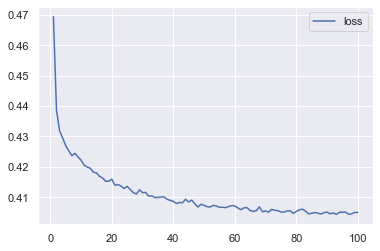

In [72]:
# Create a Dataframe using containing tarining history
history_df = pd.DataFrame(fit_model.history,index=range(1,len(fit_model.history["loss"])+1))

#plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

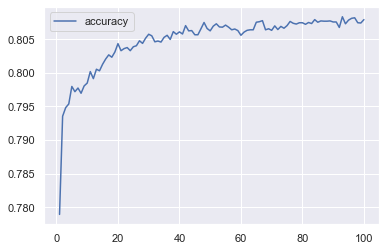

In [73]:
#plot the accuracy
history_df.plot(y="accuracy")

In [74]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4447 - accuracy: 0.7892 - 1s/epoch - 4ms/step
Loss: 0.444669634103775, Accuracy: 0.7891545295715332


##### save the model

In [75]:
#Export our model to HDF5 file
nn.save("./Trained_Models/D3AlphabetSoupCharityOptimi3.h5")

### Examin Random Forest Classifier for comparison

In [76]:
# import dependencies
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [77]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=200,random_state=1)

#Fitting the model
y_pred = rf_model.fit(X_train_scaled,y_train)

#Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy:{accuracy_score(y_test,y_pred):3f}")

 Random forest predictive accuracy:0.775860


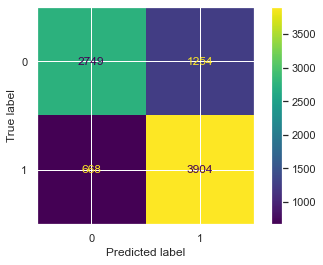

In [78]:
# display the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= rf_model.classes_)
disp.plot()
plt.savefig("./Images.RandomForestClassifier_confusion_matrix.png")
plt.show()

In [79]:
# print the classification report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      4003
           1       0.76      0.85      0.80      4572

    accuracy                           0.78      8575
   macro avg       0.78      0.77      0.77      8575
weighted avg       0.78      0.78      0.77      8575



In [86]:
# We can sort the features by their importance.
sorted (zip(rf_model.feature_importances_,X_df.columns),reverse=True)

[(0.27436021124981536, 'ASK_AMT'),
 (0.07233237884462868, 'NAME_Other'),
 (0.05961454758144187, 'AFFILIATION_Independent'),
 (0.055770233459158366, 'AFFILIATION_CompanySponsored'),
 (0.01968723949457836, 'ORGANIZATION_Association'),
 (0.01880819636190041, 'NAME_TOASTMASTERS INTERNATIONAL'),
 (0.014964337402891255, 'NAME_TOPS CLUB INC'),
 (0.014424568587251664, 'APPLICATION_TYPE_T5'),
 (0.014215017975010978, 'ORGANIZATION_Trust'),
 (0.013125537183263966, 'NAME_UNITED STATES BOWLING CONGRESS INC'),
 (0.011826860492774639, 'APPLICATION_TYPE_T10'),
 (0.01168382378139972, 'CLASSIFICATION_C2000'),
 (0.010541612310487648, 'CLASSIFICATION_Other'),
 (0.009951565771104325, 'CLASSIFICATION_C2100'),
 (0.009713849691252266, 'APPLICATION_TYPE_T19'),
 (0.009189967261514753, 'APPLICATION_TYPE_T4'),
 (0.00912235772435082, 'NAME_PTA TEXAS CONGRESS'),
 (0.00888898485058503, 'NAME_THE UNITED STATES PONY CLUBS INC'),
 (0.008726483282283334,
  'NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS'),
 (0.0

C:\Users\Helanga\AppData\Local\Temp/ipykernel_24928/451385645.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


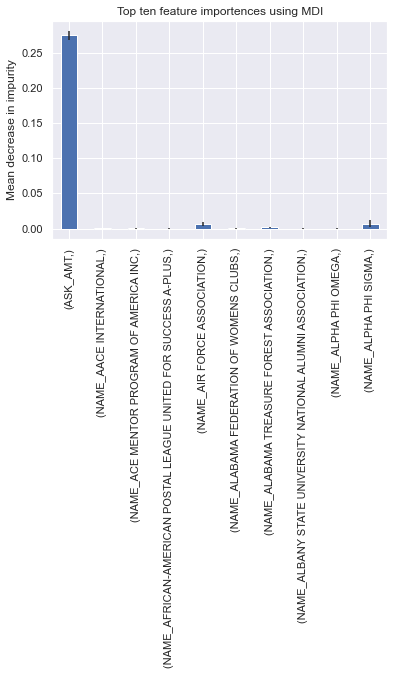

In [94]:
# visualize the top ten feature -importances_
forest_importances = rf_model.feature_importances_[:10]
std = np.std([
    tree.feature_importances_[: 10] for tree in rf_model.estimators_],axis=0)

forest_importances = pd.Series(importances, index=[X_df.columns[:10]])

fig,ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Top ten feature importences using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.savefig("./Images/ForestClassifier_feature_importance.png")
fig.tight_layout()